In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler


In [2]:
scaler = StandardScaler()

df = pd.read_csv('pilot5_TEST.csv')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


In [3]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [4]:
df = remove_unit_variance(df,'mouse.time_last','participant')
df['analysis_rt'] = df['mouse.time_last_within']

In [5]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [6]:
df['Distractor V2 Similarity Preference Tested']

0          Tested
1          Tested
2        Untested
3        Untested
4          Tested
           ...   
40495      Tested
40496    Untested
40497    Untested
40498    Untested
40499      Tested
Name: Distractor V2 Similarity Preference Tested, Length: 40500, dtype: object

In [7]:

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
# df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
# df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
# df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
# df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
# df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


In [8]:


df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')




df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']





In [9]:
len(set(df['participant']))

134

In [10]:
df_correct = df[df['resp_correct'] == 1]


In [11]:
df

setup_js.started  setup_js.stopped  participant  \
0                   NaN               NaN       116851   
1                   NaN               NaN       116851   
2                   NaN               NaN       116851   
3                   NaN               NaN       116851   
4                   NaN               NaN       116851   
...                 ...               ...          ...   
40495               NaN               NaN       167080   
40496               NaN               NaN       167080   
40497               NaN               NaN       167080   
40498               NaN               NaN       167080   
40499               NaN               NaN       167080   

                          date     expName psychopyVersion        OS  \
0      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
1      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
2      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
3      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
4      2024-10-12 15:22:21.820  WM_Deepgen        2024.1.5     Win32   
...                        ...         ...             ...       ...   
40495  2024-10-28 17:42:43.597  WM_Deepgen        2023.2.1  MacIntel   
40496  2024-10-28 17:42:43.597  WM_Deepgen        2023.2.1  MacIntel   
40497  2024-10-28 17:42:43.597  WM_Deepgen        2023.2.1  MacIntel   
40498  2024-10-28 17:42:43.597  WM_Deepgen        2023.2.1  MacIntel   
40499  2024-10-28 17:42:43.597  WM_Deepgen        2023.2.1  MacIntel   

       frameRate  Instructions1.started  Instructions1.stopped  ...  \
0       59.52381                    NaN                    NaN  ...   
1       59.52381                    NaN                    NaN  ...   
2       59.52381                    NaN                    NaN  ...   
3       59.52381                    NaN                    NaN  ...   
4       59.52381                    NaN                    NaN  ...   
...          ...                    ...                    ...  ...   
40495   62.50000                    NaN                    NaN  ...   
40496   62.50000                    NaN                    NaN  ...   
40497   62.50000                    NaN                    NaN  ...   
40498   62.50000                    NaN                    NaN  ...   
40499   62.50000                    NaN                    NaN  ...   

       tested_memorability  untested_memorability  attended_memorability  \
0                 0.828125               0.394366               0.828125   
1                 0.779221               0.913793               0.779221   
2                 0.865854               0.735849               0.735849   
3                 0.776316               0.593220               0.776316   
4                 0.847059               0.700000               0.700000   
...                    ...                    ...                    ...   
40495             0.846154               0.628571               0.846154   
40496             0.776316               0.745763               0.745763   
40497             0.622951               0.810811               0.622951   
40498             0.911392               0.839286               0.839286   
40499             0.848485               0.666667               0.666667   

       unattended_memorability  tested_memorability_resmem  \
0                     0.394366                    0.821004   
1                     0.913793                    0.890449   
2                     0.865854                    0.972881   
3                     0.593220                    0.846955   
4                     0.847059                    0.817970   
...                        ...                         ...   
40495                 0.628571                    0.929148   
40496                 0.776316                    0.900686   
40497                 0.810811                    0.832947   
40498                 0.911392                    0.793200 

<Figure size 1000x600 with 0 Axes>

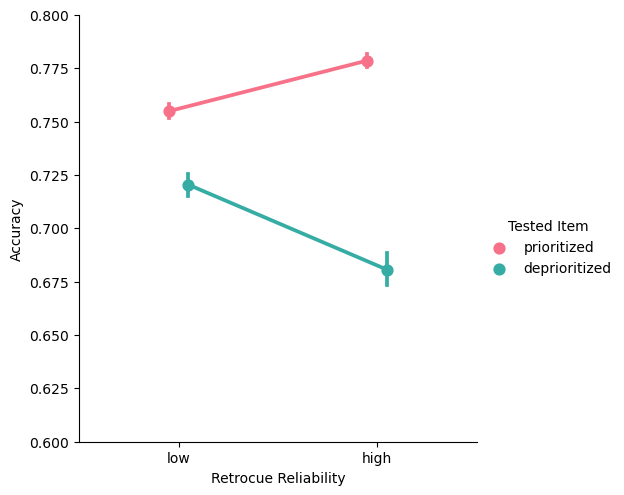

In [12]:

plt.figure(figsize=(10, 6))
sns.catplot(
    x='Retrocue Reliability',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    order = ['low','high'],
#     col = 'participant',
    kind = 'point',
    hue='Tested Item',
    dodge=0.1,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.6, 0.8)
plt.ylabel('Accuracy')
# plt.xlabel('V2 Distractor Similarity to Prioritized Item')
# plt.title('Accuracy by V2 Distractor Similarity')
plt.show()



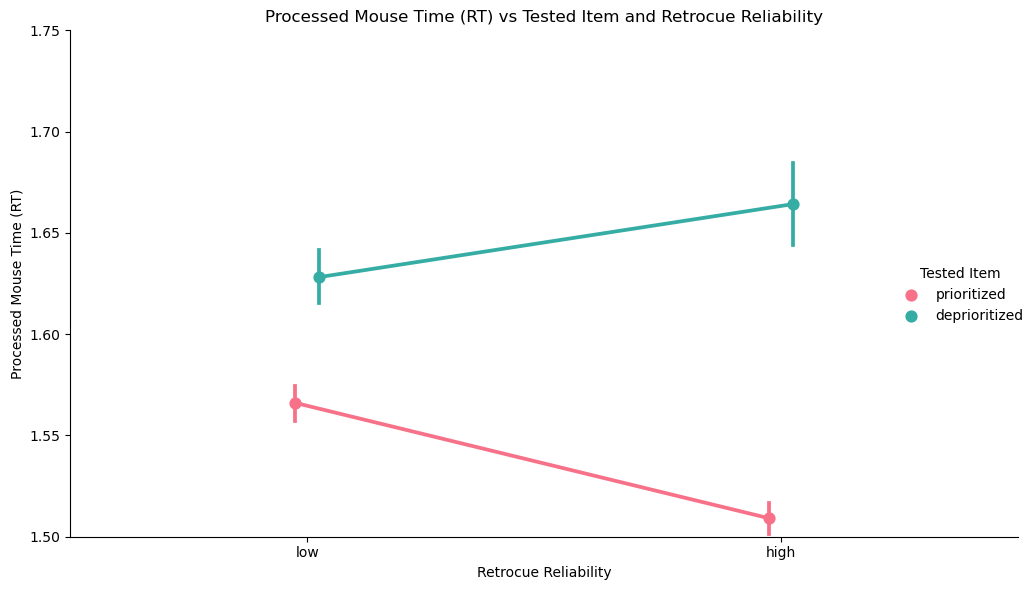

In [13]:
g = sns.catplot(x='Retrocue Reliability', y='analysis_rt', hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            order=['low', 'high'],  # Specify the order of the categories
            palette = palette[::-1])
g.set(ylim=(1.5, 1.75))

plt.xlabel('Retrocue Reliability')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested Item and Retrocue Reliability')
plt.tight_layout()
plt.show()

In [14]:
df['V2 Distractor Similarity\nto Tested Item']

0                     
1                     
2        Least Similar
3                     
4         Most Similar
             ...      
40495                 
40496                 
40497                 
40498    Least Similar
40499                 
Name: V2 Distractor Similarity\nto Tested Item, Length: 40500, dtype: category
Categories (5, object): ['Least Similar' < '' < ' ' < '   ' < 'Most Similar']

In [15]:
# df['v2_sim_dis_test_sq_z']

In [16]:
# df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test_z']
# df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test_z']
# df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
# df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']


# df['it_sim_dis_attend_sq_z'] = scaler.fit_transform(df[['it_sim_dis_attend_sq']])
# df['it_sim_dis_unattend_sq_z'] = scaler.fit_transform(df[['it_sim_dis_unattend_sq']])
# df['v2_sim_dis_attend_sq_z'] = scaler.fit_transform(df[['v2_sim_dis_attend_sq']])
# df['v2_sim_dis_unattend_sq_z'] = scaler.fit_transform(df[['v2_sim_dis_unattend_sq']])


In [17]:
# df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_z']
# df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_z']
# df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_z']
# df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_z']

# df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_z'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_z'] 

In [18]:
# df['it_sim_dis_test_sq_z']

In [19]:
# df['it_sim_dis_attend_sq_z'] = scaler.fit_transform(df[['it_sim_dis_attend_sq']])
# df['it_sim_dis_unattend_sq_z'] = scaler.fit_transform(df[['it_sim_dis_unattend_sq']])
# df['v2_sim_dis_attend_sq_z'] = scaler.fit_transform(df[['v2_sim_dis_attend_sq']])
# df['v2_sim_dis_unattend_sq_z'] = scaler.fit_transform(df[['v2_sim_dis_unattend_sq']])


# df['it_sim_dis_test_z'] = scaler.fit_transform(df[['it_sim_dis_test']])
# df['v2_sim_dis_test_z'] = scaler.fit_transform(df[['v2_sim_dis_test']])

# df['v2_sim_dis_test_sq_z'] = scaler.fit_transform(df[['v2_sim_dis_test_sq']])
# df['it_sim_dis_test_sq_z'] = scaler.fit_transform(df[['it_sim_dis_test_sq']])

# df['validity_binary'] = df['Tested Item'].apply(lambda x: 1 if x == 'prioritized' else 0)
# df['reliability_binary'] = df['Retrocue Reliability'].apply(lambda x: 1 if x == 'high' else 0)

# df['validity_binary_z'] = scaler.fit_transform(df[['validity_binary']])
# df['reliability_binary_z'] = scaler.fit_transform(df[['reliability_binary']])

# df.to_csv('pilot_TOTAL_TEST.csv', index=False)  # Set index=False to avoid saving row indices


In [20]:
df['IT_root_im1']

0       -0.072110
1       -0.196799
2       -0.105560
3       -0.166122
4       -0.203215
           ...   
40495   -0.278895
40496    0.624863
40497   -0.292477
40498    0.020340
40499   -0.039632
Name: IT_root_im1, Length: 40500, dtype: float64

In [21]:
filtered_values = df[df['V2 Distractor Similarity to Tested Item'] > 0.10]
print(len(filtered_values))

16615


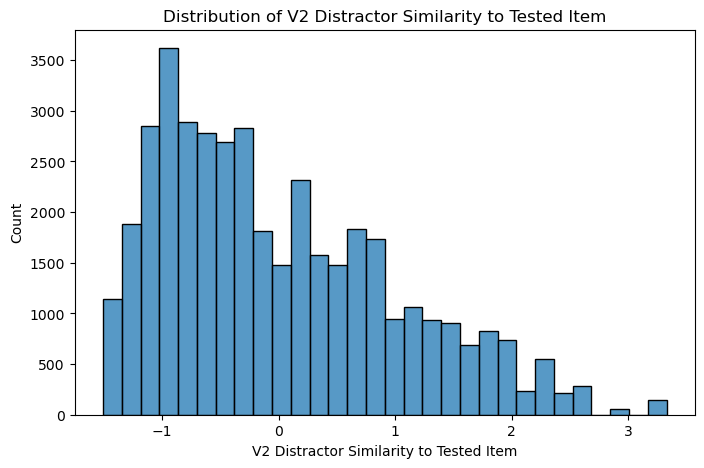

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df['V2 Distractor Similarity to Tested Item'], bins=30)
plt.title('Distribution of V2 Distractor Similarity to Tested Item')
plt.show()


<Figure size 1000x600 with 0 Axes>

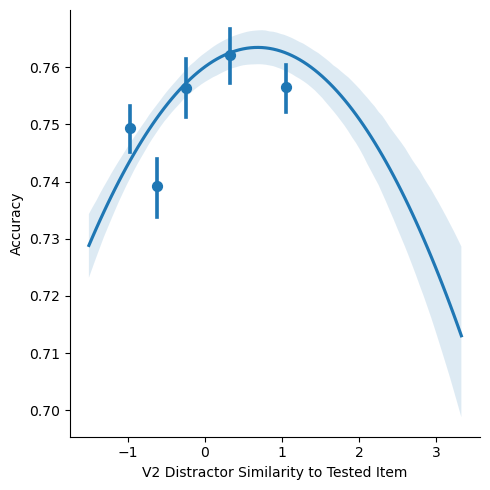

In [23]:
single_color = palette[0]  # Use the first color from the palette
single_color_palette = [single_color]


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    data=df
)

<Figure size 1000x600 with 0 Axes>

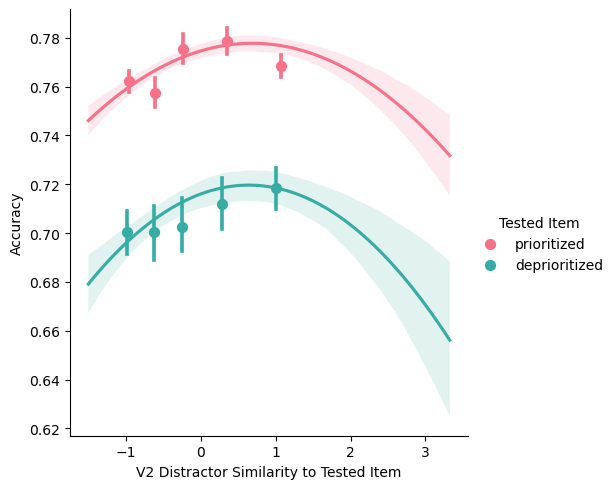

In [24]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)

<Figure size 1000x600 with 0 Axes>

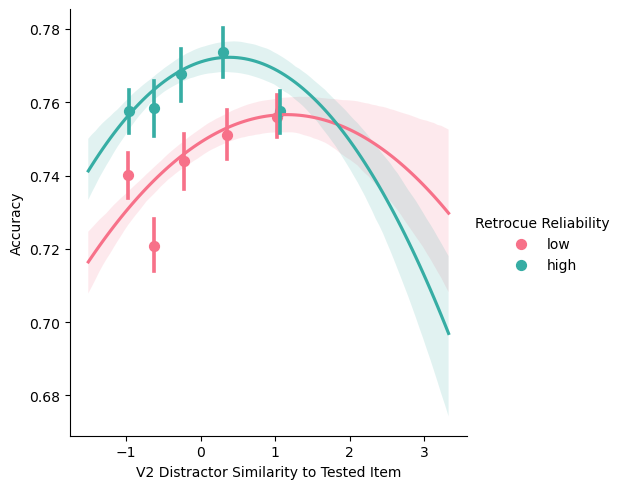

In [26]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)


<Figure size 1000x600 with 0 Axes>

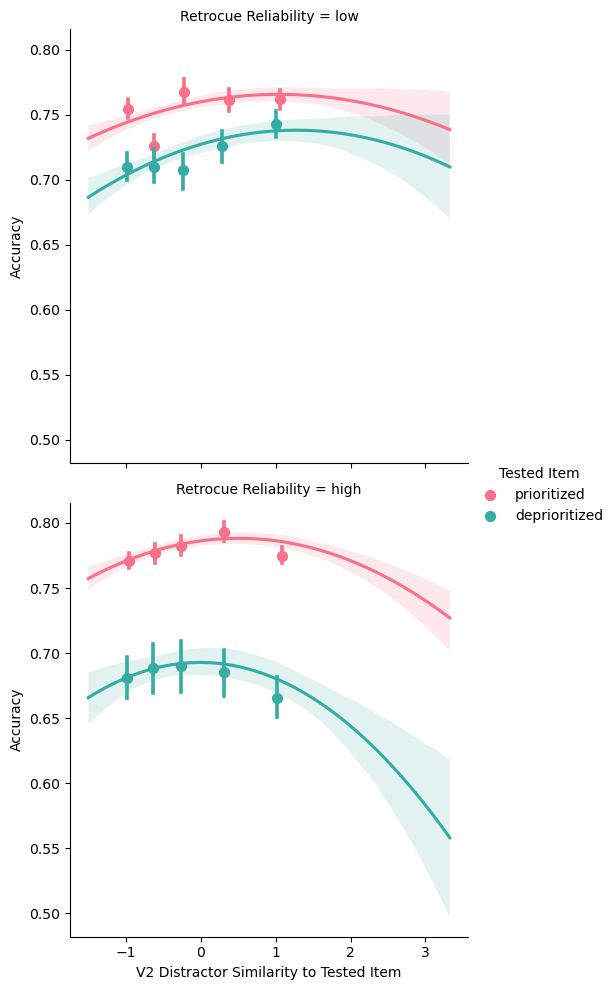

In [27]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)


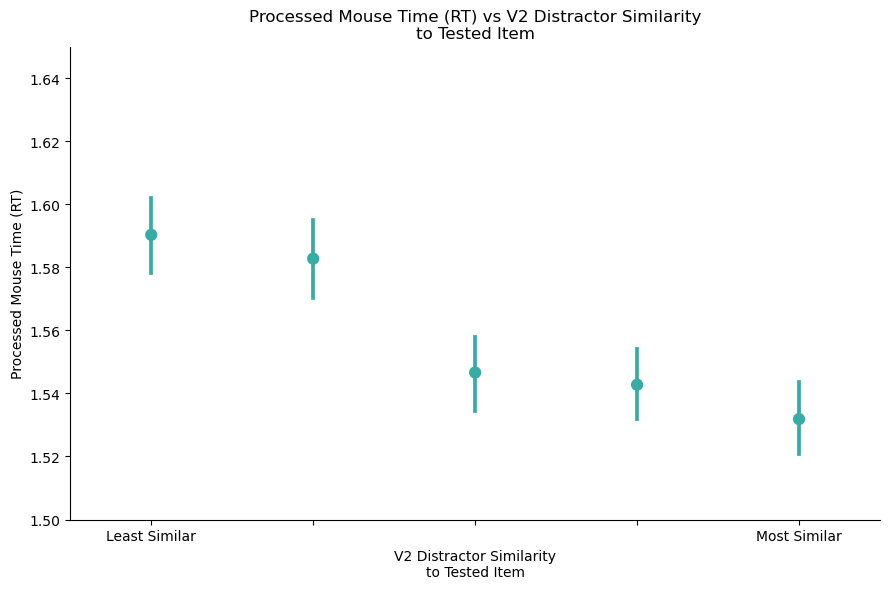

In [28]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

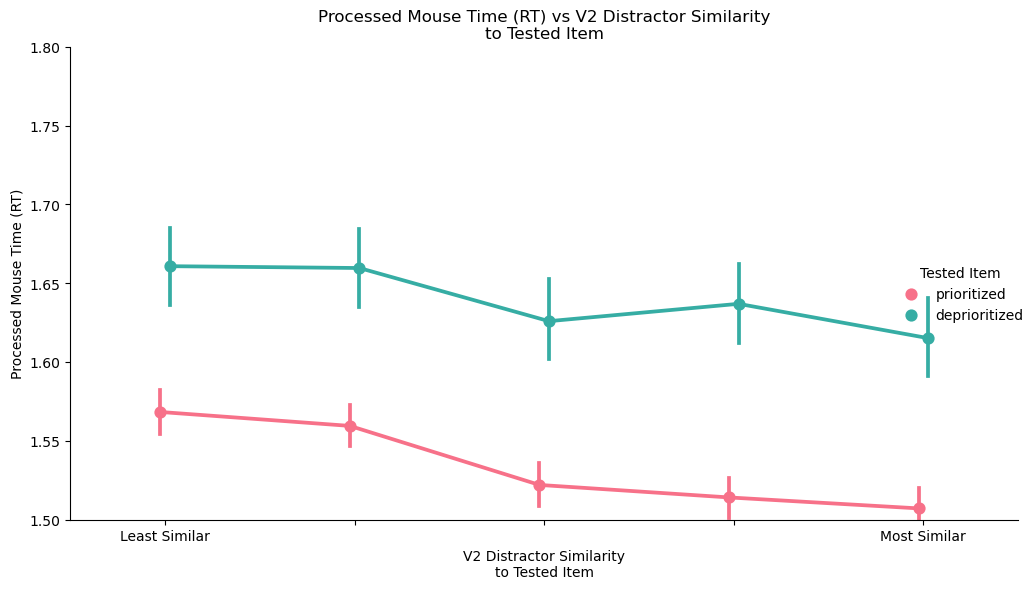

In [29]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.5, 1.8))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

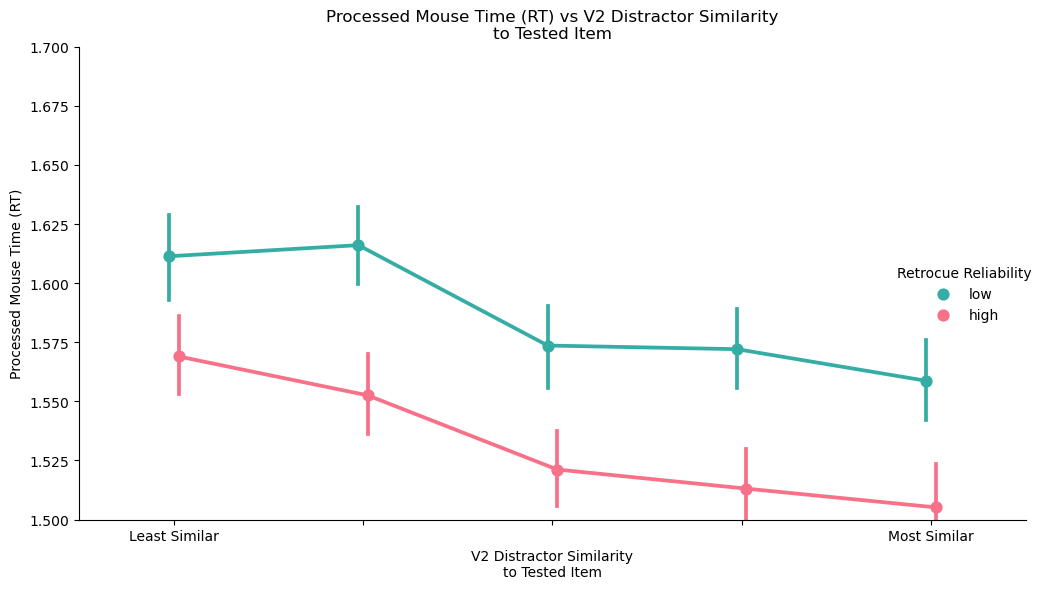

In [30]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

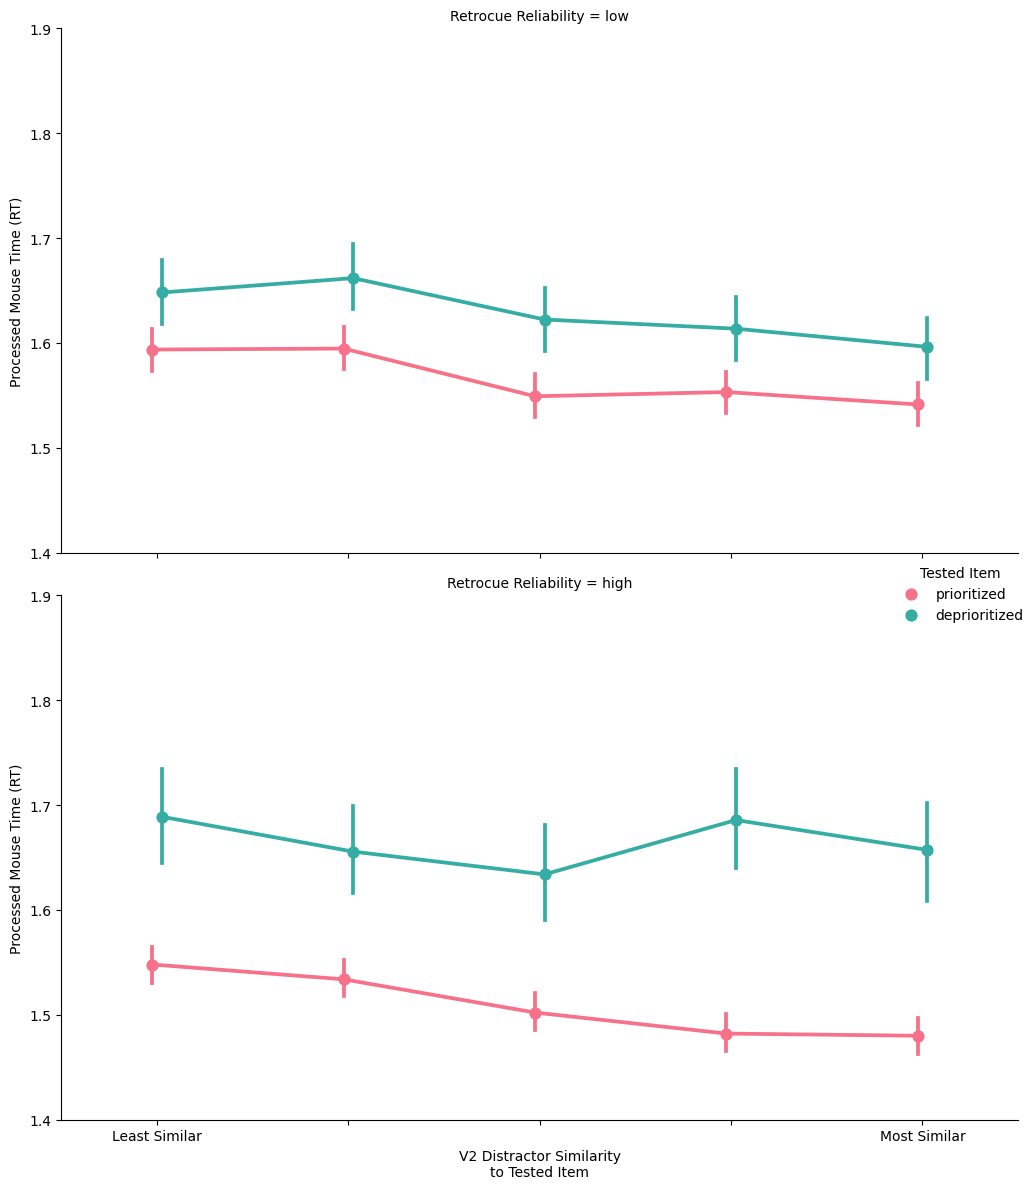

In [31]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', row='Retrocue Reliability',  # Use 'row' instead of 'col'
                kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
                palette=palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

g.set_axis_labels('V2 Distractor Similarity\nto Tested Item', 'Processed Mouse Time (RT)')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

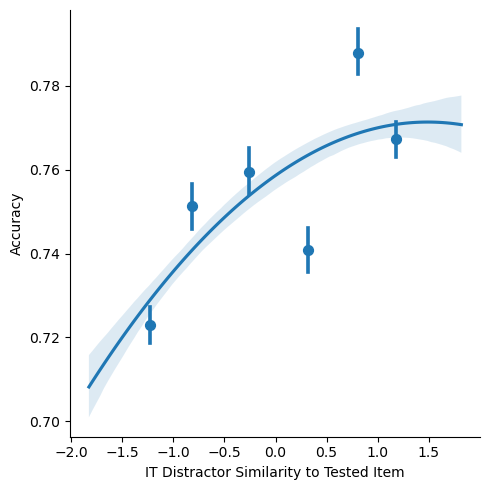

In [32]:


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)
plt.show()


In [ ]:

# plt.figure(figsize=(10, 6))
# sns.pointplot(
#     x='IT Distractor Similarity\nto Prioritized Item',
#     y='Tested Item',
#     errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )
# plt.ylim(0.7, 0.85)
# plt.ylabel('Accuracy')
# plt.xlabel('IT Distractor Similarity to Prioritized Item')
# plt.title('Accuracy by IT Distractor Similarity')
# plt.show()



# g = sns.catplot(
#     x='V2 Distractor Similarity\nto Tested Item',
#     y='reliability_binary',
#     ci=68,
# #     hue='Tested Item',
# #     row='Retrocue Reliability',  # Use 'row' instead of 'col' to arrange plots vertically
#     aspect=1.3,
#     dodge=0.5,
#     kind='point',
#     row_order = ['low', 'high'],
# #     palette=palette,  # Reverse the color order
#     data=df)


# plt.show()

<Figure size 1000x600 with 0 Axes>

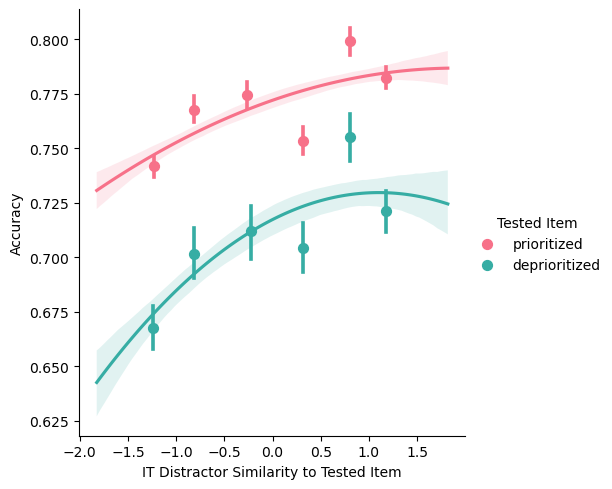

In [33]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)
plt.show()

In [34]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Tested Item',
#             y = 'Accuracy',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.5,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df)
# g.set(ylim=(0.55, 0.85))
# plt.ylabel('Accuracy')

<Figure size 1000x600 with 0 Axes>

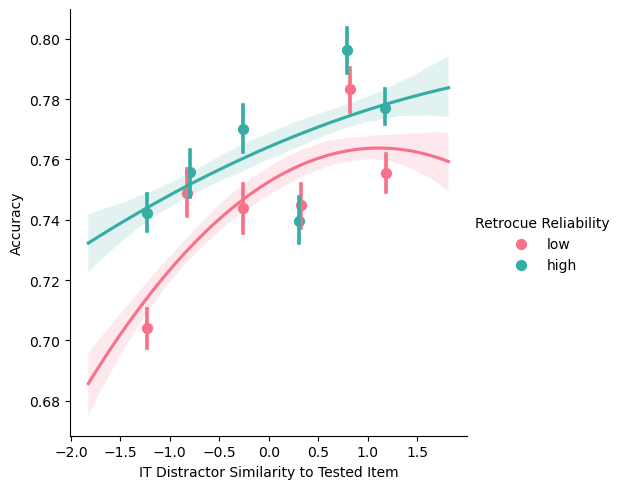

In [36]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Tested Item',
#             y = 'Accuracy',
#             ci = 68,
#             hue = 'Retrocue Reliability',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.5,
#             kind = 'point',
#             palette = palette,  # Reverse the color order
#             data = df)
# g.set(ylim=(0.55, 0.85))
# plt.ylabel('Accuracy')


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

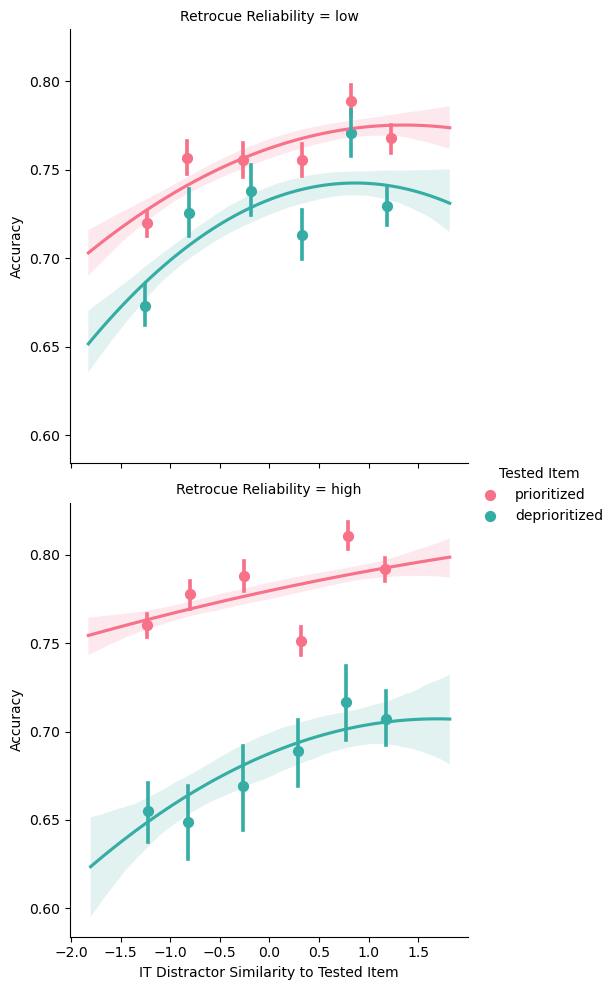

In [37]:
# g = sns.catplot(
#     x='IT Distractor Similarity\nto Tested Item',
#     y='Accuracy',
#     ci=68,
#     hue='Tested Item',
    
#     row='Retrocue Reliability',  # Use 'row' instead of 'col' to arrange plots vertically
#     aspect=1.3,
#     row_order = ['low', 'high'],
#     dodge=0.5,
#     kind='point',
#     palette=palette[::-1],  # Reverse the color order
#     data=df
# )
# g.set(ylim=(0.5, 0.85))
# g.set_axis_labels("", "Accuracy")

# plt.show()


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row='Retrocue Reliability',  
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


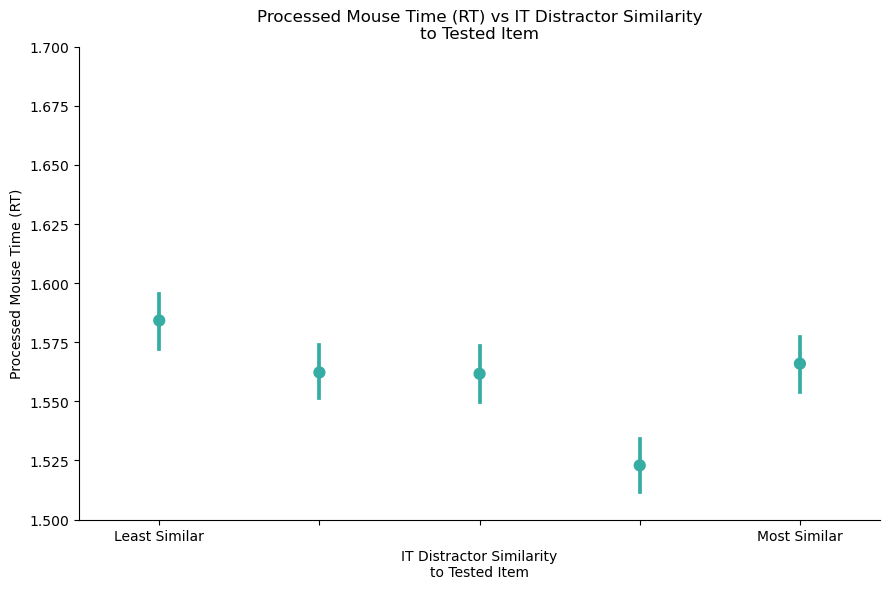

In [38]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

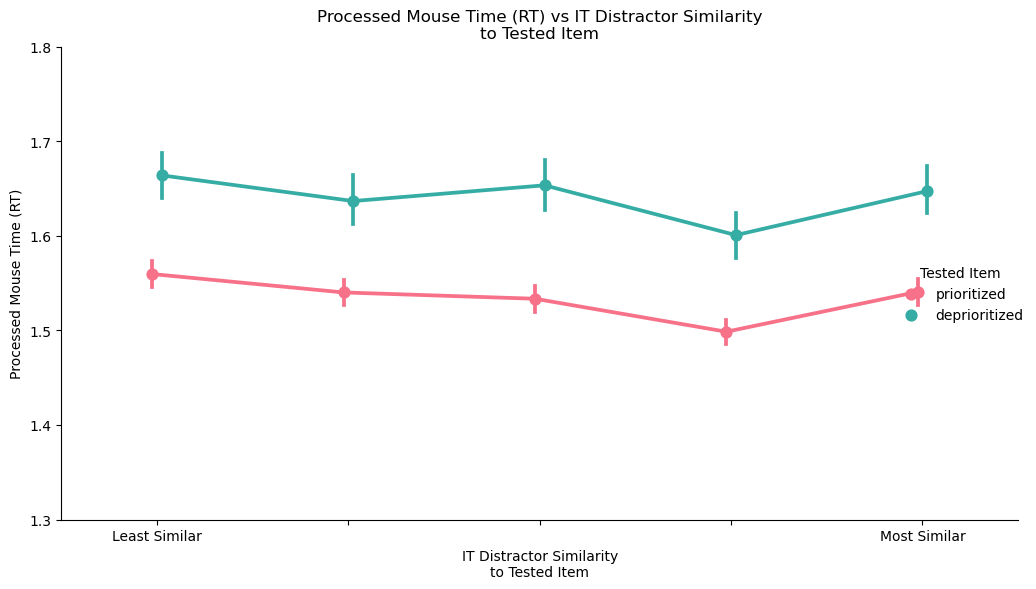

In [39]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.3, 1.8))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

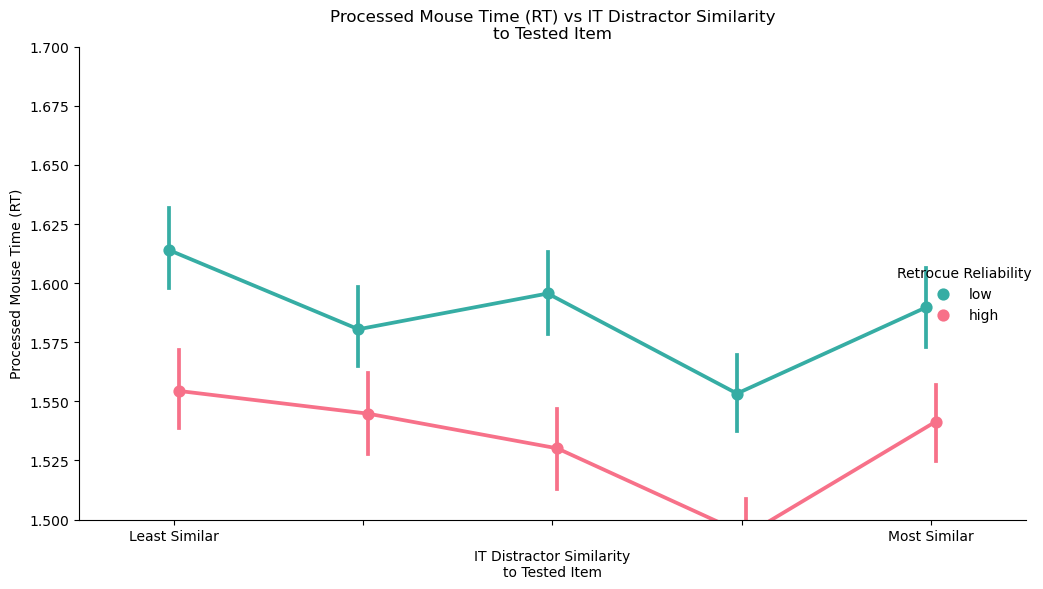

In [40]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

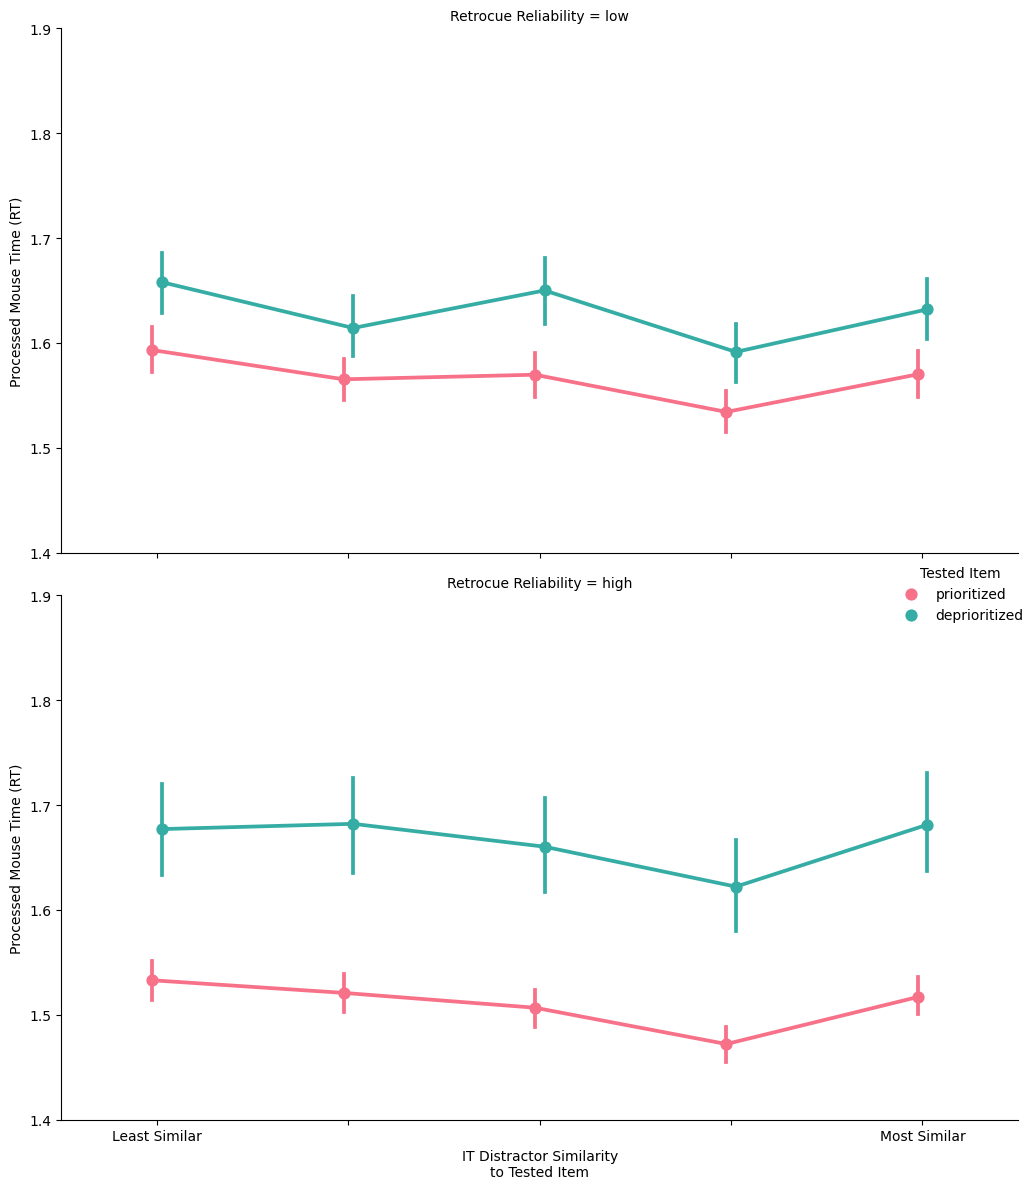

In [41]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', row='Retrocue Reliability',  # Use 'row' instead of 'col'
                kind='point',row_order = ['low', 'high'], data=df_correct, dodge=True, height=6, aspect=1.5, 
                palette=palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

g.set_axis_labels('IT Distractor Similarity\nto Tested Item', 'Processed Mouse Time (RT)')
plt.tight_layout()
plt.show()

In [42]:
# df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
# df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')

# def round_to_significant_figures(x, sig_figs=2):
#     if x == 0:
#         return 0
#     else:
#         return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


# def process_interval(interval):
#     # Round both bounds
#     lower_rounded = round_to_significant_figures(interval.left)
#     upper_rounded = round_to_significant_figures(interval.right)
#     # Return a new interval with the rounded bounds
#     return pd.Interval(lower_rounded, upper_rounded)

# df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
# df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)

# df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
# df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']

In [43]:
# plt.figure(figsize=(10, 6))
# ax = sns.pointplot(
#     x='V2_diff_binned_test',
#     y='Accuracy',
# #     errorbar=('ci', 68),  # Updated error bar parameter
#     data=df
# )
# # sns.regplot(
# #     x='v2_sim_dis_diff',
# #     y='Accuracy',
# #     order = 2,
# #     ci = 68,
# #     errorbar=('ci', 68),  # Updated error bar parameter
# #     scatter = False,
# #     data=df,
# #     ax = ax,
# # )
# plt.ylim(0.7, 0.8)
# plt.ylabel('Accuracy')
# plt.xlabel('Tested - Untested V2 Distractor Similarity')
# plt.title('Accuracy by V2 Distractor Similarity')
# plt.show()

In [44]:
# plt.figure(figsize=(10, 6))
# sns.relplot(
#     x='v2_sim_dis_diff_test',
#     y='Accuracy',
#     kind = 'line',
# #     errorbar=('ci', 68),  # Updated error bar parameter
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )

In [45]:
# plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='Tested - Untested IT Distractor Similarity',
#     y='Accuracy',
#     x_bins = 7,
#     order = 2,
#     ci = 68,
#     palette = palette[::-1],  # Reverse the color order
#     data=df
# )


<Figure size 1000x600 with 0 Axes>

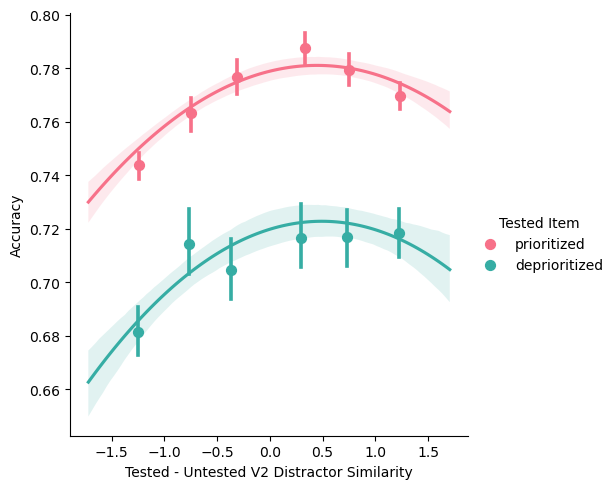

In [163]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

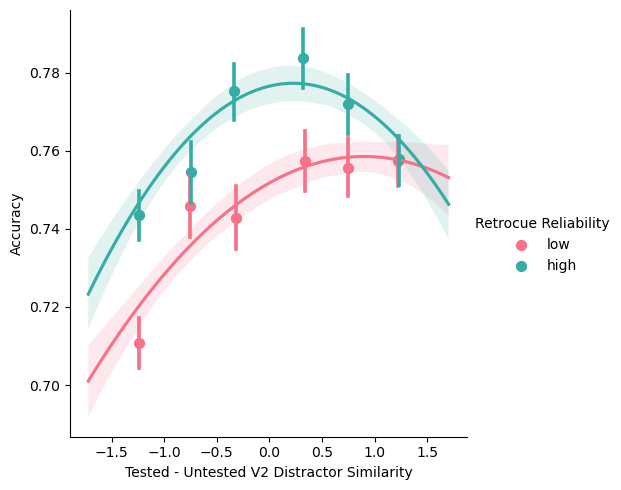

In [164]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    #hue = 'Tested Item',

    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [48]:
df_filtered_neg = df[df['Tested - Untested IT Distractor Similarity'] < 0]
df_filtered_pos = df[df['Tested - Untested IT Distractor Similarity'] >= 0]

<Figure size 1000x600 with 0 Axes>

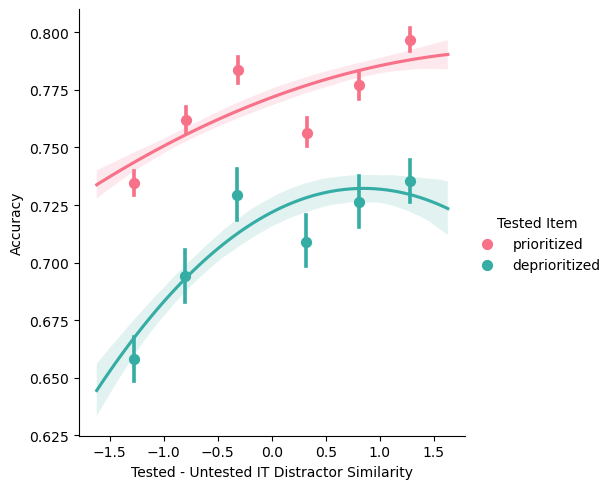

In [59]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
   # row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

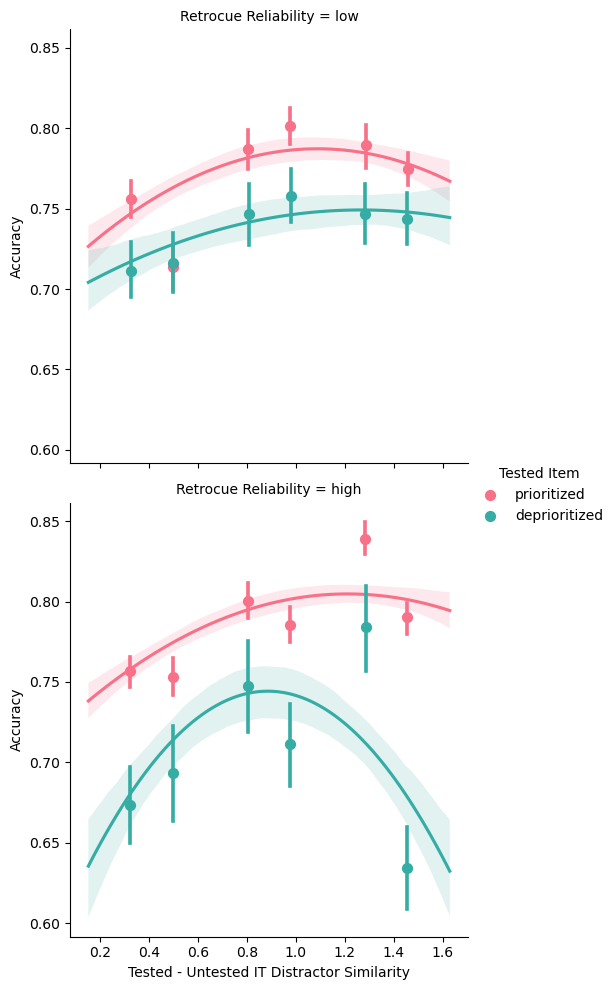

In [61]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_filtered_pos
)


In [62]:
df_correct['Response Time'] = df_correct['analysis_rt']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1728104853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct['Response Time'] = df_correct['analysis_rt']


<Figure size 1000x600 with 0 Axes>

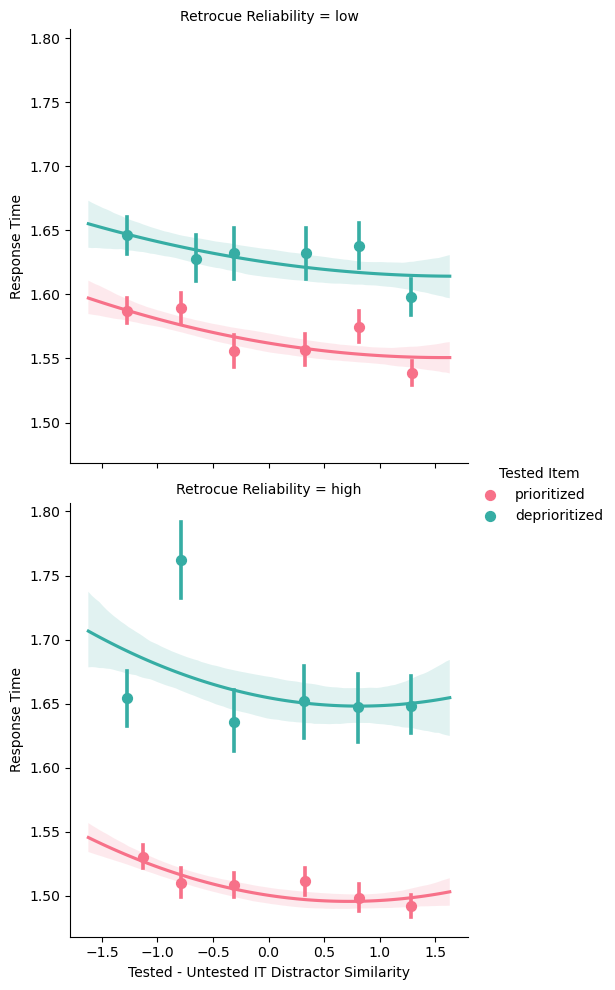

In [65]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Response Time',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

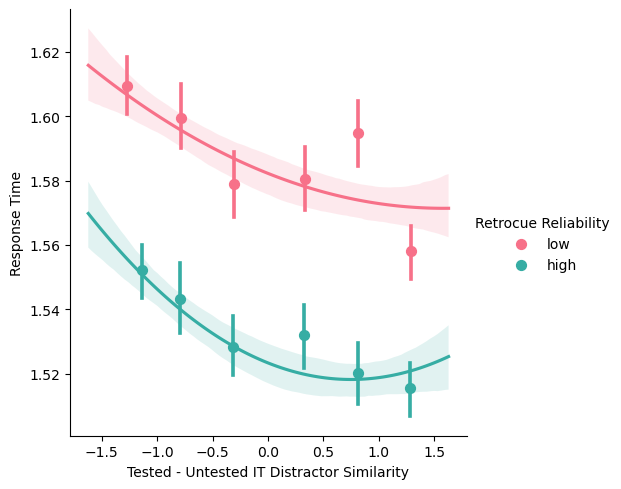

In [68]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Response Time',
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

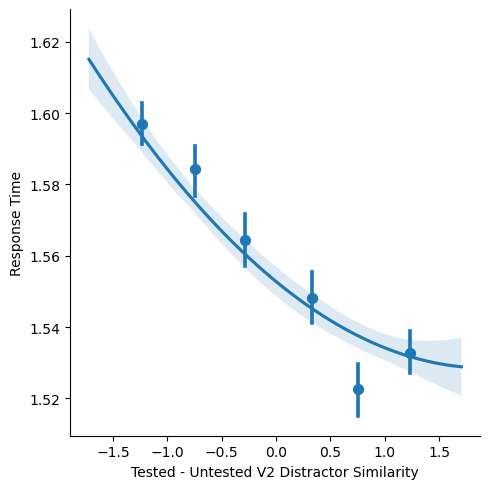

In [69]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    #row = 'Retrocue Reliability',
    #hue = 'Tested Item',
    #row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

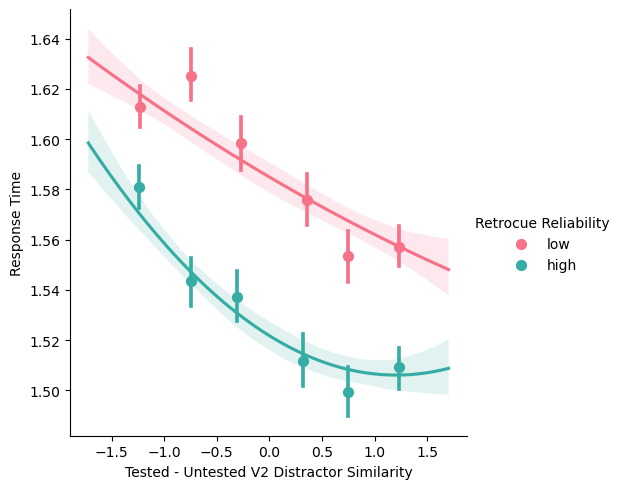

In [71]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    hue = 'Retrocue Reliability',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

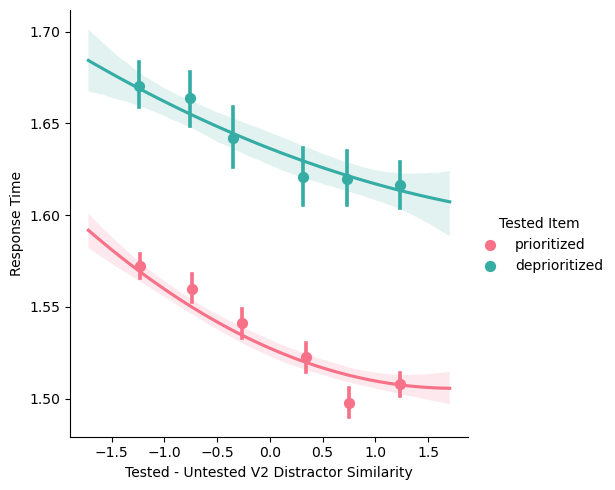

In [74]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    hue = 'Tested Item',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)

<Figure size 1000x600 with 0 Axes>

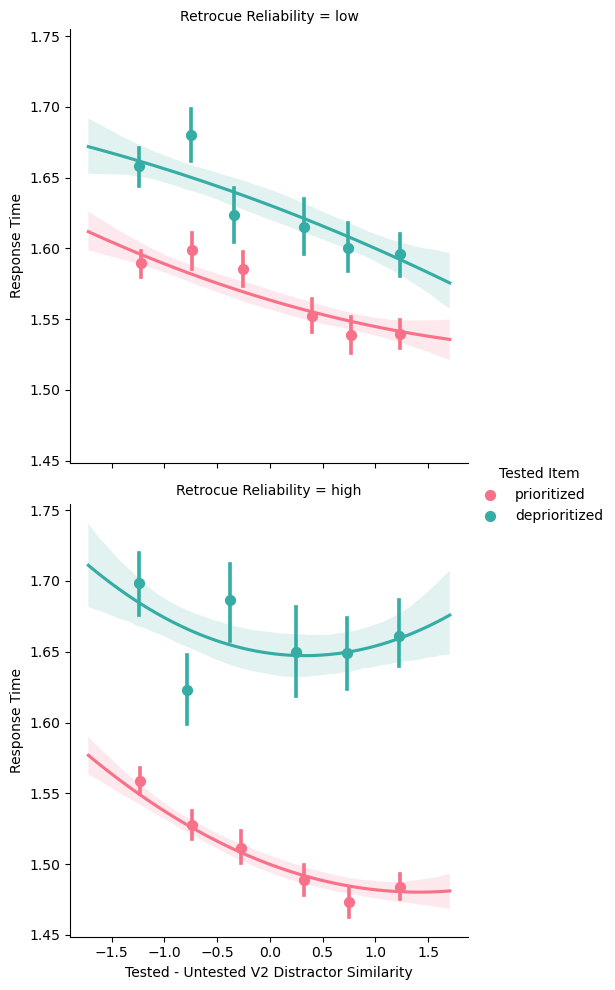

In [76]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Response Time',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    row_order = ['low', 'high'],
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct
)


<Figure size 1000x600 with 0 Axes>

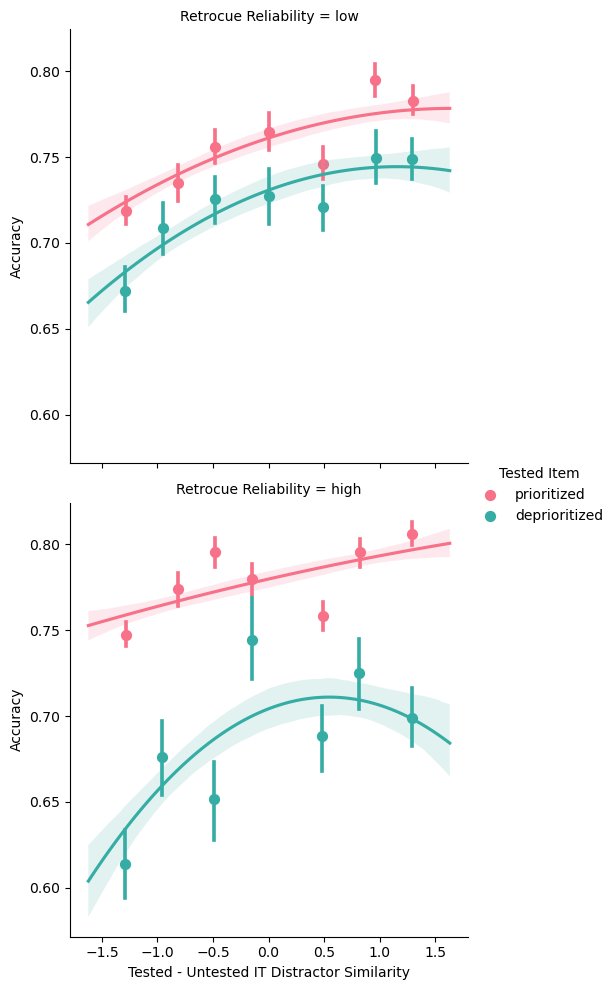

In [77]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

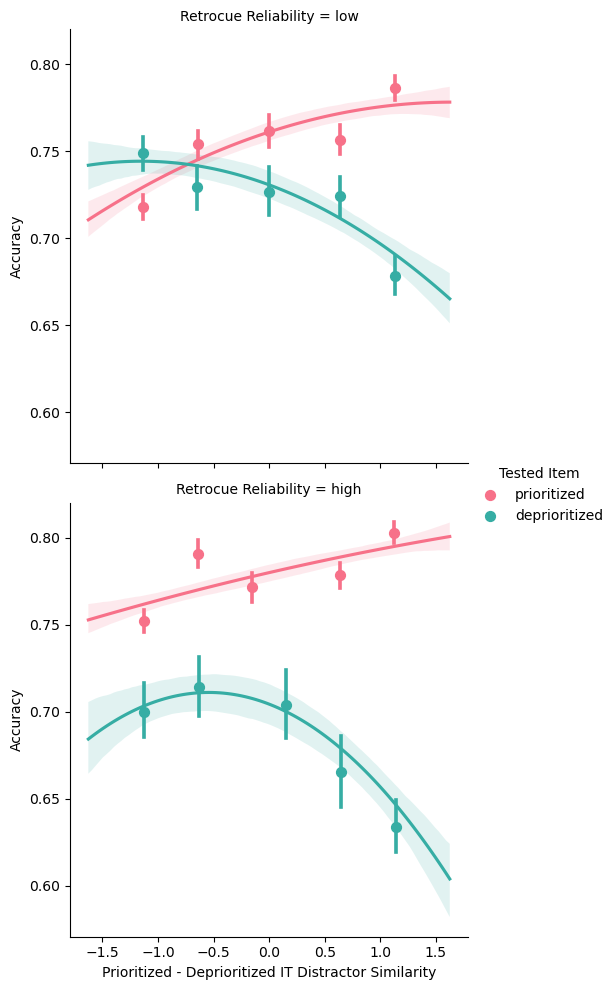

In [78]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Prioritized - Deprioritized IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

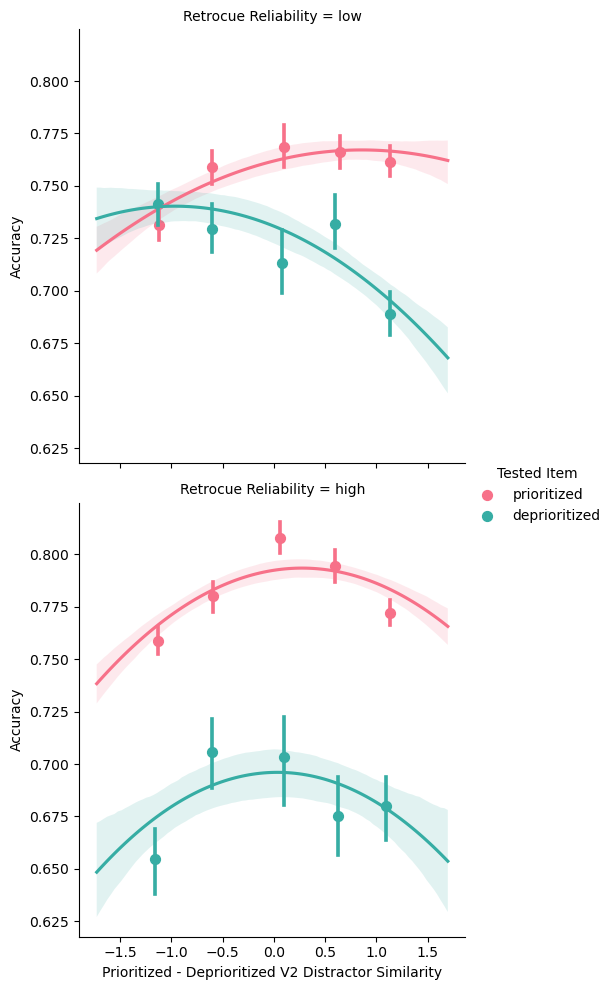

In [79]:

plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Prioritized - Deprioritized V2 Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


<Figure size 1000x600 with 0 Axes>

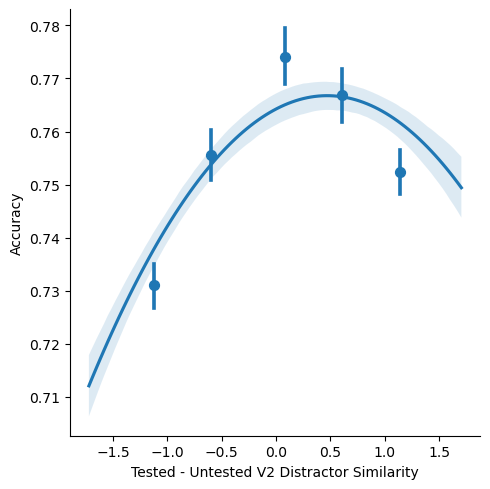

In [80]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

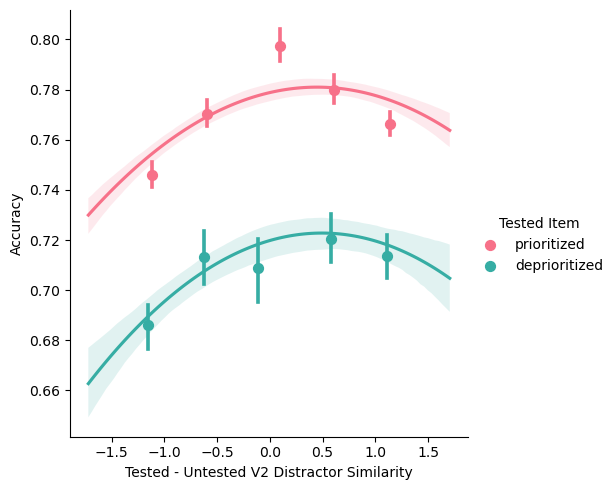

In [81]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

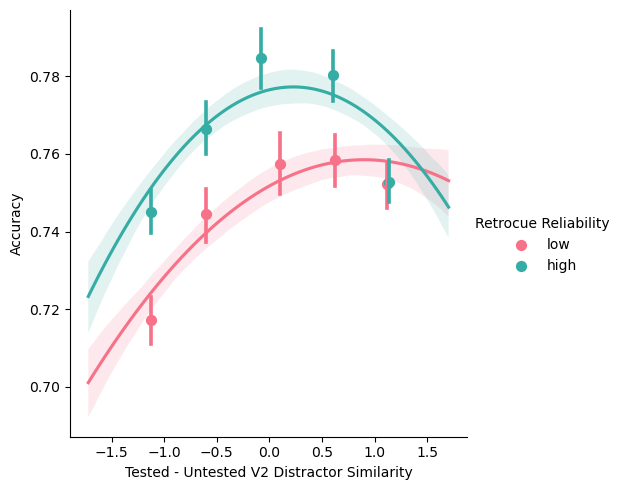

In [82]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

<Figure size 1000x600 with 0 Axes>

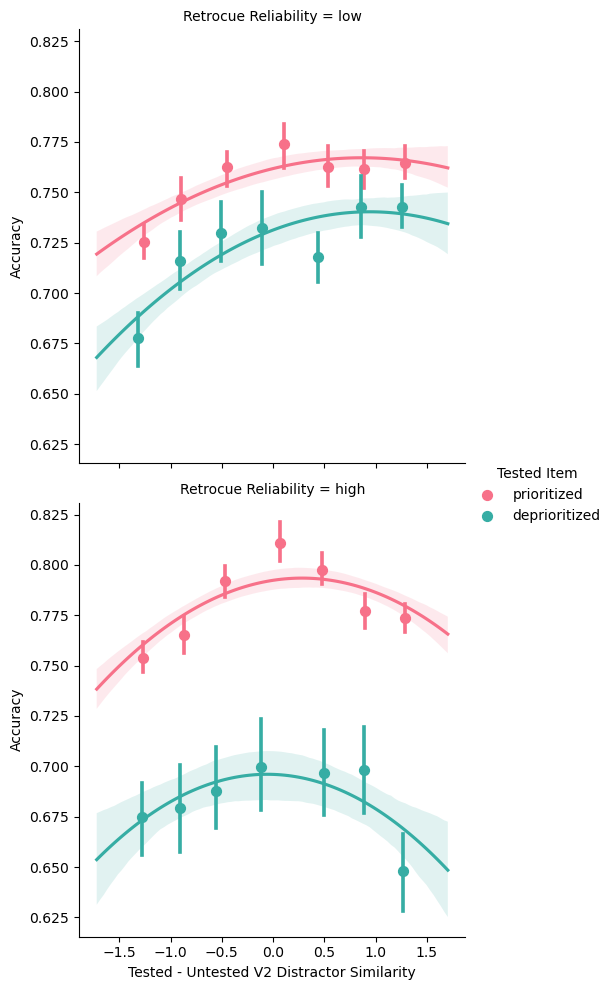

In [83]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 7,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [84]:
df['Tested Item']

0          prioritized
1          prioritized
2        deprioritized
3          prioritized
4        deprioritized
             ...      
40495      prioritized
40496    deprioritized
40497      prioritized
40498    deprioritized
40499    deprioritized
Name: Tested Item, Length: 40500, dtype: object

<Figure size 1000x600 with 0 Axes>

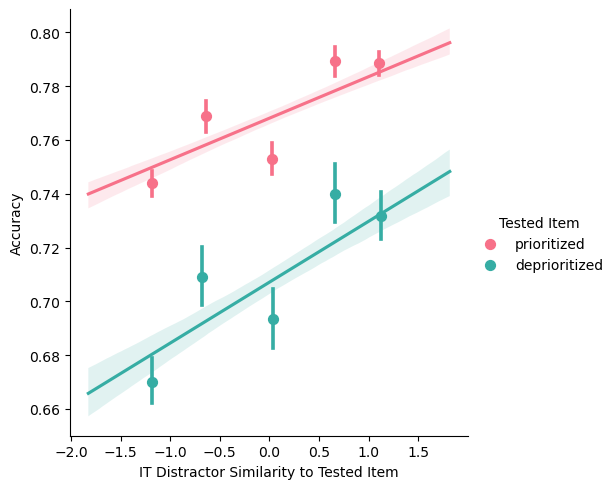

In [85]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
#     row = 'Retrocue Reliability',
    hue = 'Tested Item',
    x_bins = 5,
    order = 1,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

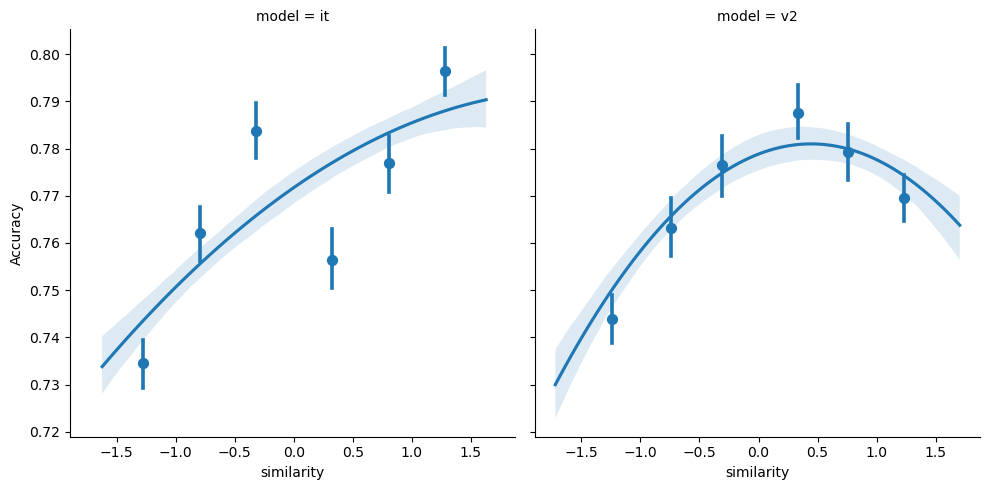

In [86]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_diff_test_z']
v2['similarity'] = df['v2_sim_dis_diff_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 6,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

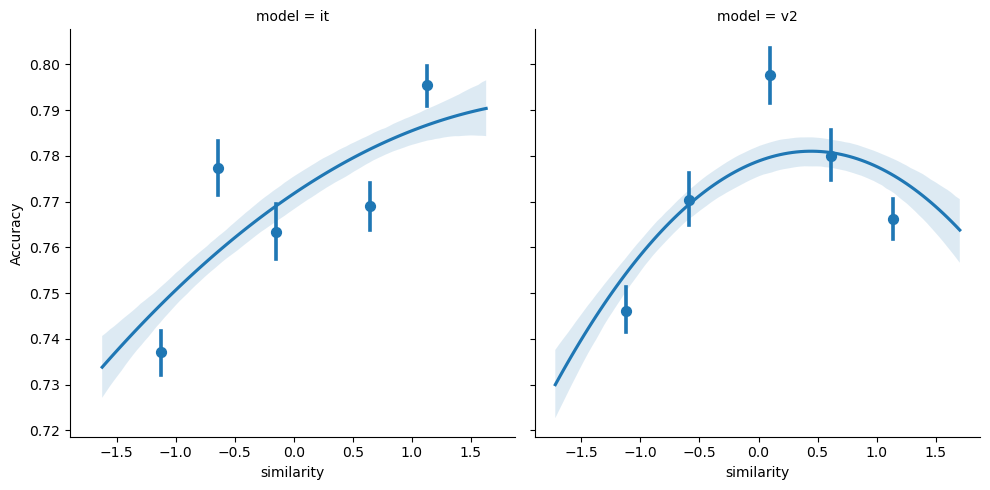

In [87]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_diff_test_z']
v2['similarity'] = df['v2_sim_dis_diff_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 5,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

<Figure size 1000x600 with 0 Axes>

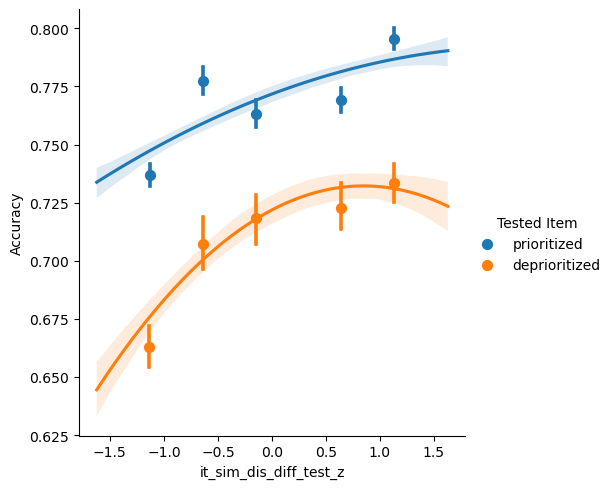

In [88]:
df['it_sim_dis_diff_test_z'] = scaler.fit_transform(df[['it_sim_dis_diff_test']])
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='it_sim_dis_diff_test_z',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))


<Figure size 1000x600 with 0 Axes>

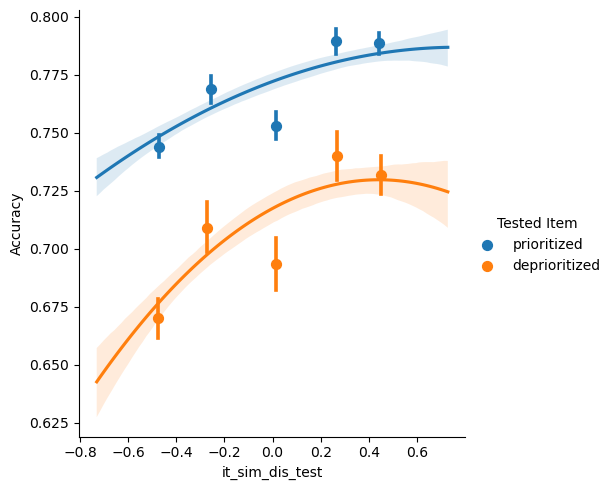

In [89]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='it_sim_dis_test',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

<Figure size 1000x600 with 0 Axes>

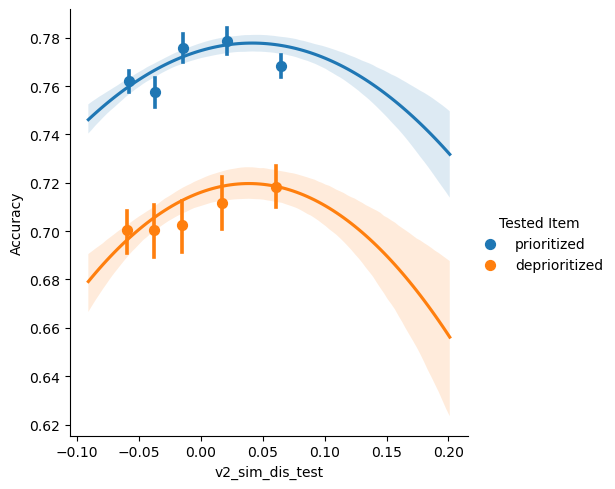

In [90]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='v2_sim_dis_test',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

<Figure size 1000x600 with 0 Axes>

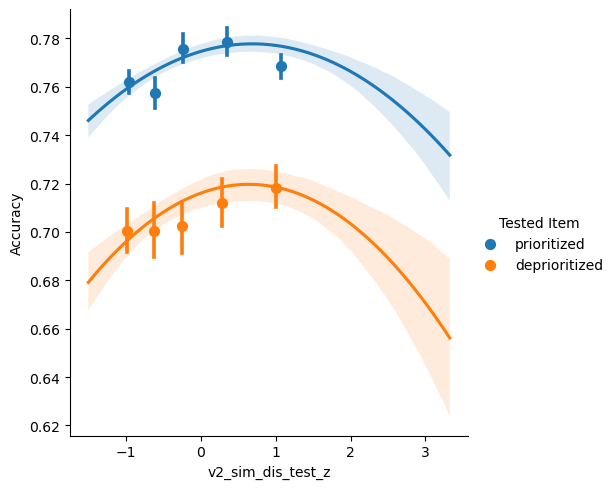

In [91]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='v2_sim_dis_test_z',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

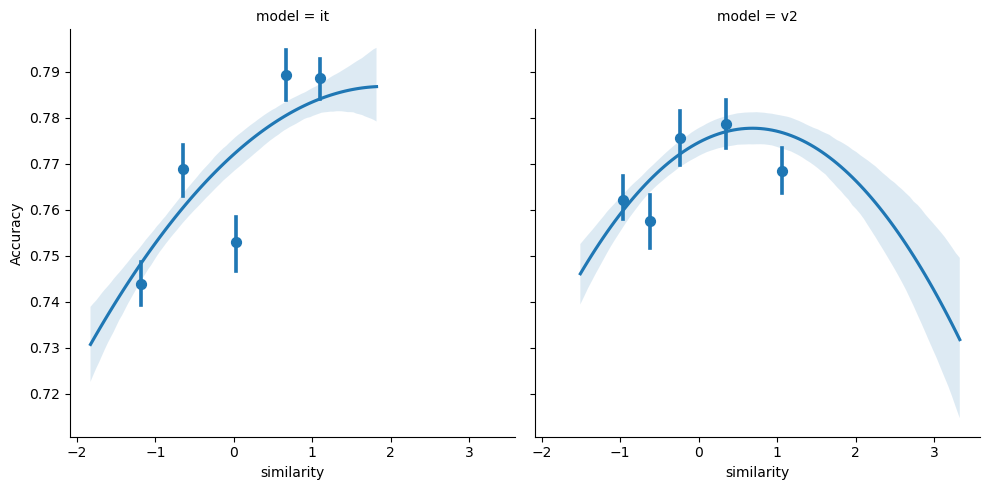

In [92]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_test_z']
v2['similarity'] = df['v2_sim_dis_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 5,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1259354826.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

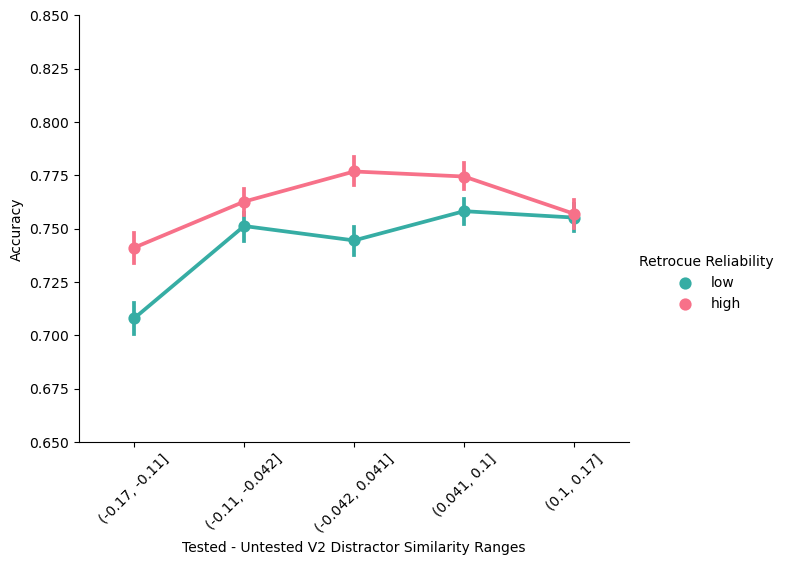

In [93]:



g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)


plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3066009943.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


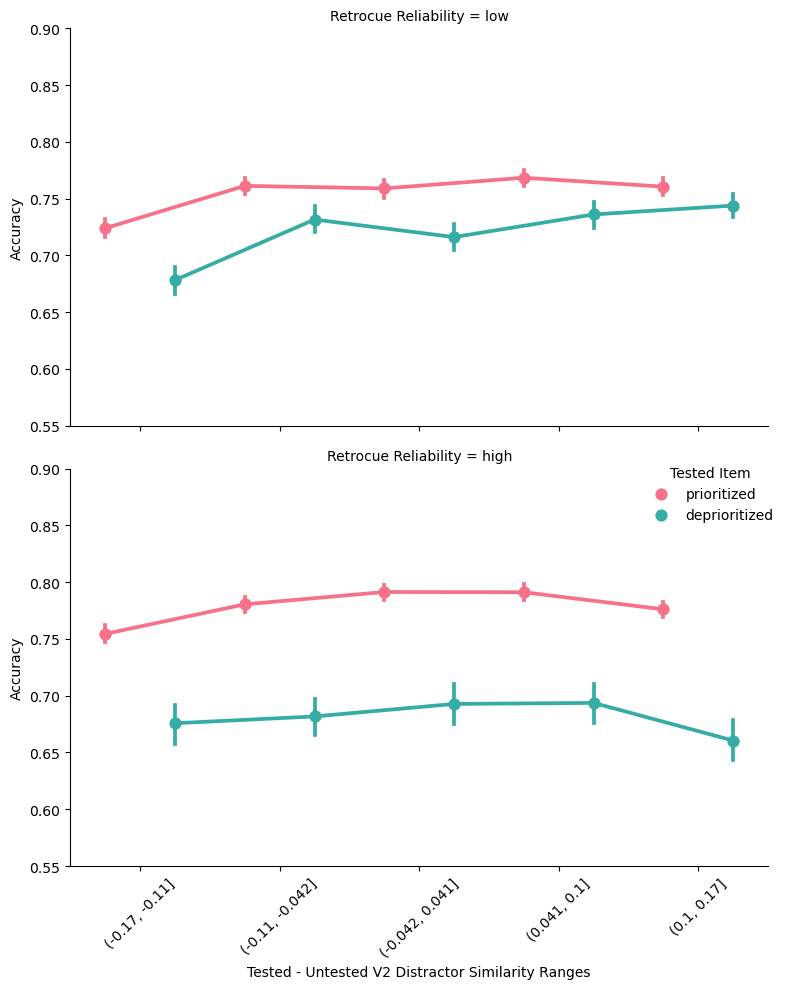

In [94]:


g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested V2 Distractor Similarity Ranges", "Accuracy")
plt.tight_layout()
plt.show()

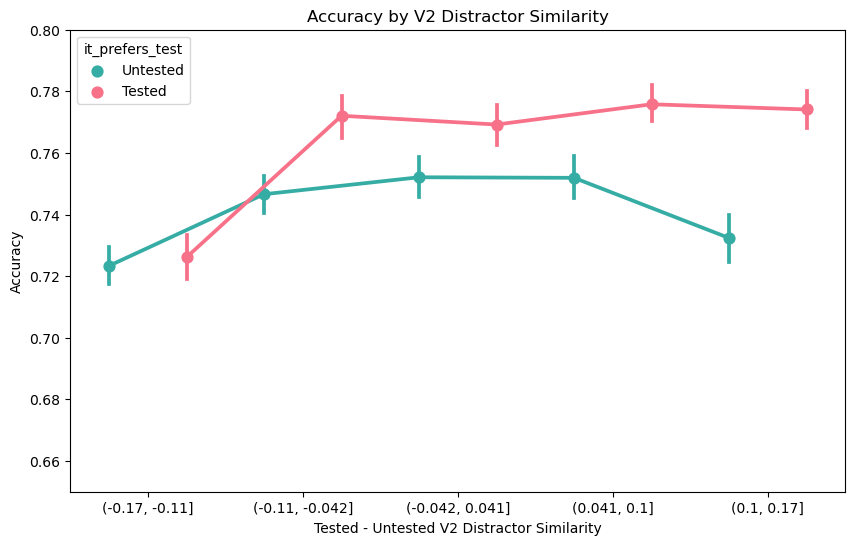

In [95]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test',
    y='Accuracy',
    hue = 'it_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity')
plt.title('Accuracy by V2 Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/4003700347.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

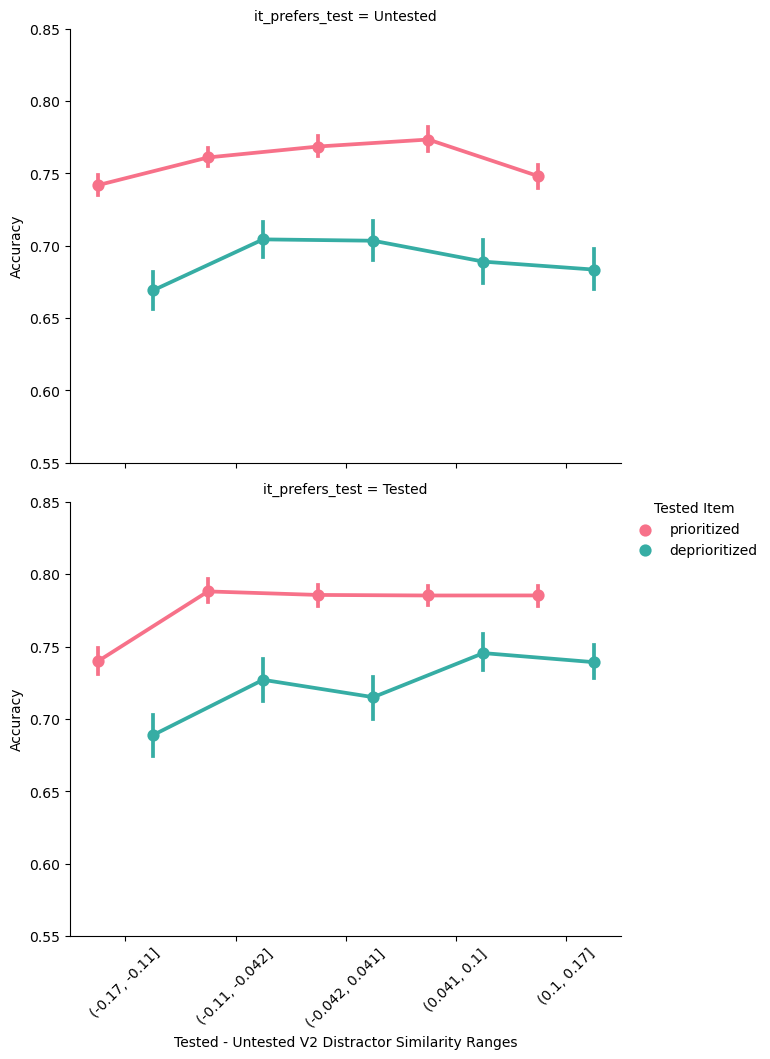

In [96]:
g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
            row = 'it_prefers_test',
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

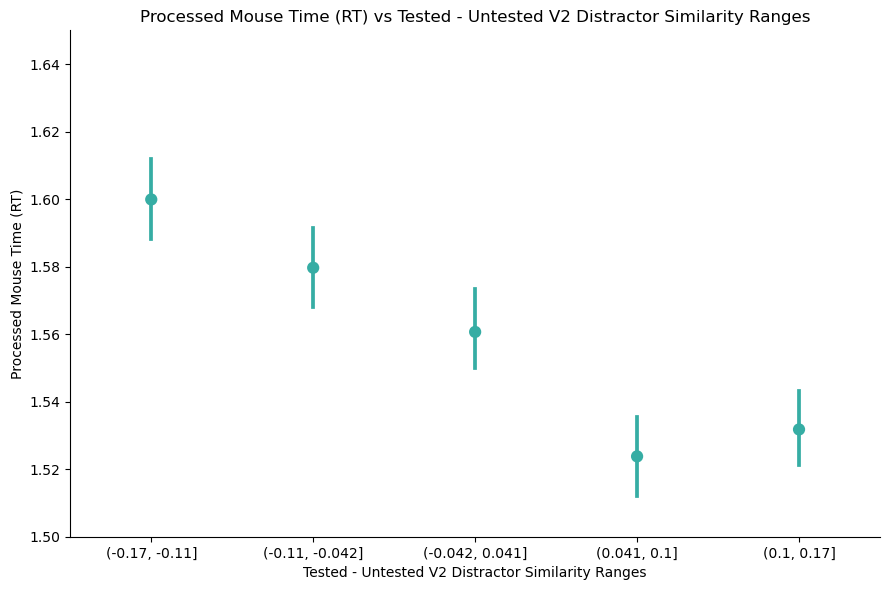

In [97]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

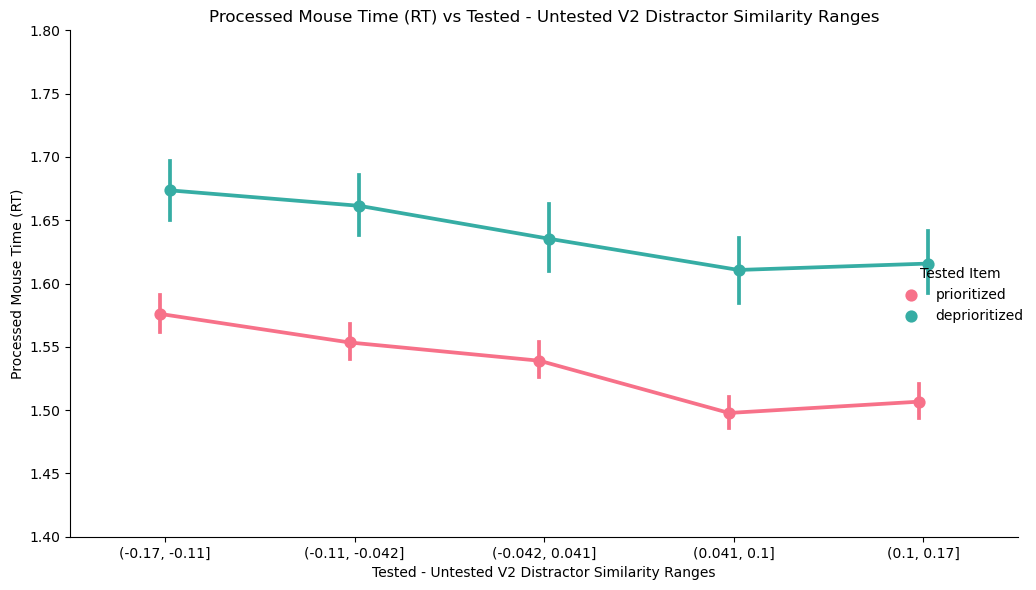

In [98]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

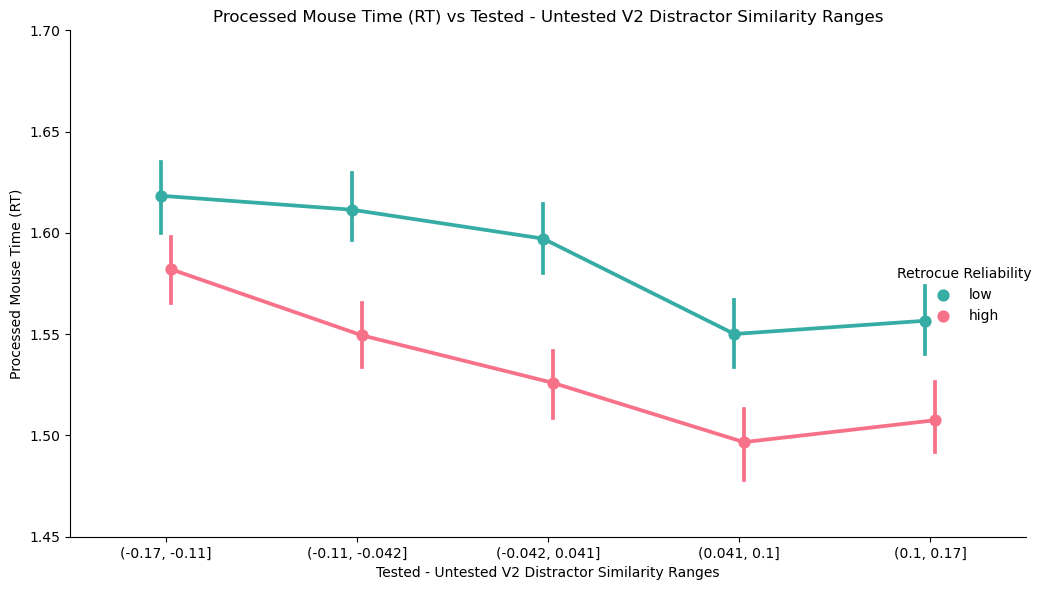

In [99]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

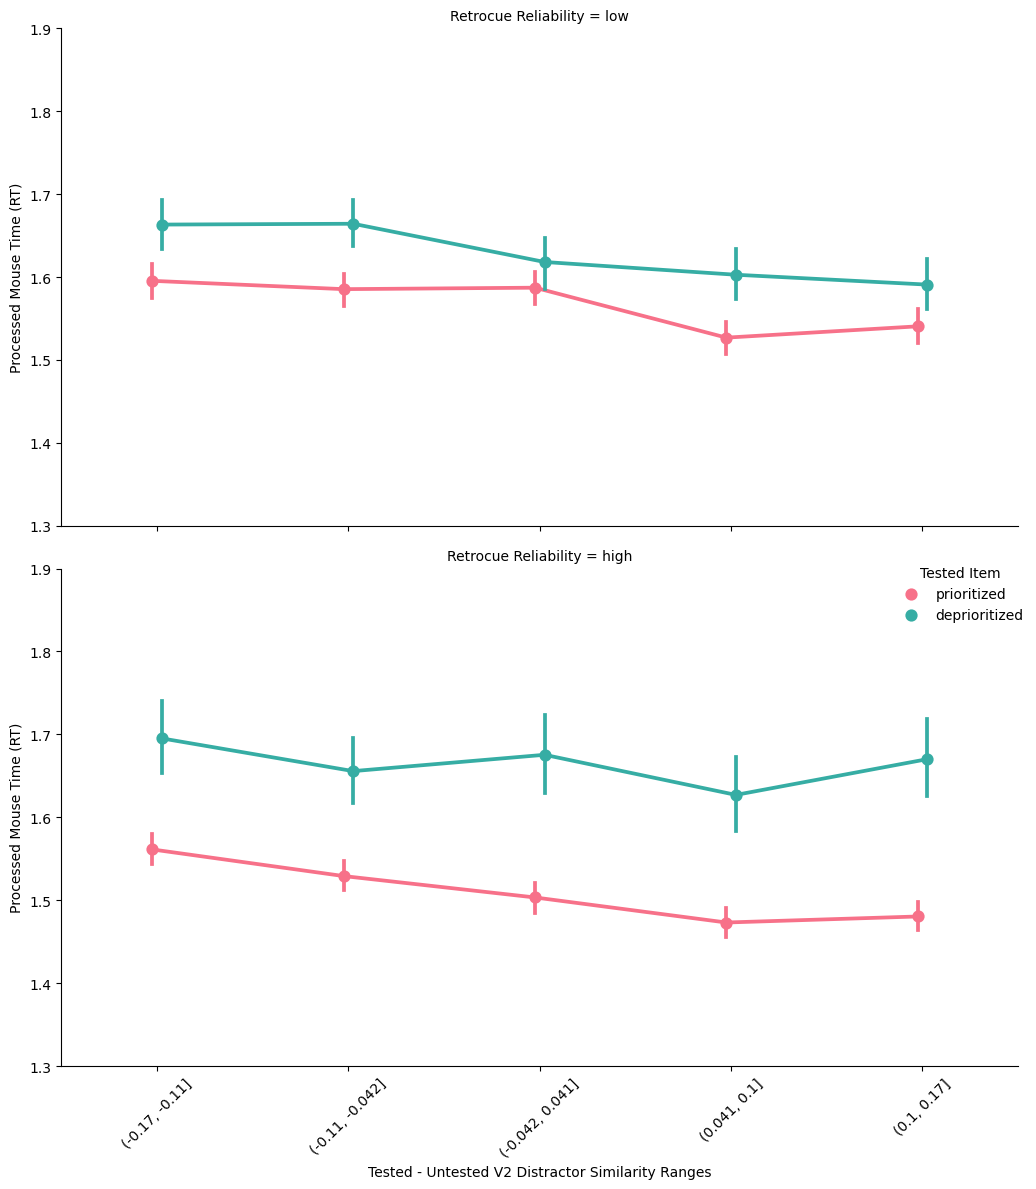

In [100]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested V2 Distractor Similarity Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested V2 Distractor Similarity Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()

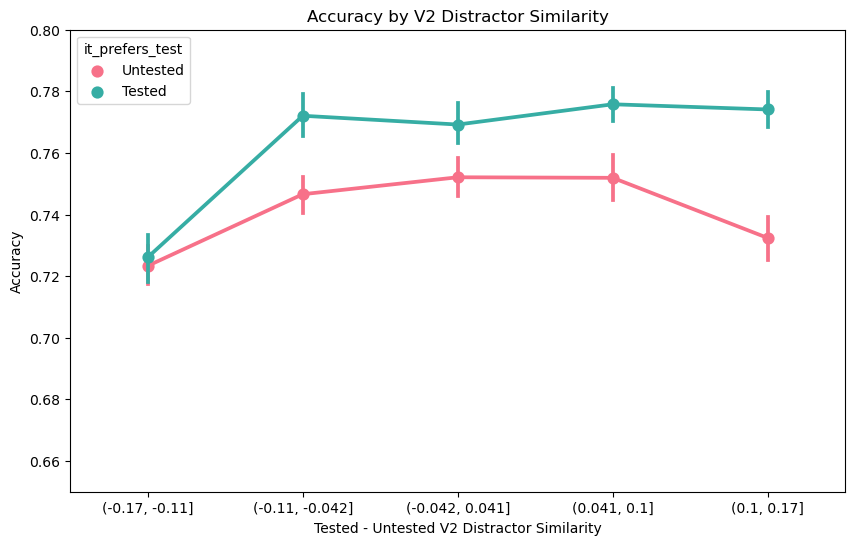

In [101]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test',
    y='Accuracy',
    hue = 'it_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity')
plt.title('Accuracy by V2 Distractor Similarity')
plt.show()

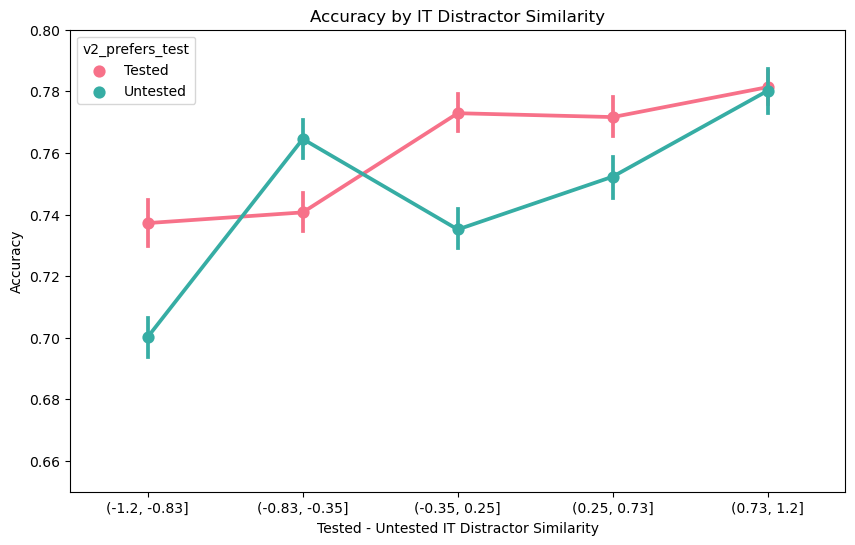

In [102]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test',
    y='Accuracy',
    hue = 'v2_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity')
plt.title('Accuracy by IT Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1989802417.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(0.5694444444444517, 0.5, 'Accuracy')

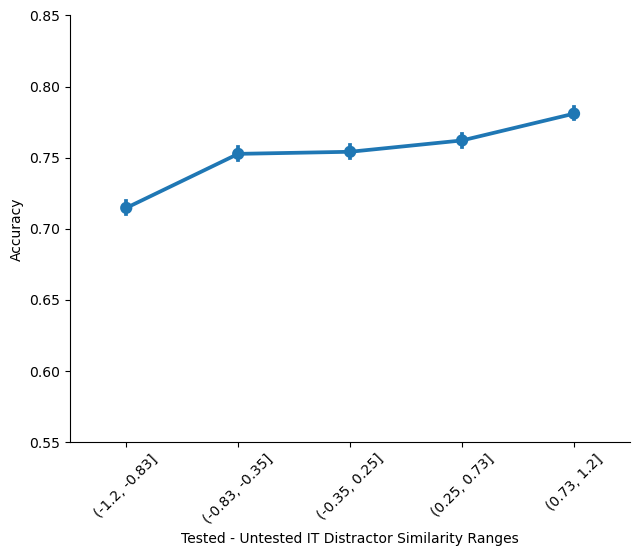

In [103]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
#             row = 'v2_prefers_test',
#             hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
#             palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

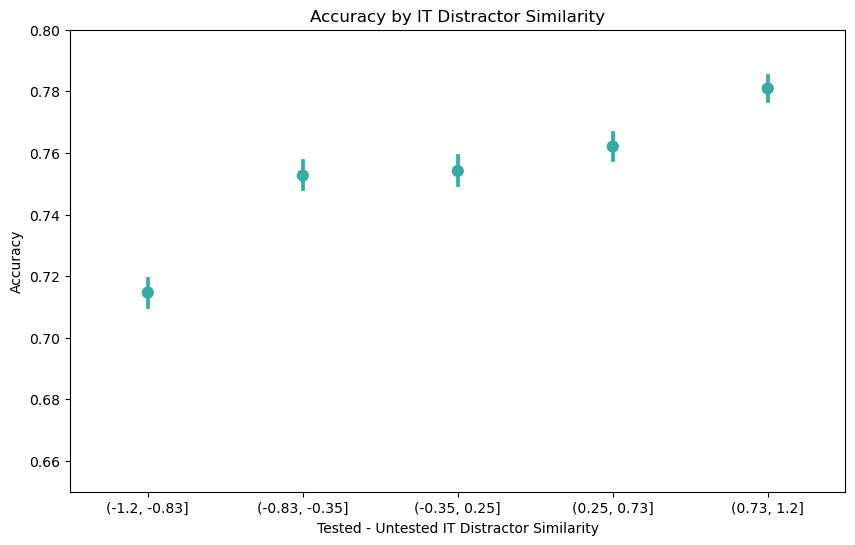

In [104]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity')
plt.title('Accuracy by IT Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2359488545.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

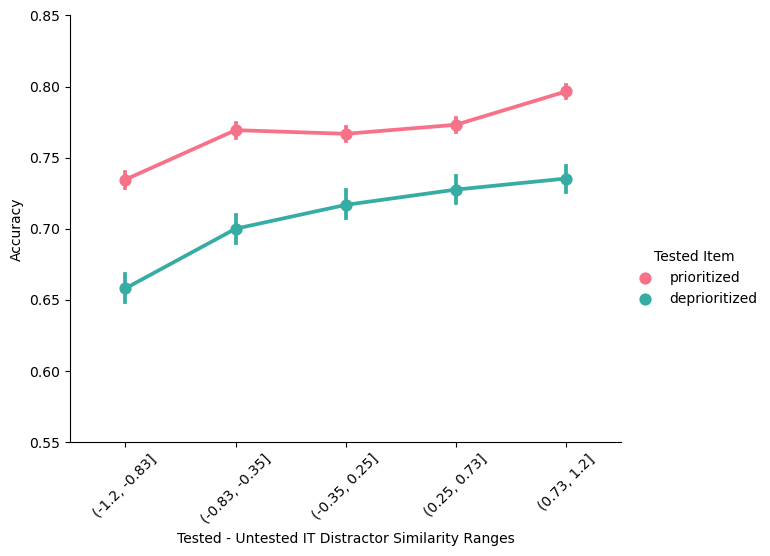

In [105]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
#             row = 'v2_prefers',
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/277507804.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

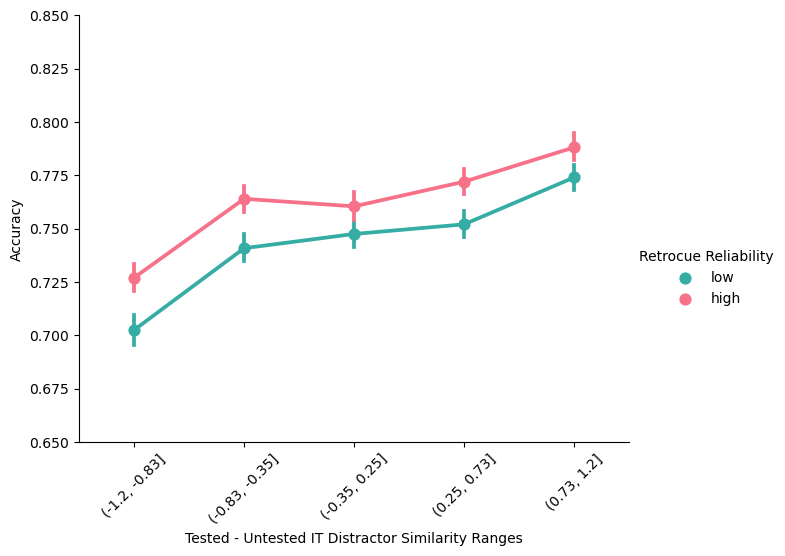

In [106]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3955138271.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


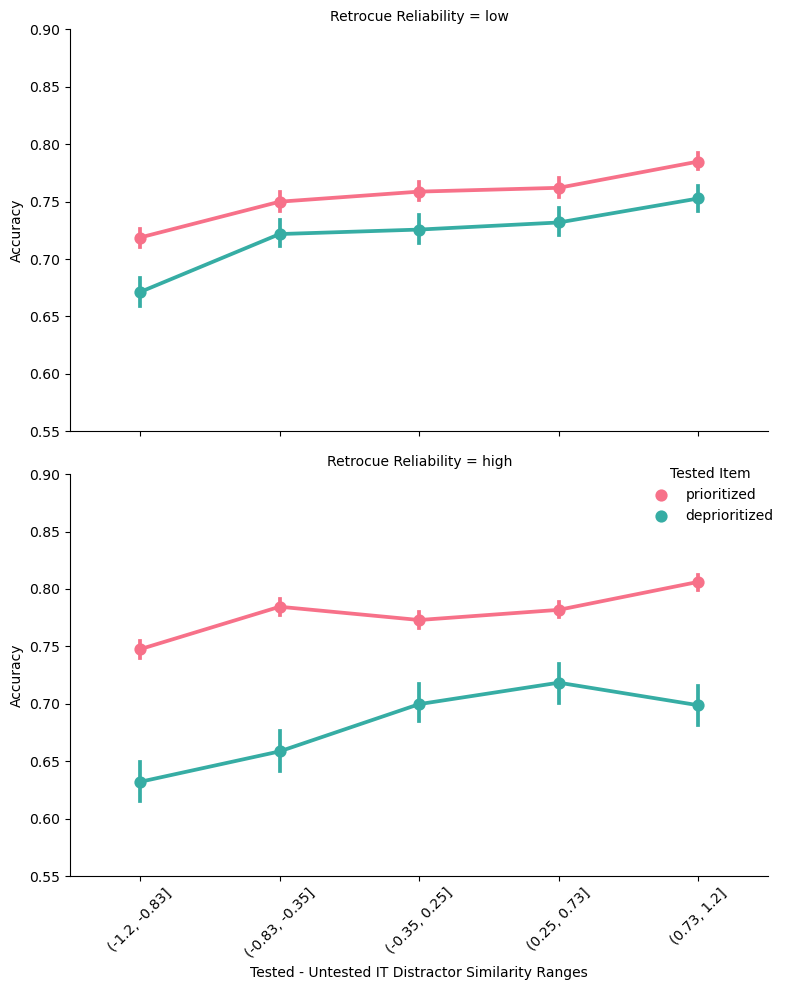

In [107]:


g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
#     dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Ranges", "Accuracy")
plt.tight_layout()
plt.show()

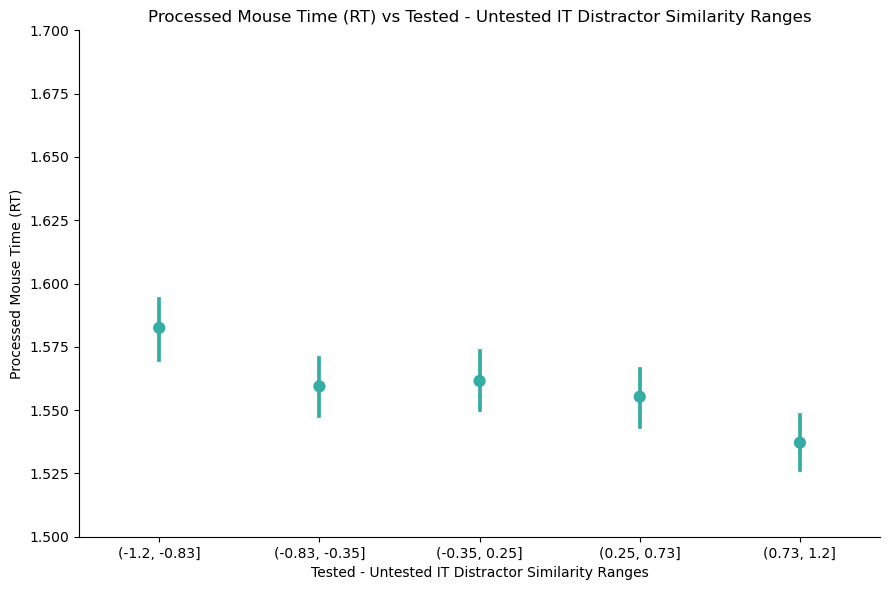

In [108]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

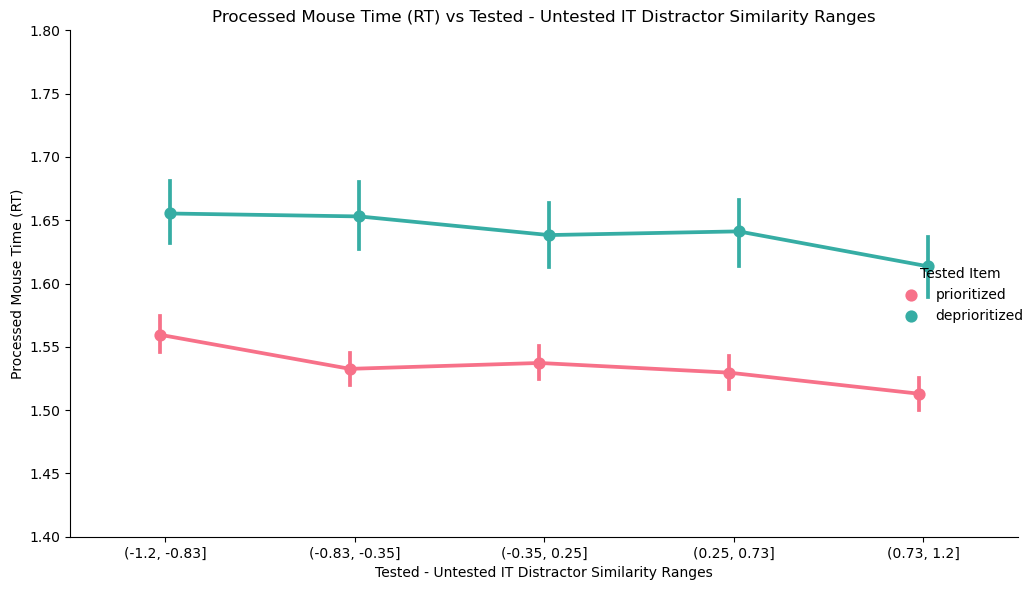

In [109]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

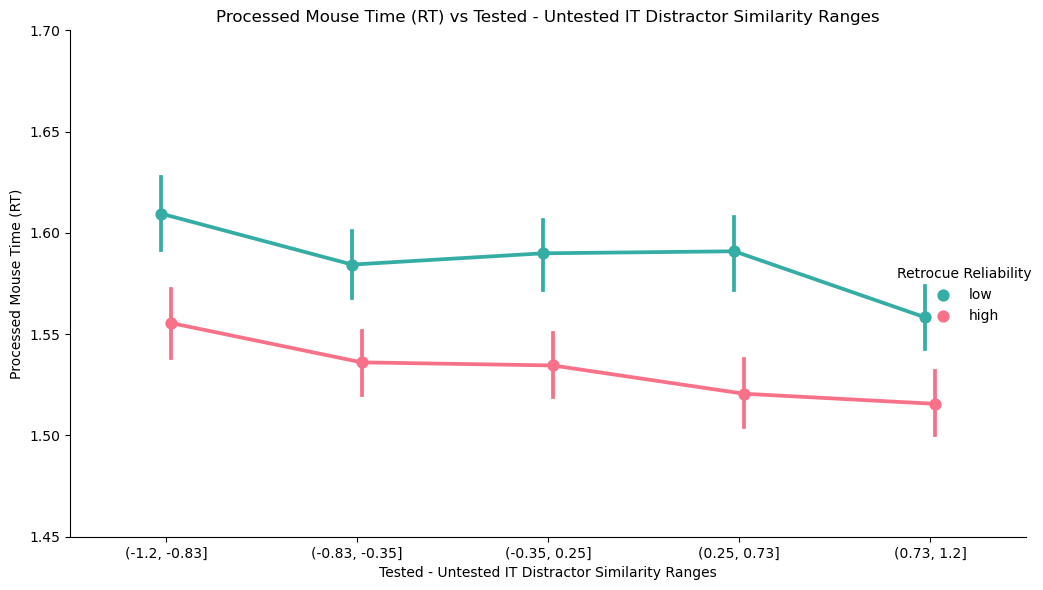

In [110]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

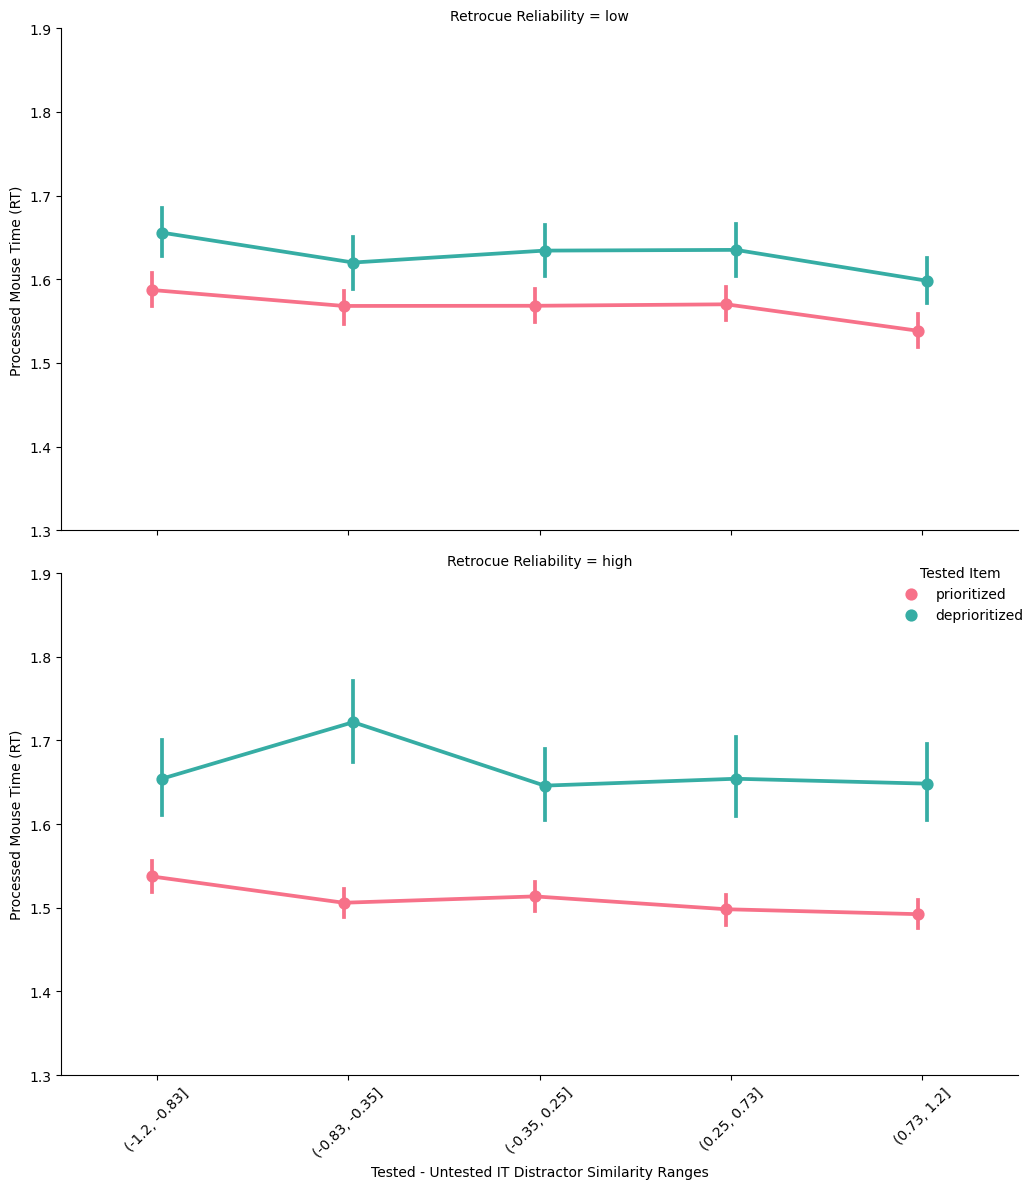

In [111]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1] # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested IT Distractor Similarity Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested IT Distractor Similarity Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()

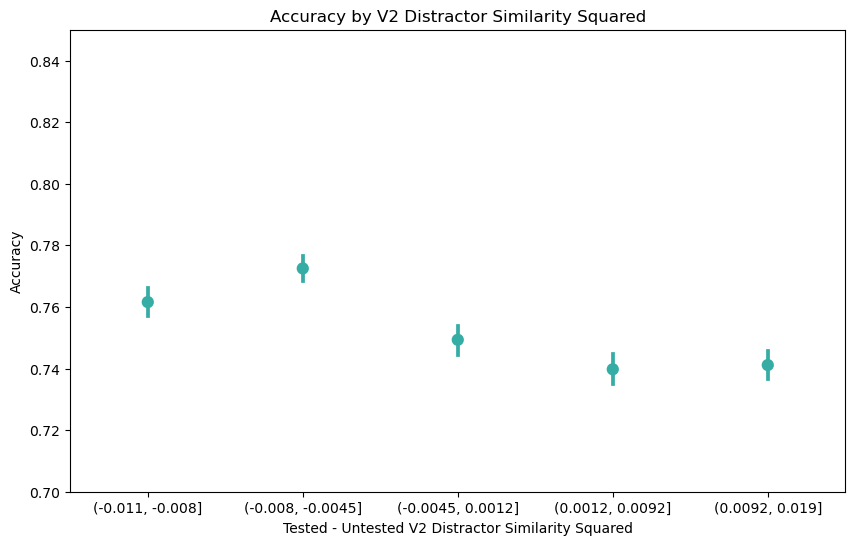

In [112]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test_sq',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity Squared')
plt.title('Accuracy by V2 Distractor Similarity Squared')
plt.show()




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1705917288.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

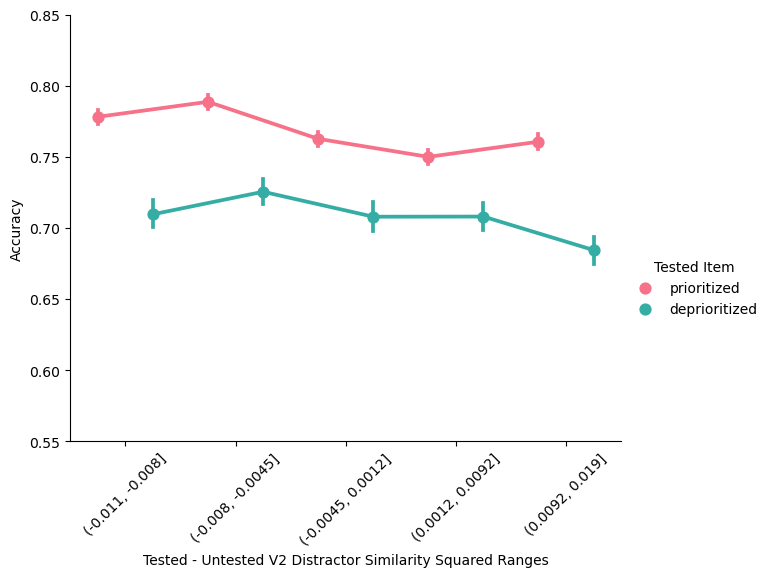

In [113]:

g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = sns.color_palette("husl", n_colors=2),  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2543625092.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

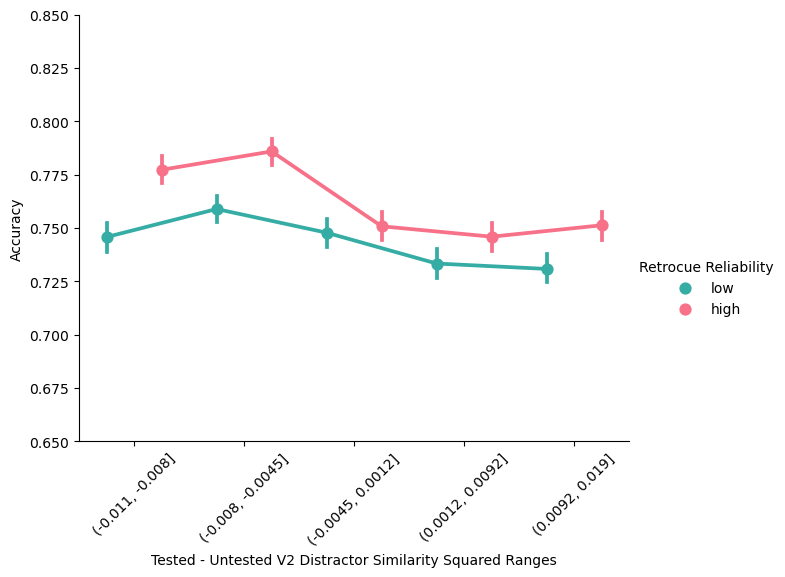

In [114]:

g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3860848634.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


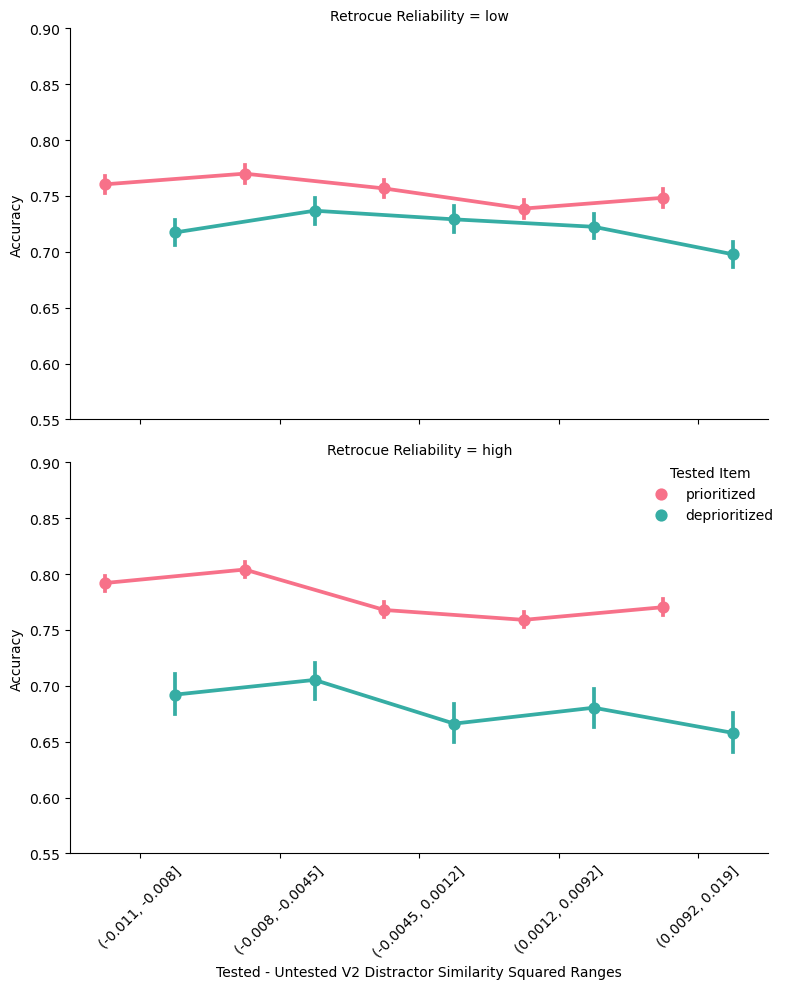

In [115]:


g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Squared Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested V2 Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

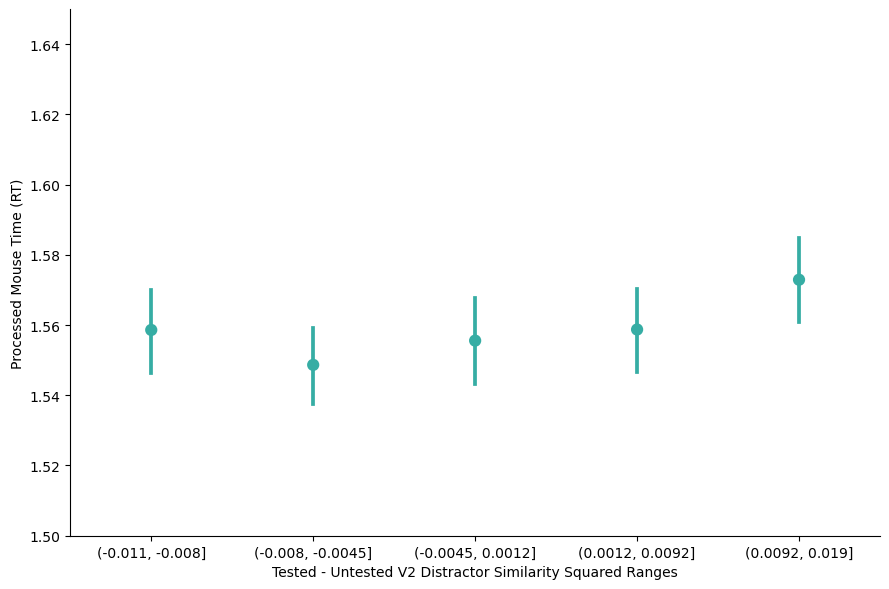

In [116]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nSquared Ranges')
plt.tight_layout()
plt.show()



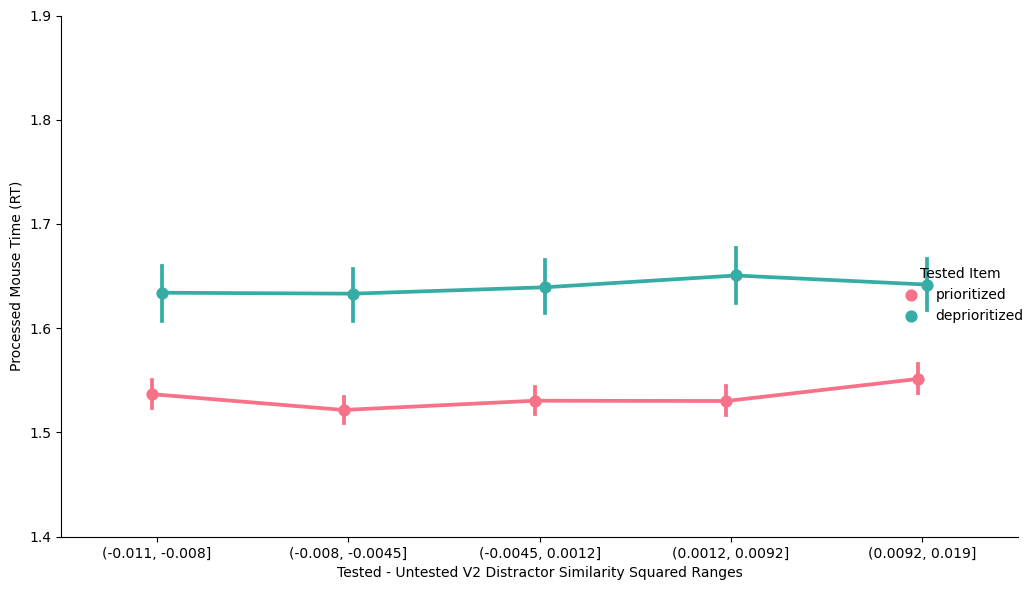

In [117]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Prioritized Item')
plt.tight_layout()
plt.show()



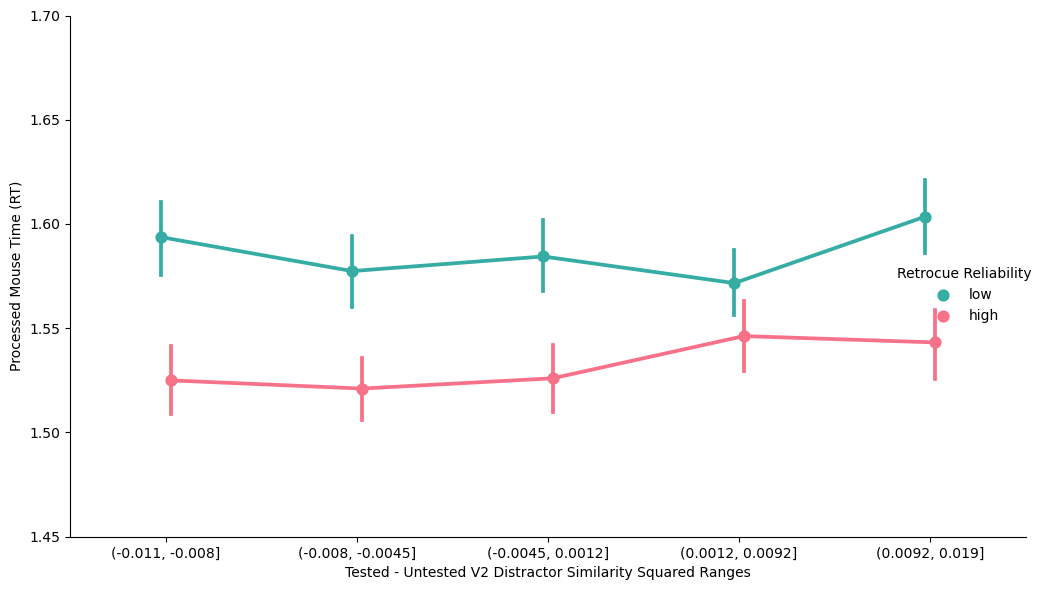

In [118]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges')
plt.tight_layout()
plt.show()



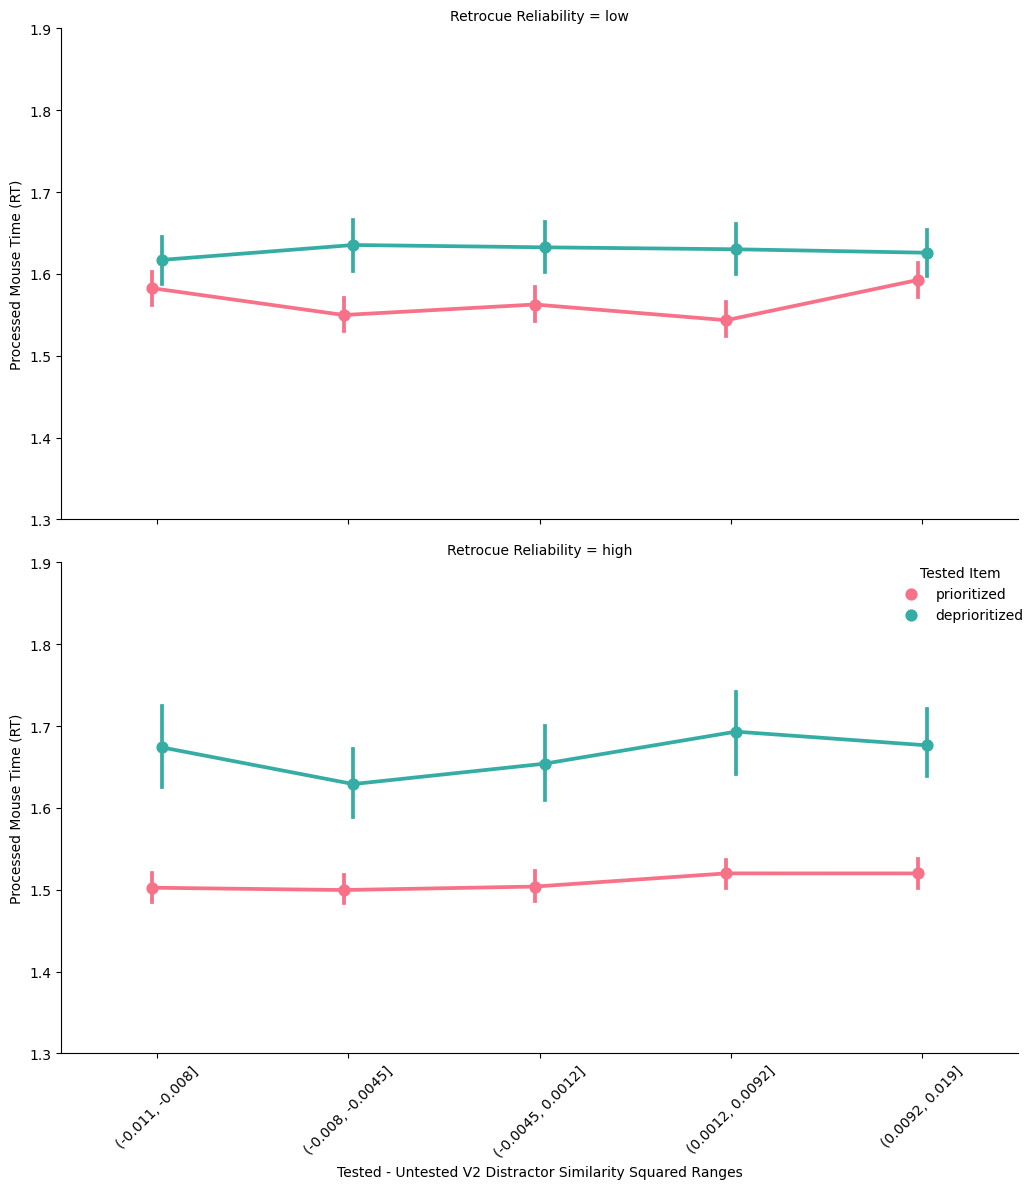

In [119]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Squared Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'], 
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested V2 Distractor Similarity Squared Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()



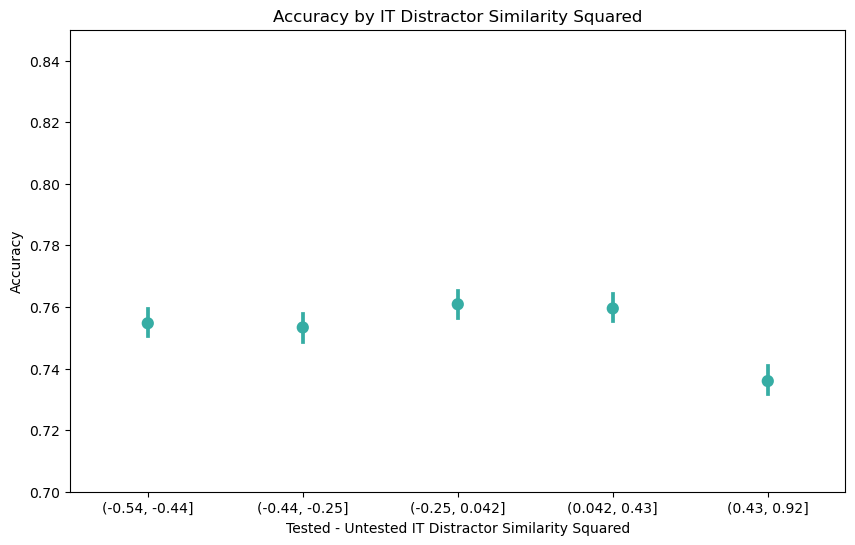

In [120]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test_sq',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity Squared')
plt.title('Accuracy by IT Distractor Similarity Squared')
plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/492118580.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

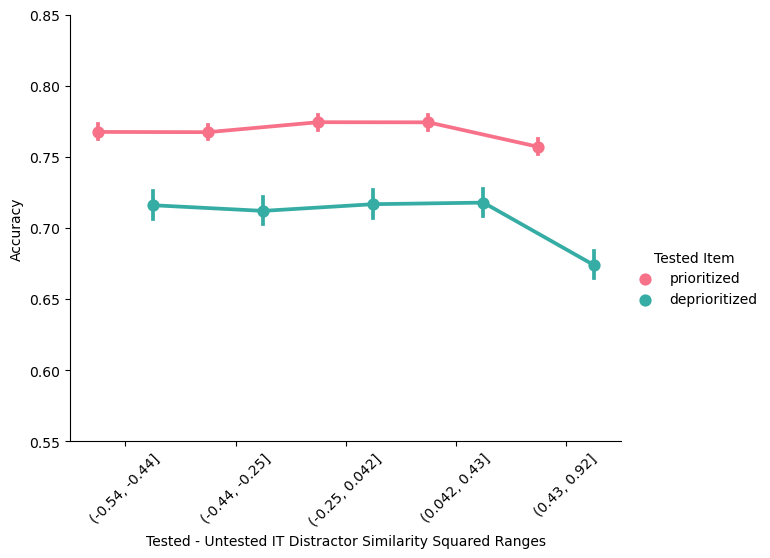

In [121]:


g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = sns.color_palette("husl", n_colors=2),  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1508938989.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

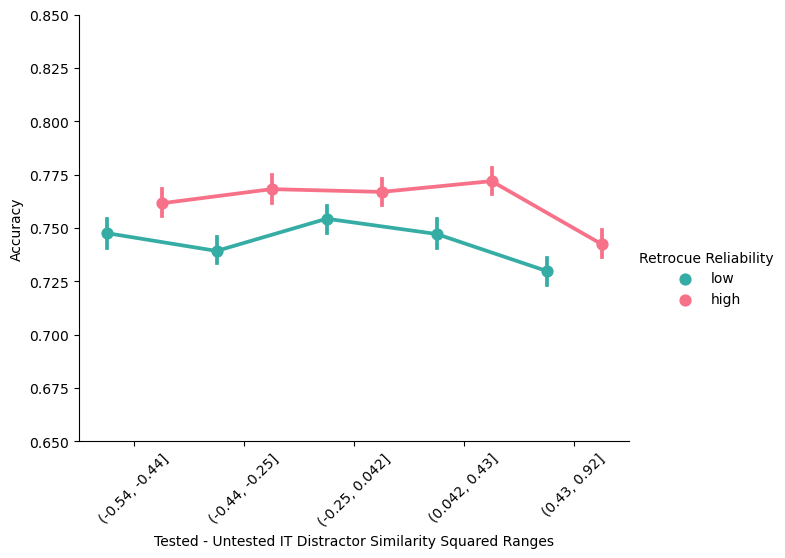

In [122]:

g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3566317007.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


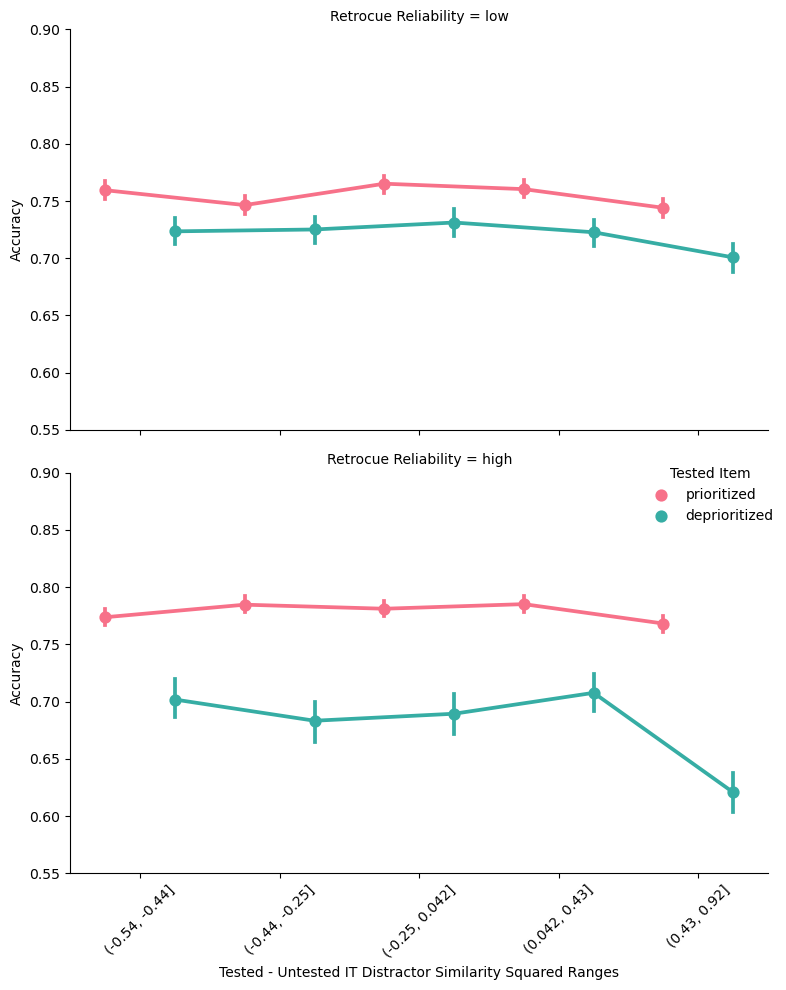

In [123]:

g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Squared Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

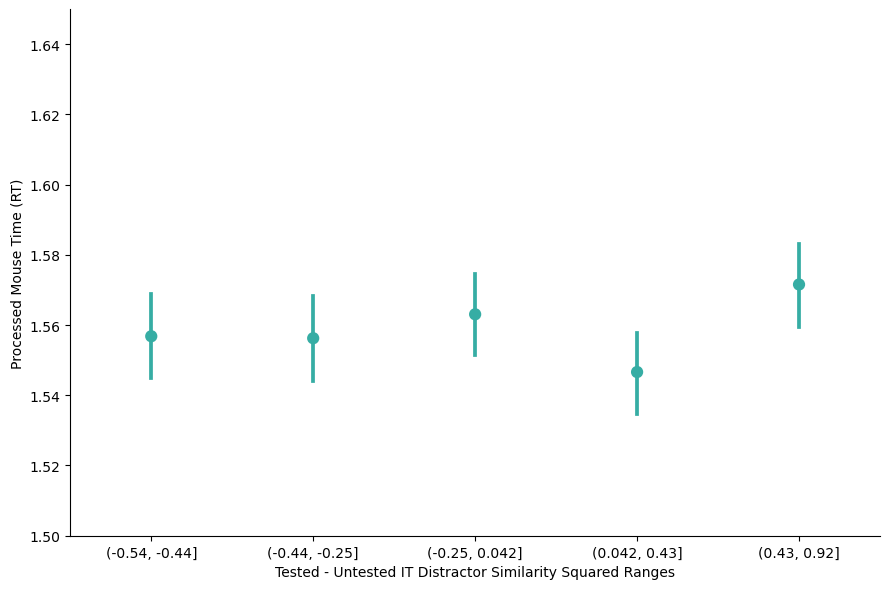

In [124]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nSquared Ranges')
plt.tight_layout()
plt.show()


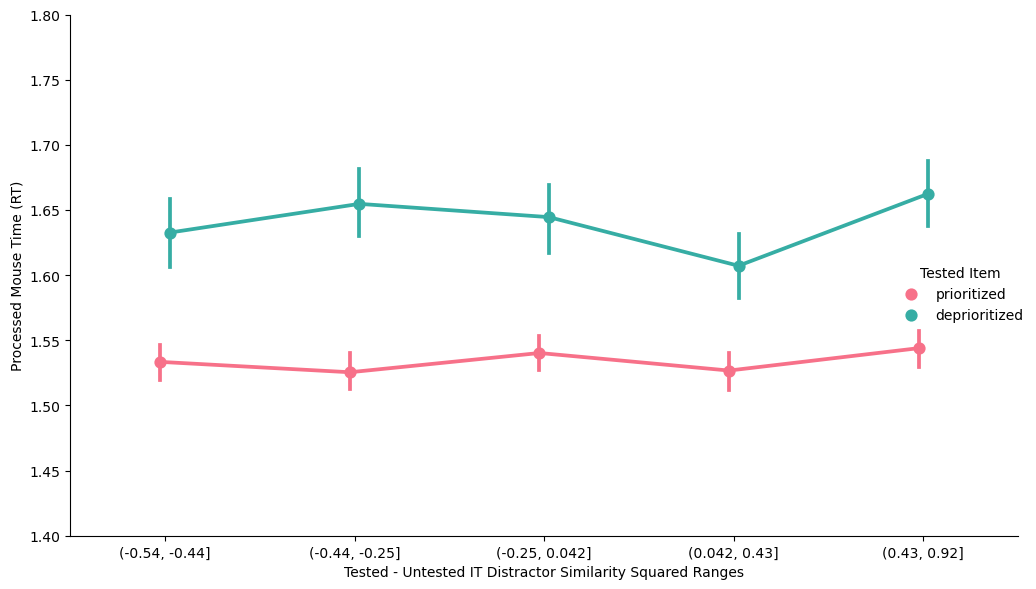

In [125]:

g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Prioritized Item')
plt.tight_layout()
plt.show()



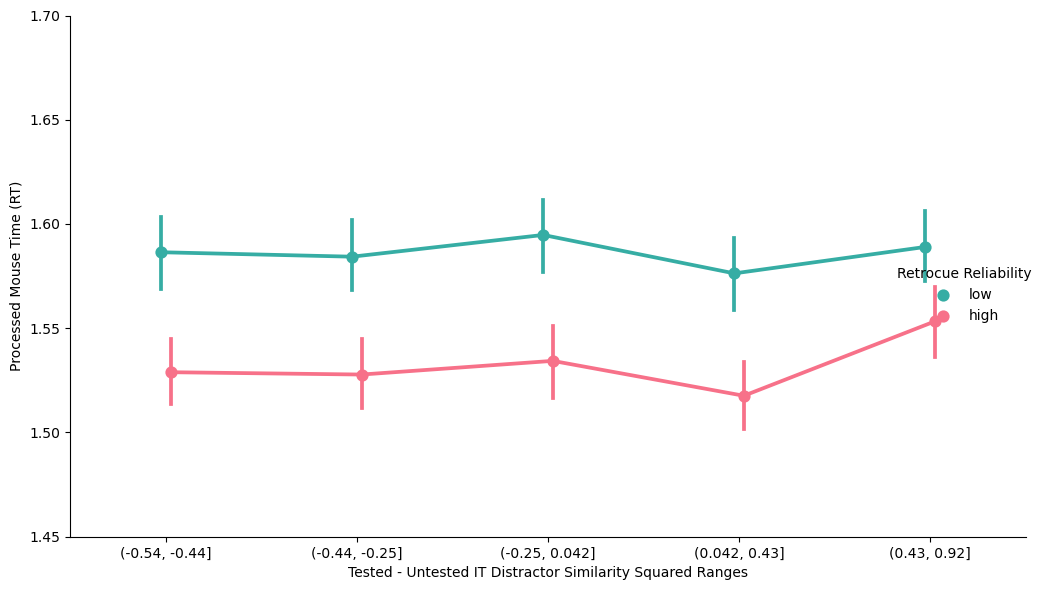

In [126]:

g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges')
plt.tight_layout()
plt.show()



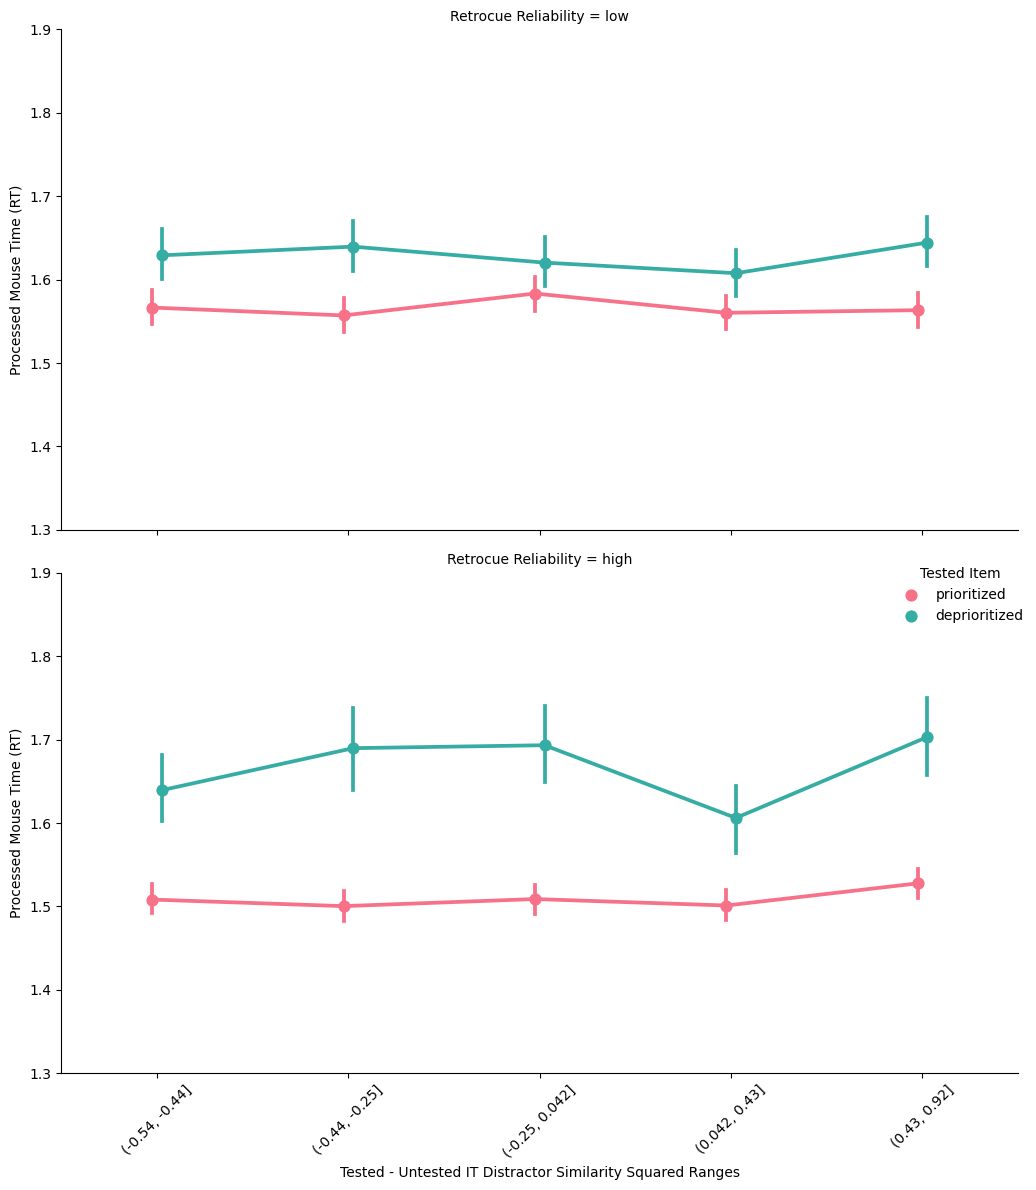

In [127]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Squared Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested IT Distractor Similarity Squared Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()


In [165]:
df['Prioritized - Deprioritized V2 Distractor Similarity Distance Ranges'] = pd.cut(df['it_sim_dis_diff'], bins=5)
df['Prioritized - Deprioritized IT Distractor Similarity Distance Ranges'] = pd.cut(df['v2_sim_dis_diff'], bins=5)
df['IT Distractor Similarity to Prioritized Item Distance Ranges'] = pd.cut(df['it_sim_dis_attend'], bins=5)
df['V2 Distractor Similarity to Prioritized Item Distance Ranges'] =  pd.cut(df['v2_sim_dis_attend'], bins=5)
df['Tested - Untested V2 Distractor Similarity Distance Ranges'] = pd.cut(df['it_sim_dis_diff_test'], bins=5)
df['Tested - Untested IT Distractor Similarity Distance Ranges'] = pd.cut(df['v2_sim_dis_diff_test'], bins=5)
df['IT Distractor Similarity to Tested Item Distance Ranges'] = pd.cut(df['it_sim_dis_test'], bins=5)
df['V2 Distractor Similarity to Tested Item Distance Ranges'] = pd.cut(df['v2_sim_dis_test'], bins=5)



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2845265064.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(46.88246527777777, 0.5, 'Accuracy')

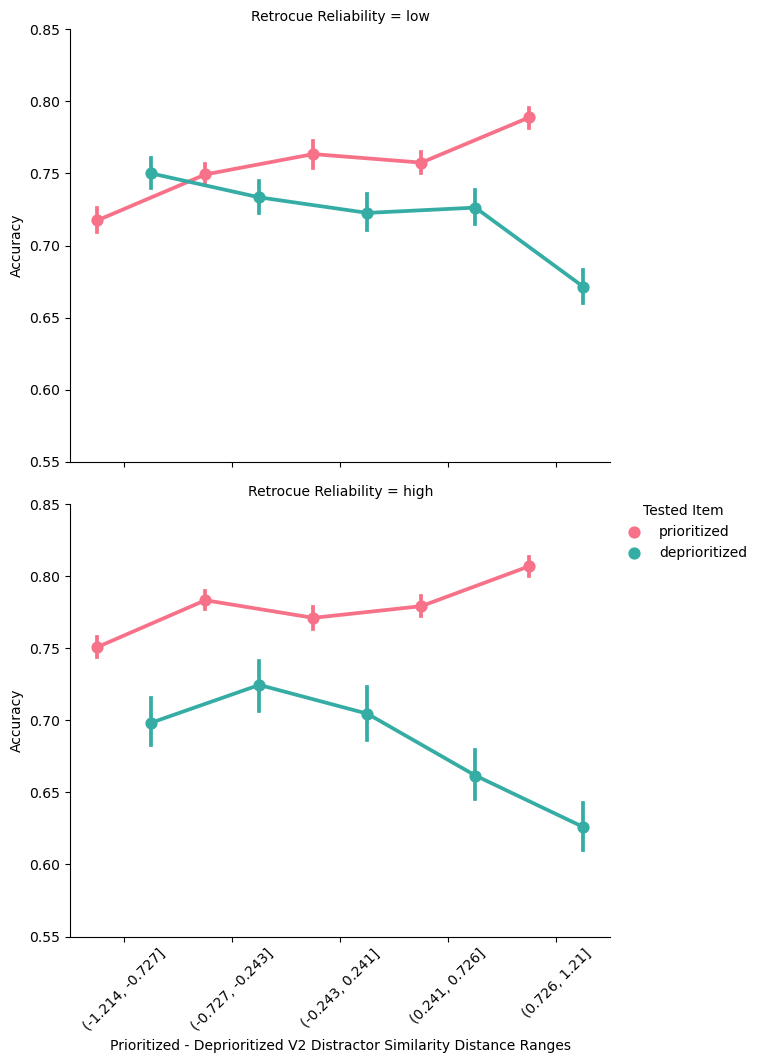

In [174]:
g = sns.catplot(
            x = 'Prioritized - Deprioritized V2 Distractor Similarity Distance Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],

            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/98512421.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

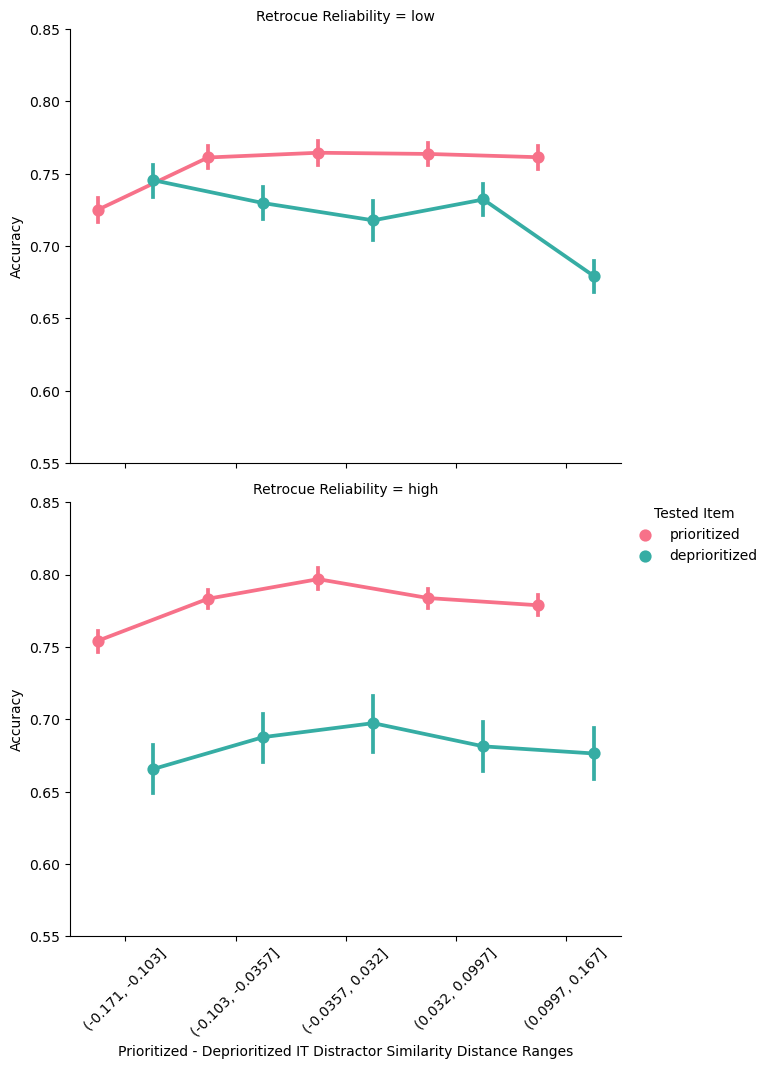

In [176]:
g = sns.catplot(
            x = 'Prioritized - Deprioritized IT Distractor Similarity Distance Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],

            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2938888024.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

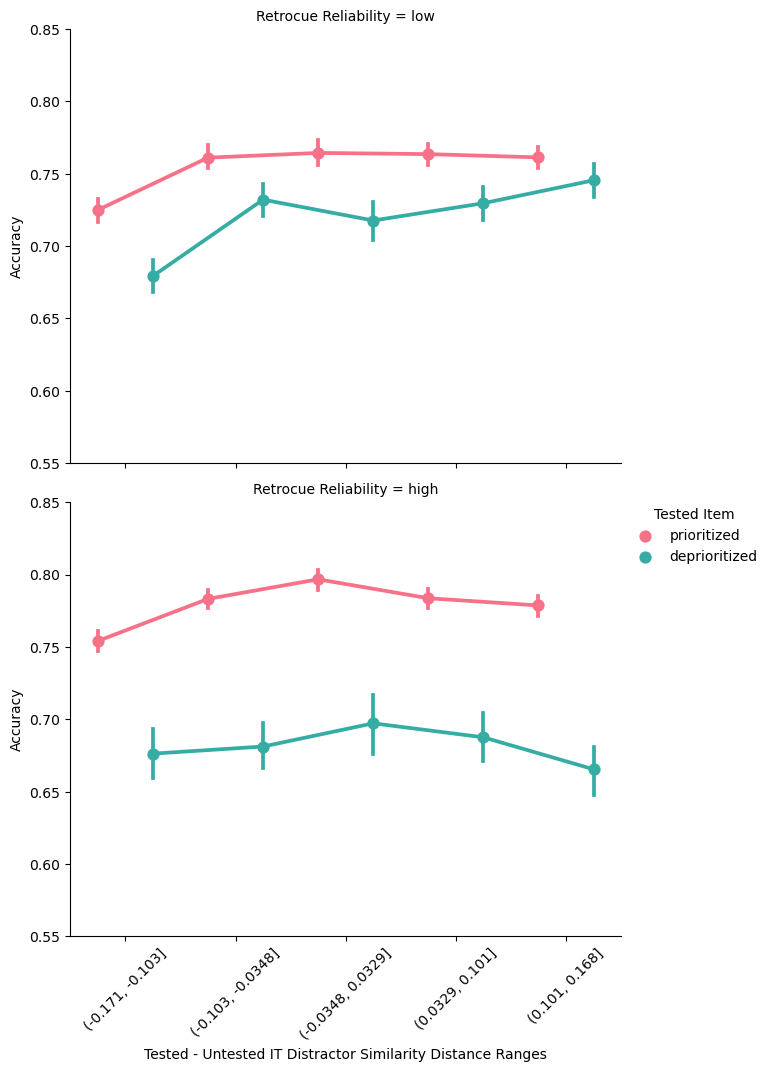

In [178]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Distance Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],

            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/1616979184.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


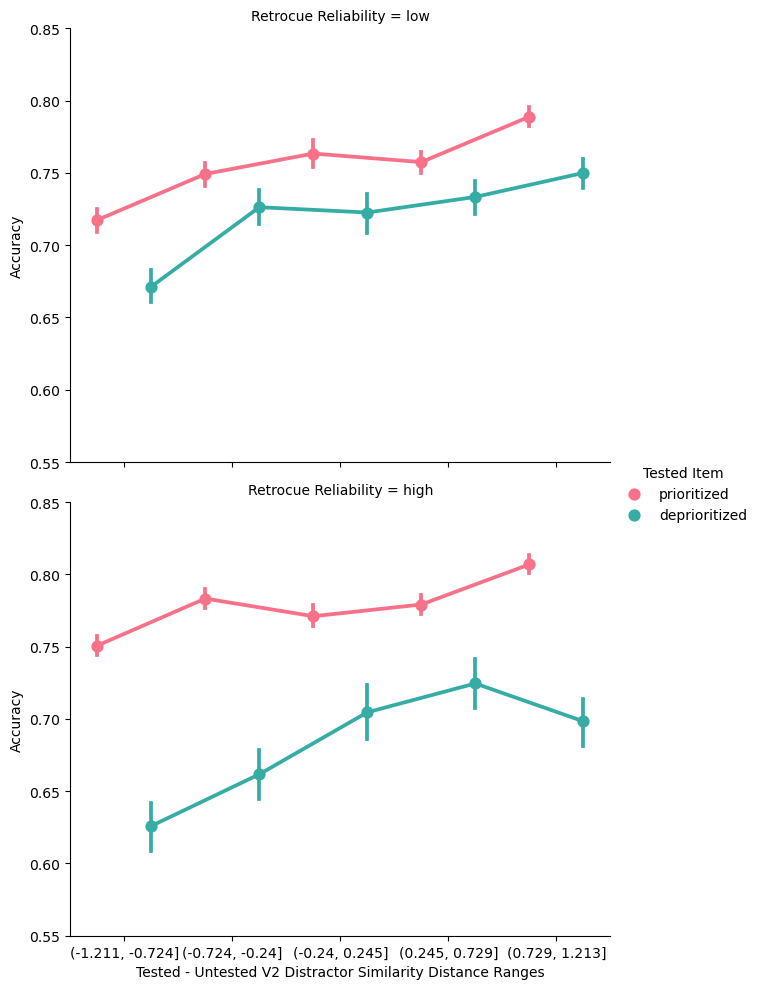

In [180]:

g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Distance Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            row = 'Retrocue Reliability',
            row_order = ['low', 'high'],

            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))


In [128]:
len(set(df['participant']))

134

In [129]:
df['tested_memorability_resmem']

0        0.821004
1        0.890449
2        0.972881
3        0.846955
4        0.817970
           ...   
40495    0.929148
40496    0.900686
40497    0.832947
40498    0.793200
40499    0.941686
Name: tested_memorability_resmem, Length: 40500, dtype: float64

In [130]:
### instead of Prioritized-Deprioritized similarity on x axis, get (both relative and absolute)
# Similarity to Tested item and then split by prioritzed - x axis will be relative to tested/untested instead of prioritized/deprioritized

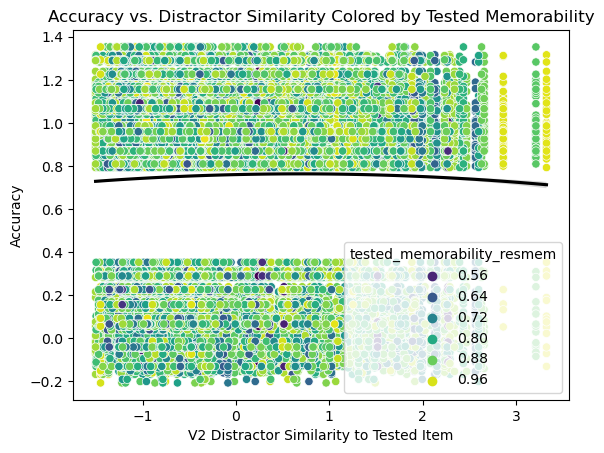

In [131]:
sns.scatterplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_resmem',        # Numeric
    palette='viridis',               # Continuous colormap
    data=df
)

sns.regplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    order=2,
    ci=68,
    scatter=False,                   # Don't re-draw points
    color='black',
    data=df
)

plt.title("Accuracy vs. Distractor Similarity Colored by Tested Memorability")
plt.show()

In [132]:
df['tested_memorability_binned'] = pd.qcut(df['tested_memorability_resmem'], q=5, 
                                           labels=['Low','Medium-Low','Medium', 'Medium-High','High'])


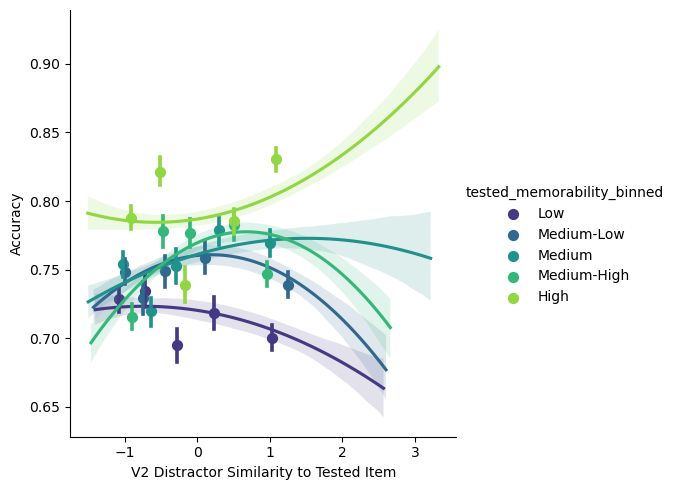

In [133]:
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

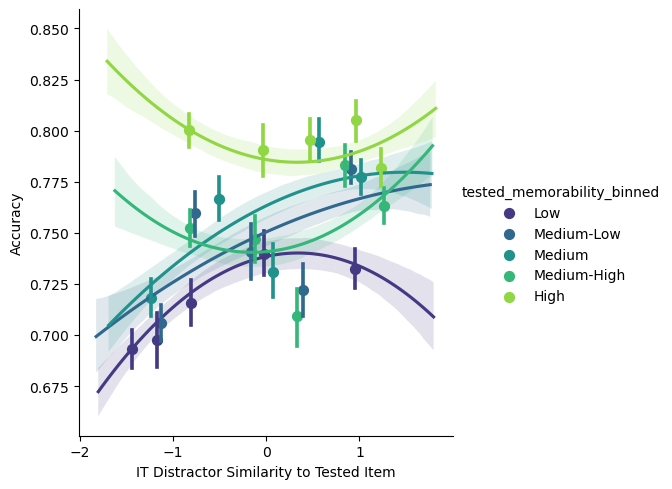

In [134]:
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

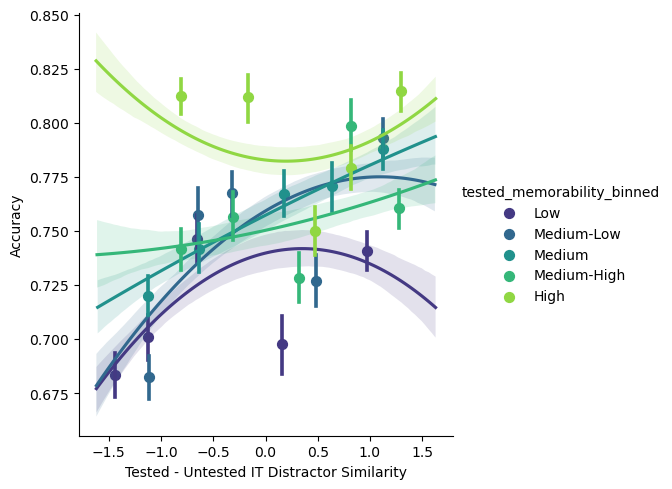

In [135]:
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3387455507.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


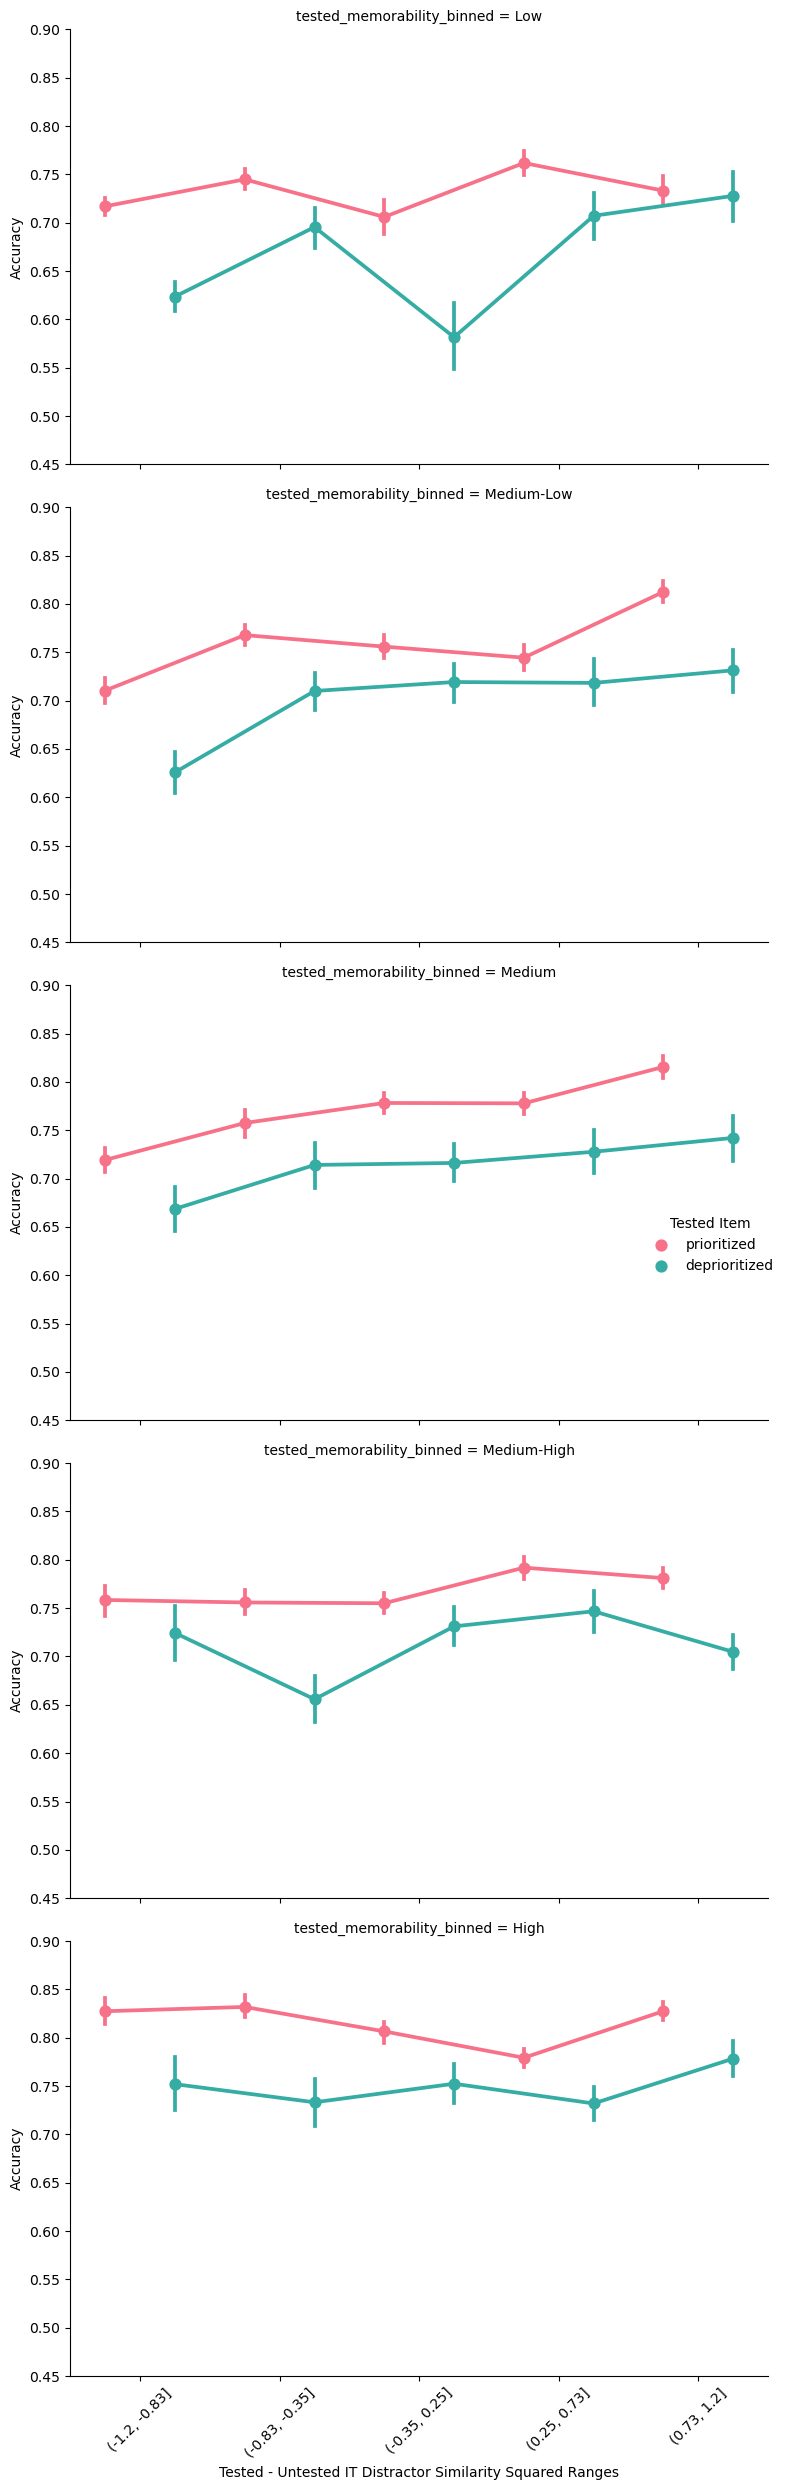

In [136]:

g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='tested_memorability_binned',  # Use 'row' instead of 'col'
    aspect=1.3,
#     row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.45, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/4190826694.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


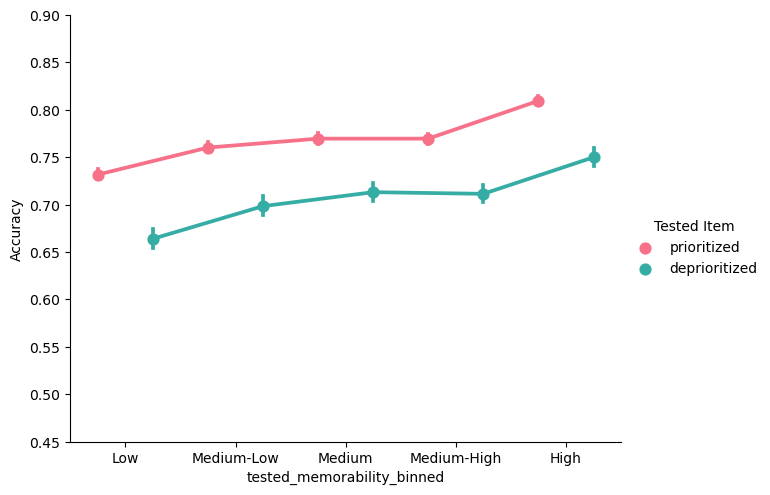

In [186]:
g = sns.catplot(
    x='tested_memorability_binned',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
#     row='Retrocue Reliability',
    aspect=1.3,
#     row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.45, 0.9))


In [187]:
df['tested_memorability_binned'] = pd.qcut(df['tested_memorability_resmem'], q=3, 
                                           labels=['Low','Medium', 'High'])


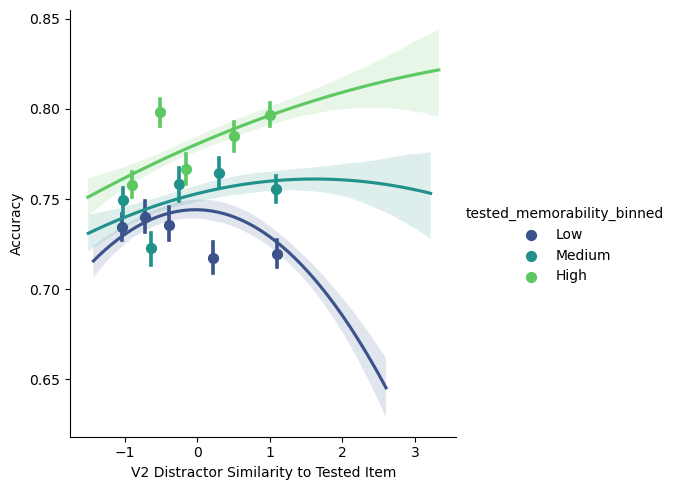

In [188]:
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

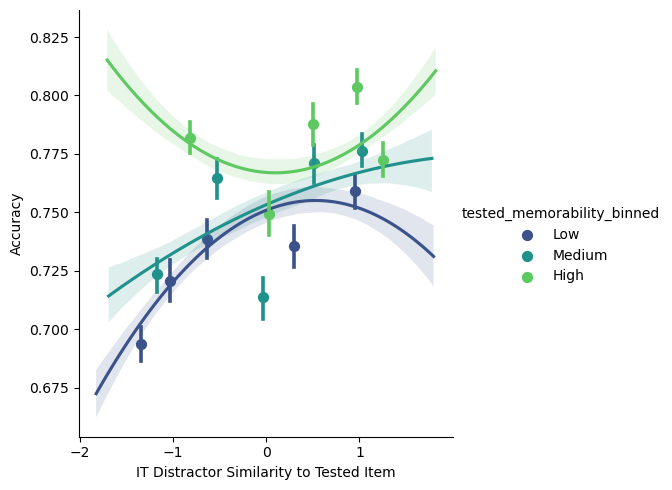

In [189]:
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

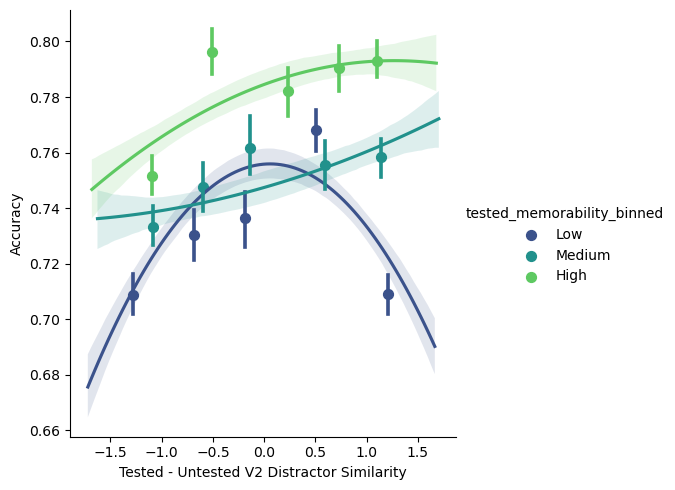

In [190]:
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

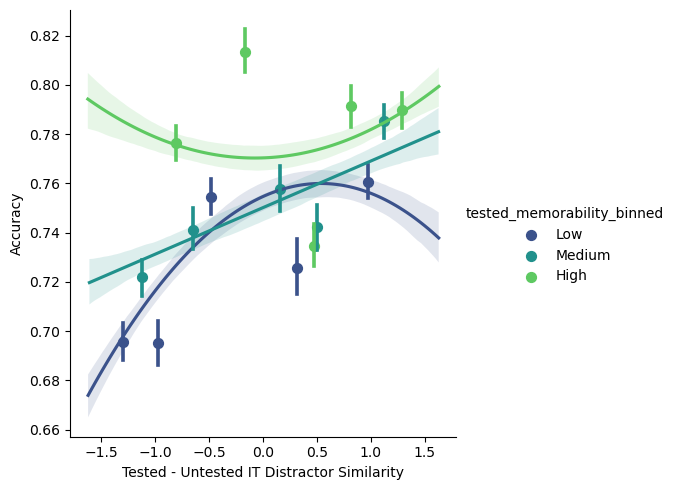

In [191]:
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue='tested_memorability_binned',  # Now it's categorical
    x_bins=5,
    order=2,
    ci=68,
    palette='viridis',
    data=df
)
plt.show()

In [192]:
# sns.lmplot(
#     x='V2 Distractor Similarity to Tested Item',
#     y='Accuracy',
#     hue='tested_memorability_binned',  # Now it's categorical
#     x_bins=5,
#     order=2,
#     ci=68,
#     palette='viridis',
#     data=df
# )
# plt.show()

# sns.lmplot(
#     x='IT Distractor Similarity to Tested Item',
#     y='Accuracy',
#     hue='tested_memorability_binned',  # Now it's categorical
#     x_bins=5,
#     order=2,
#     ci=68,
#     palette='viridis',
#     data=df
# )
# plt.show()

# sns.lmplot(
#     x='Tested - Untested V2 Distractor Similarity',
#     y='Accuracy',
#     hue='tested_memorability_binned',  # Now it's categorical
#     x_bins=5,
#     order=2,
#     ci=68,
#     palette='viridis',
#     data=df
# )
# plt.show()

# sns.lmplot(
#     x='Tested - Untested IT Distractor Similarity',
#     y='Accuracy',
#     hue='tested_memorability_binned',  # Now it's categorical
#     x_bins=5,
#     order=2,
#     ci=68,
#     palette='viridis',
#     data=df
# )
# plt.show()

In [193]:
df['Tested Item Memorability'] = df['tested_memorability_binned']

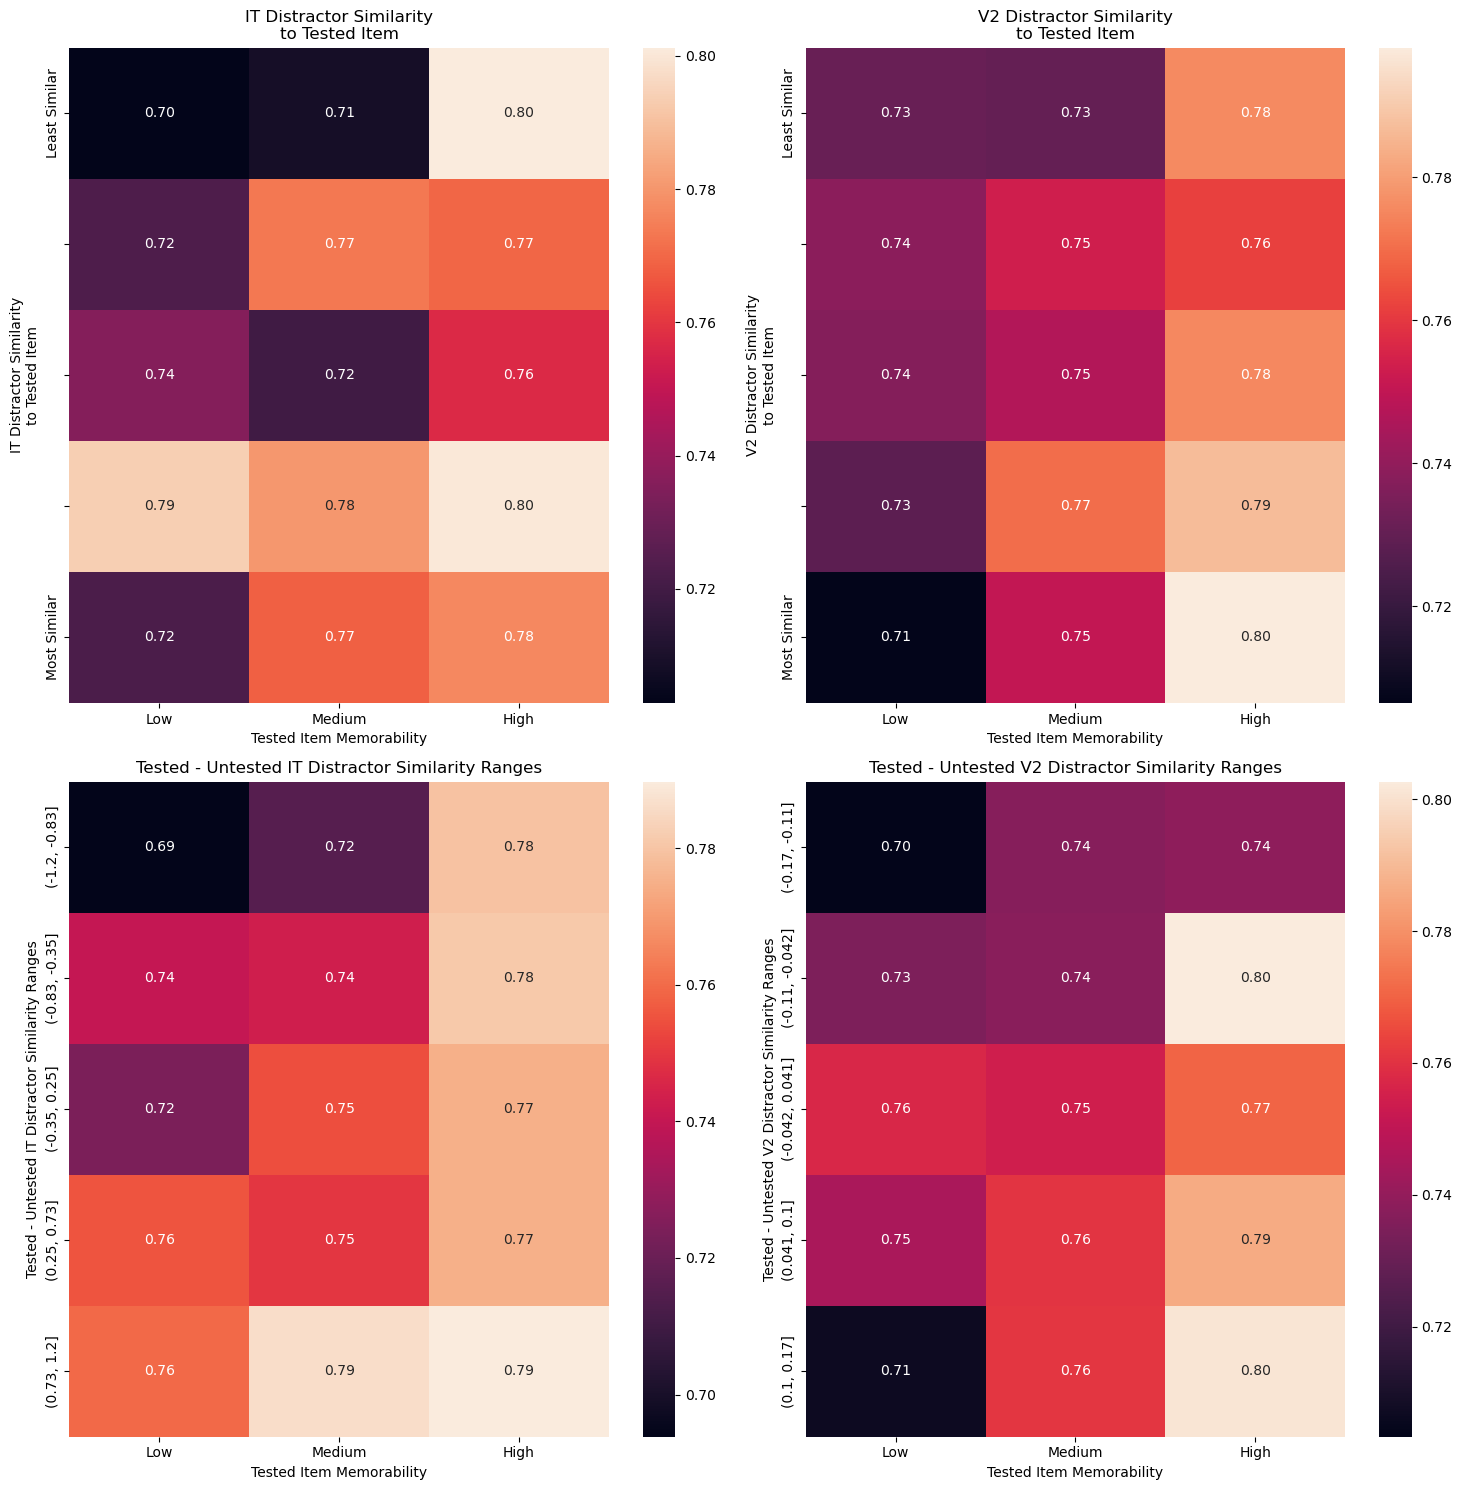

In [194]:
# Create a figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create heatmaps
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    # Create pivot table
    heatmap_data = df.pivot_table(
        values='Accuracy',
        index=metric,
        columns='Tested Item Memorability',
        aggfunc='mean'
    )
    
    # Create heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.2f',
        #cmap='RdYlBu_r',
        ax=ax
    )
    
    # Set title
    ax.set_title(metric)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/3617249075.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(


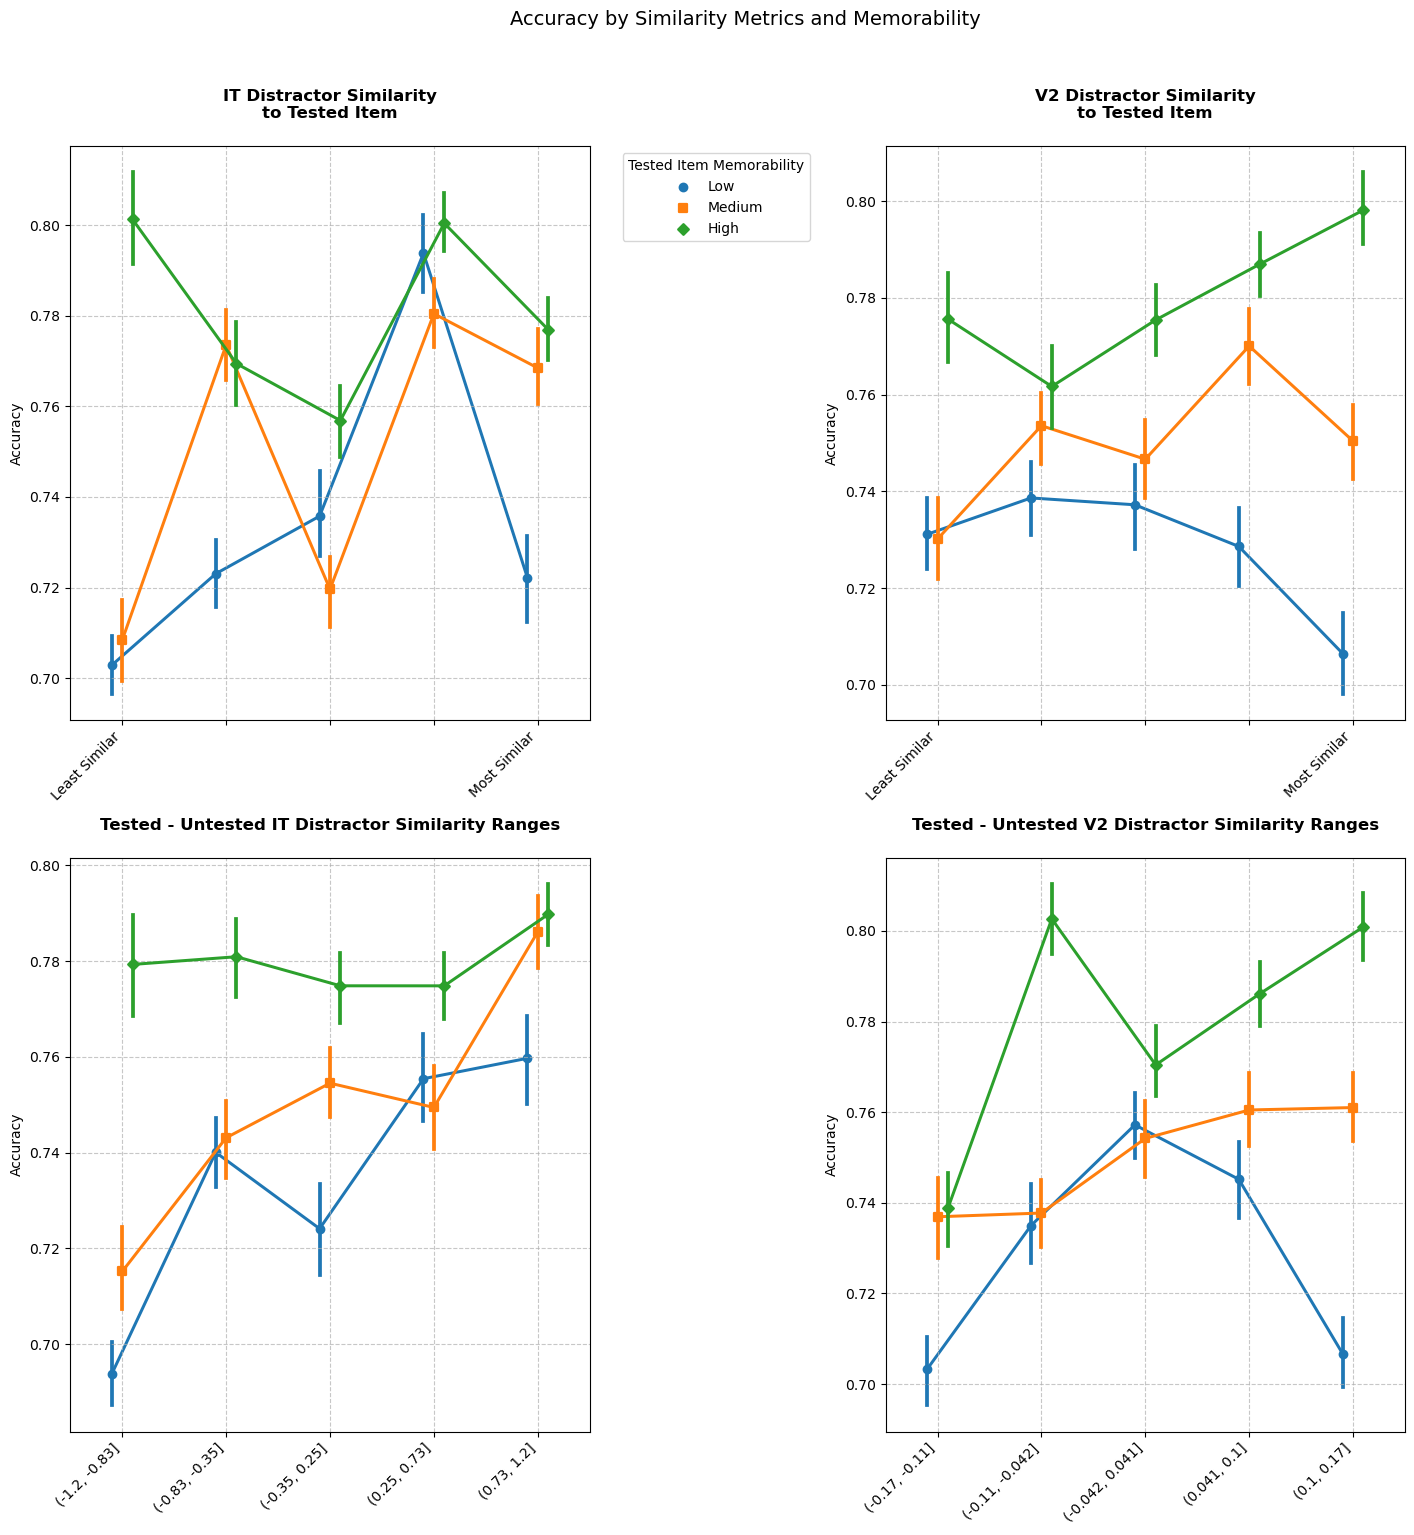

In [195]:
# Set figure size and create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create point plots
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    sns.pointplot(
        x=metric,
        y='Accuracy',
        hue='Tested Item Memorability',
        data=df,
        dodge=0.2,
        ci=68,
        ax=ax,
        markers=['o', 's', 'D', '^', 'v'],  # Different markers for each category
        scale=0.8,  # Adjust point size
        #legend=False if ax != ax1 else True
    )
    
    # Customize each subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(metric, pad=20, fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('')  # Remove x-label as it's in the title
    
    # Remove legend if not the first plot
    if ax != ax1:
        ax.get_legend().remove()

# Move legend outside for first subplot
legend = ax1.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Tested Item Memorability',
    title_fontsize=10,
    frameon=True
)

# Add main title
fig.suptitle('Accuracy by Similarity Metrics and Memorability', fontsize=14, y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make room for legend
plt.show()

<Axes: xlabel='Tested Item Memorability', ylabel='Accuracy'>

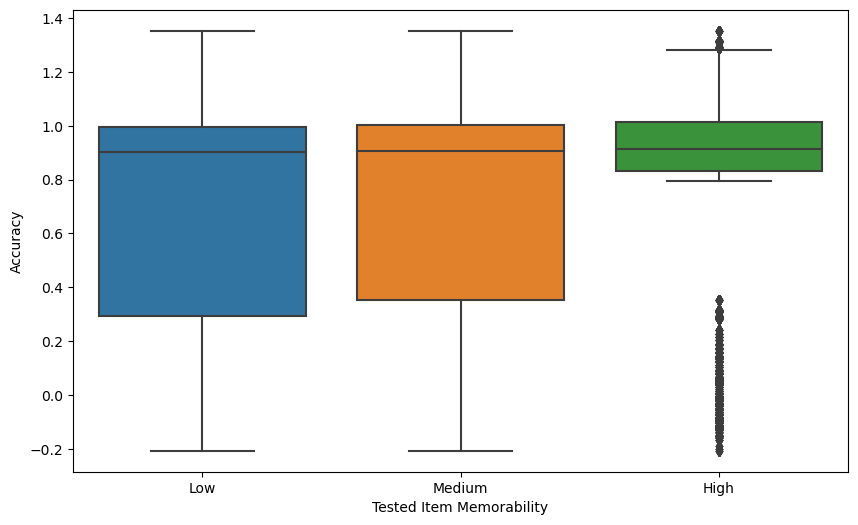

In [196]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Tested Item Memorability',
    y='Accuracy',
    data=df
)

In [197]:
df['Tested Item Memorability - Distance split'] = pd.cut(df['tested_memorability_resmem'], bins=5)


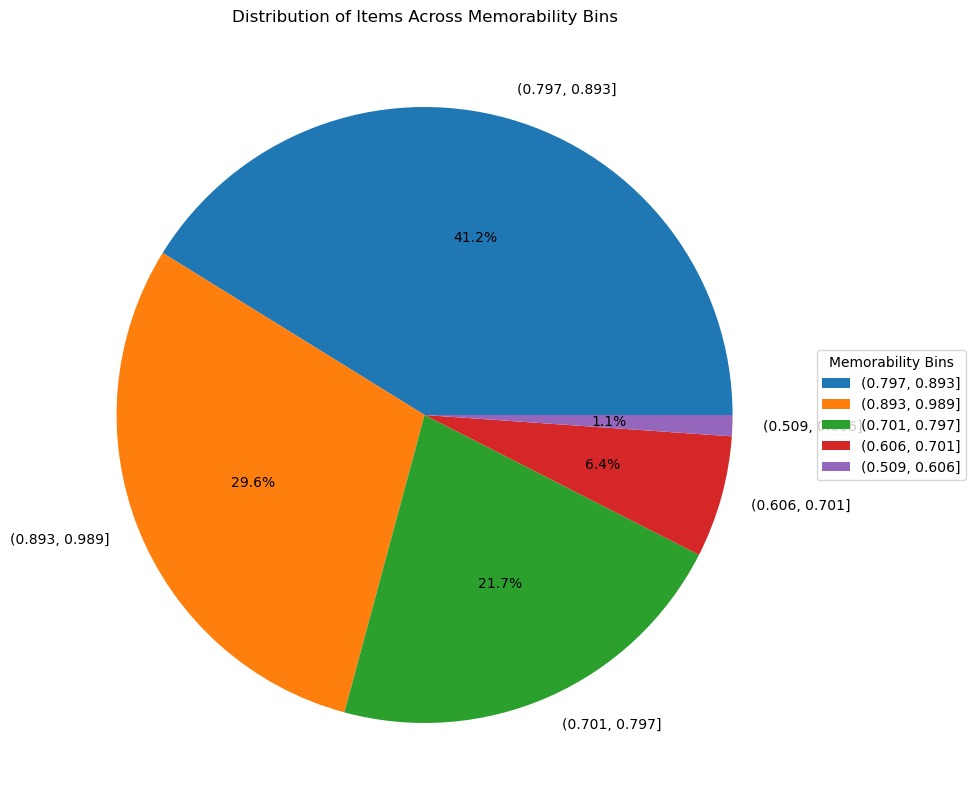

In [198]:
counts = df['Tested Item Memorability - Distance split'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Items Across Memorability Bins')
plt.legend(counts.index, title="Memorability Bins", 
         loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [199]:
print("Raw value counts:")
print(df['Tested Item Memorability - Distance split'].value_counts(dropna=True))

# If that doesn't work, let's try to understand what's in the column
print("\nUnique values:")
print(df['Tested Item Memorability - Distance split'].unique())

print("\nColumn info:")
print(df['Tested Item Memorability - Distance split'].info())

Raw value counts:
(0.797, 0.893]    16678
(0.893, 0.989]    11999
(0.701, 0.797]     8785
(0.606, 0.701]     2590
(0.509, 0.606]      448
Name: Tested Item Memorability - Distance split, dtype: int64

Unique values:
[(0.797, 0.893], (0.893, 0.989], (0.701, 0.797], (0.606, 0.701], (0.509, 0.606]]
Categories (5, interval[float64, right]): [(0.509, 0.606] < (0.606, 0.701] < (0.701, 0.797] < (0.797, 0.893] < (0.893, 0.989]]

Column info:
<class 'pandas.core.series.Series'>
RangeIndex: 40500 entries, 0 to 40499
Series name: Tested Item Memorability - Distance split
Non-Null Count  Dtype   
--------------  -----   
40500 non-null  category
dtypes: category(1)
memory usage: 39.9 KB
None


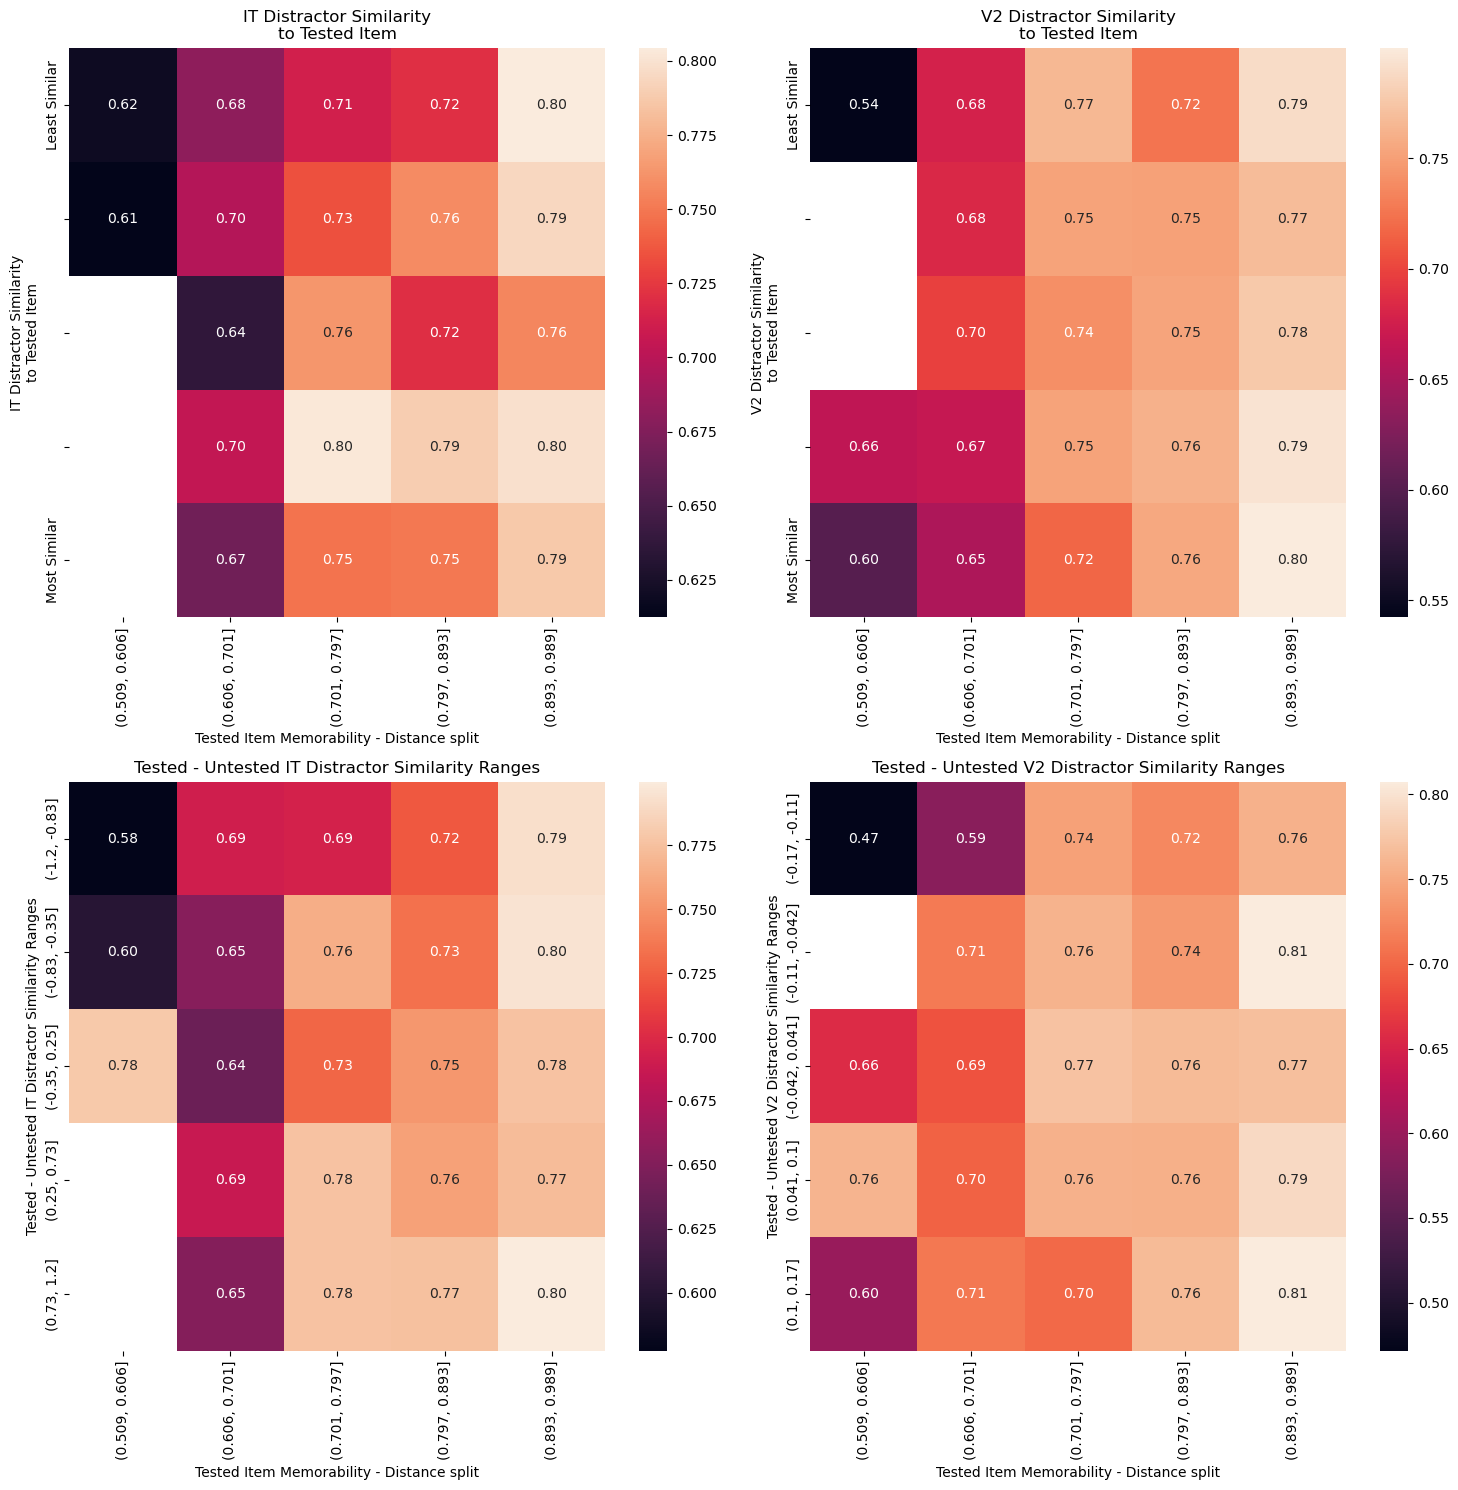

In [200]:
# Create a figure with 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create heatmaps
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    # Create pivot table
    heatmap_data = df.pivot_table(
        values='Accuracy',
        index=metric,
        columns='Tested Item Memorability - Distance split',
        aggfunc='mean'
    )
    
    # Create heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.2f',
        #cmap='RdYlBu_r',
        ax=ax
    )
    
    # Set title
    ax.set_title(metric)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2316851279.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2316851279.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2316851279.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_86159/2316851279.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.pointplot(


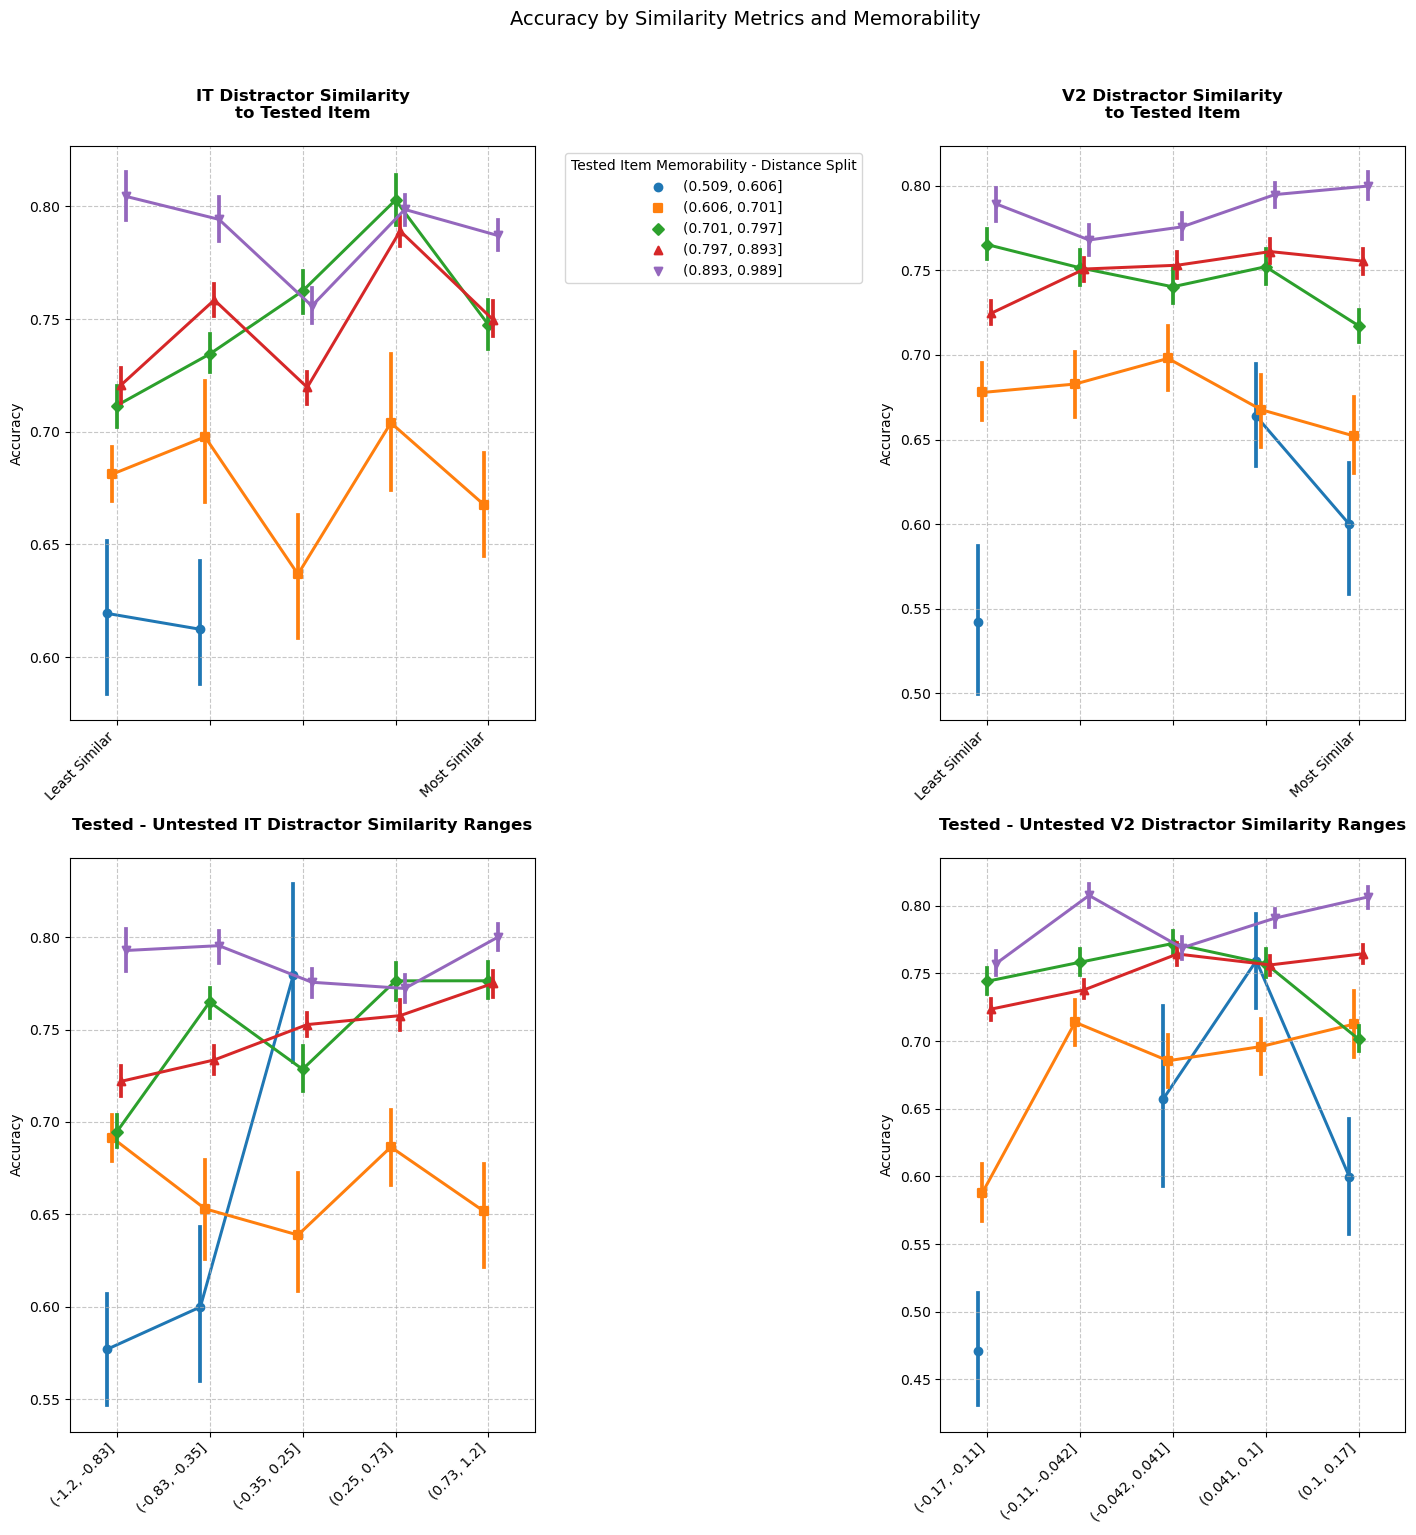

In [201]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# List of similarity metrics
similarity_metrics = [
    'IT Distractor Similarity\nto Tested Item',
    'V2 Distractor Similarity\nto Tested Item',
    'Tested - Untested IT Distractor Similarity Ranges',
    'Tested - Untested V2 Distractor Similarity Ranges'
]

# Create point plots
axes = [ax1, ax2, ax3, ax4]
for ax, metric in zip(axes, similarity_metrics):
    sns.pointplot(
        x=metric,
        y='Accuracy',
        hue='Tested Item Memorability - Distance split',

        data=df,
        dodge=0.2,
        ci=68,
        ax=ax,
        markers=['o', 's', 'D', '^', 'v'],  # Different markers for each category
        scale=0.8,  # Adjust point size
        #legend=False if ax != ax1 else True
    )
    
    # Customize each subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(metric, pad=20, fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('')  # Remove x-label as it's in the title
    
    # Remove legend if not the first plot
    if ax != ax1:
        ax.get_legend().remove()

# Move legend outside for first subplot
legend = ax1.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    title='Tested Item Memorability - Distance Split',
    title_fontsize=10,
    frameon=True
)

# Add main title
fig.suptitle('Accuracy by Similarity Metrics and Memorability', fontsize=14, y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Make room for legend
plt.show()

In [202]:
df['Tested Item Memorability']

0        Medium
1          High
2          High
3        Medium
4        Medium
          ...  
40495      High
40496      High
40497    Medium
40498       Low
40499      High
Name: Tested Item Memorability, Length: 40500, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [203]:
# sns.catplot(
#     data=df,
#     x='Tested Item Memorability',
#     y='Accuracy',
#     hue='Tested Item',
#     col='Retrocue Reliability',
#     kind='point',
#     ci=68,
#     palette=palette[::-1],
#     height=6,
#     aspect=1.3
# )

In [204]:

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(20, 10))

# ax1 = fig.add_subplot(121, projection='3d')
# scatter = ax1.scatter(df['V2 Distractor Similarity to Tested Item'],
#                      df['tested_memorability_resmem'],
#                      df['Accuracy'],
#                      c=df['tested_memorability_resmem'],
#                      cmap='viridis',
#                      s=50)
# ax1.set_xlabel('Distractor Similarity')
# ax1.set_ylabel('Memorability')
# ax1.set_zlabel('Accuracy')
# ax1.set_title('3D Scatter Plot with Memorability Color Gradient')
# plt.colorbar(scatter, label='Memorability')

# ax2 = fig.add_subplot(122, projection='3d')

# x = np.linspace(df['V2 Distractor Similarity to Tested Item'].min(), 
#                 df['V2 Distractor Similarity to Tested Item'].max(), 20)
# y = np.linspace(df['tested_memorability_resmem'].min(), 
#                 df['tested_memorability_resmem'].max(), 20)
# X, Y = np.meshgrid(x, y)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# X_train = df[['V2 Distractor Similarity to Tested Item', 'tested_memorability_resmem']]
# y_train = df['Accuracy']

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X_train)

# model = LinearRegression()
# model.fit(X_poly, y_train)

# X_pred = np.column_stack((X.ravel(), Y.ravel()))
# X_pred_poly = poly.transform(X_pred)
# Z = model.predict(X_pred_poly).reshape(X.shape)

# surf = ax2.plot_surface(X, Y, Z, cmap='viridis',
#                        linewidth=0, antialiased=True)
# ax2.set_xlabel('Distractor Similarity')
# ax2.set_ylabel('Memorability')
# ax2.set_zlabel('Accuracy')
# ax2.set_title('3D Surface Plot of Accuracy Prediction')
# plt.colorbar(surf, label='Predicted Accuracy')

# plt.tight_layout()

# import plotly.express as px
# import plotly.graph_objects as go

# fig_plotly = go.Figure(data=[go.Scatter3d(
#     x=df['V2 Distractor Similarity to Tested Item'],
#     y=df['tested_memorability_resmem'],
#     z=df['Accuracy'],
#     mode='markers',
#     marker=dict(
#         size=6,
#         color=df['tested_memorability_resmem'],
#         colorscale='Viridis',
#         opacity=0.8
#     )
# )])

# fig_plotly.update_layout(
#     title='Interactive 3D Scatter Plot',
#     scene=dict(
#         xaxis_title='Distractor Similarity',
#         yaxis_title='Memorability',
#         zaxis_title='Accuracy'
#     ),
#     width=800,
#     height=800
# )



In [205]:
# # import plotly.express as px
# # import plotly.graph_objects as go
# # from sklearn.preprocessing import StandardScaler

# df_scaled = df.copy()
# columns_to_scale = ['V2 Distractor Similarity to Tested Item', 'tested_memorability_resmem', 'Accuracy']
# df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# fig = go.Figure()

# fig.add_trace(go.Scatter3d(
#     x=df['V2 Distractor Similarity to Tested Item'],
#     y=df['tested_memorability_resmem'],
#     z=df['Accuracy'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=df['tested_memorability_resmem'],
#         colorscale='Viridis',
#         opacity=0.8,
#         colorbar=dict(
#             title='Memorability',
#             thickness=20,
#             len=0.75,
#             x=0.95
#         )
#     ),
#     hovertemplate=
#     '<b>Distractor Similarity:</b> %{x:.2f}<br>' +
#     '<b>Memorability:</b> %{y:.2f}<br>' +
#     '<b>Accuracy:</b> %{z:.2f}<br>' +
#     '<extra></extra>'  
# ))

# x_range = np.linspace(df['V2 Distractor Similarity to Tested Item'].min(), 
#                      df['V2 Distractor Similarity to Tested Item'].max(), 50)
# y_range = np.linspace(df['tested_memorability_resmem'].min(), 
#                      df['tested_memorability_resmem'].max(), 50)
# x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline

# model = Pipeline([
#     ('poly', PolynomialFeatures(degree=2)),
#     ('linear', LinearRegression())
# ])

# X = df[['V2 Distractor Similarity to Tested Item', 'tested_memorability']]
# y = df['Accuracy']
# model.fit(X, y)

# X_pred = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T
# z_mesh = model.predict(X_pred).reshape(x_mesh.shape)

# fig.add_trace(go.Surface(
#     x=x_range,
#     y=y_range,
#     z=z_mesh,
#     opacity=0.3,
#     colorscale='Viridis',
#     showscale=False,
#     hoverinfo='skip'
# ))

# fig.update_layout(
#     title=dict(
#         text='Memory Performance Analysis',
#         x=0.5,
#         y=0.95,
#         font=dict(size=24)
#     ),
#     scene=dict(
#         xaxis_title=dict(
#             text='Distractor Similarity',
#             font=dict(size=14)
#         ),
#         yaxis_title=dict(
#             text='Memorability',
#             font=dict(size=14)
#         ),
#         zaxis_title=dict(
#             text='Accuracy',
#             font=dict(size=14)
#         ),
#         camera=dict(
#             up=dict(x=0, y=0, z=1),
#             center=dict(x=0, y=0, z=0),
#             eye=dict(x=1.5, y=1.5, z=1.5)
#         ),
#         aspectmode='cube'
#     ),
#     template='plotly_white',
#     showlegend=False,
#     width=900,
#     height=700,
#     margin=dict(l=0, r=0, t=30, b=0)
# )

# fig.update_layout(
#     updatemenus=[
#         dict(
#             type='buttons',
#             showactive=False,
#             buttons=[
#                 dict(
#                     label='Top View',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=0, y=0, z=2)
#                     )]
#                 ),
#                 dict(
#                     label='Side View',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=2, y=0, z=0)
#                     )]
#                 ),
#                 dict(
#                     label='Isometric',
#                     method='relayout',
#                     args=['scene.camera', dict(
#                         up=dict(x=0, y=0, z=1),
#                         center=dict(x=0, y=0, z=0),
#                         eye=dict(x=1.5, y=1.5, z=1.5)
#                     )]
#                 )
#             ],
#             x=0.1,
#             y=1.1,
#             xanchor='left',
#             yanchor='top'
#         )
#     ]
# )

# fig.show()

In [206]:


# plt.style.use('seaborn')
# sns.set_palette("husl")

# fig = plt.figure(figsize=(20, 15))

# plt.subplot(2, 2, 1)
# sns.regplot(
#     data=df,
#     x='V2 Distractor Similarity to Tested Item',
#     y='Accuracy',
#     scatter_kws={'alpha':0.5},
#     line_kws={'color': 'red'}
# )
# plt.title('Accuracy vs. Distractor Similarity\nwith Regression Line', pad=20)

# plt.subplot(2, 2, 2)
# plt.hexbin(
#     df['V2 Distractor Similarity to Tested Item'],
#     df['Accuracy'],
#     gridsize=20,
#     cmap='YlOrRd'
# )
# plt.colorbar(label='Count')
# plt.xlabel('V2 Distractor Similarity to Tested Item')
# plt.ylabel('Accuracy')
# plt.title('Hexbin Plot: Density of Observations', pad=20)

# plt.subplot(2, 2, 3)
# n_bins = 5
# df['memorability_bin'] = pd.qcut(df['tested_memorability_resmem'], n_bins, labels=[f'Q{i+1}' for i in range(n_bins)])

# sns.boxplot(
#     data=df,
#     x='memorability_bin',
#     y='Accuracy',
#     palette='viridis'
# )
# plt.xlabel('Memorability Quintile')
# plt.title('Accuracy Distribution by\nMemorability Level', pad=20)

# plt.subplot(2, 2, 4)
# df['similarity_bin'] = pd.qcut(df['V2 Distractor Similarity to Tested Item'], 10)
# heatmap_data = df.pivot_table(
#     values='Accuracy',
#     index='memorability_bin',
#     columns='similarity_bin',
#     aggfunc='mean'
# )
# sns.heatmap(
#     heatmap_data,
#     cmap='RdYlBu_r',
#     annot=True,
#     fmt='.2f',
#     cbar_kws={'label': 'Average Accuracy'}
# )
# plt.xlabel('Distractor Similarity (Binned)')
# plt.ylabel('Memorability Level')
# plt.title('Average Accuracy Heatmap', pad=20)

# plt.tight_layout()

# fig2 = plt.figure(figsize=(20, 10))

# plt.subplot(1, 2, 1)
# sns.violinplot(
#     data=df,
#     x='memorability_bin',
#     y='Accuracy',
#     palette='viridis'
# )
# plt.xlabel('Memorability Quintile')
# plt.title('Accuracy Distribution (Violin Plot)', pad=20)

# plt.subplot(1, 2, 2)
# for name, group in df.groupby('memorability_bin'):
#     sns.kdeplot(
#         data=group,
#         x='V2 Distractor Similarity to Tested Item',
#         y='Accuracy',
#         label=name,
#         levels=5,
#         alpha=0.5
#     )
# plt.title('Density Contours by Memorability Level', pad=20)
# plt.legend(title='Memorability Quintile')

# plt.tight_layout()

# # Show all plots
# plt.show()

# summary_stats = df.groupby('memorability_bin').agg({
#     'Accuracy': ['mean', 'std', 'count'],
#     'V2 Distractor Similarity to Tested Item': ['mean', 'std']
# }).round(3)

# print("\nSummary Statistics by Memorability Level:")
# print(summary_stats)

In [ ]:


# plt.style.use('seaborn')
# sns.set_palette("husl")

# fig = plt.figure(figsize=(20, 15))

# plt.subplot(2, 2, 1)
# sns.regplot(
#     data=df,
#     x='IT Distractor Similarity to Tested Item',
#     y='Accuracy',
#     scatter_kws={'alpha':0.5},
#     line_kws={'color': 'red'}
# )
# plt.title('Accuracy vs. Distractor Similarity\nwith Regression Line', pad=20)

# plt.subplot(2, 2, 2)
# plt.hexbin(
#     df['IT Distractor Similarity to Tested Item'],
#     df['Accuracy'],
#     gridsize=20,
#     cmap='YlOrRd'
# )
# plt.colorbar(label='Count')
# plt.xlabel('IT Distractor Similarity to Tested Item')
# plt.ylabel('Accuracy')
# plt.title('Hexbin Plot: Density of Observations', pad=20)

# plt.subplot(2, 2, 3)
# n_bins = 5
# df['memorability_bin'] = pd.qcut(df['tested_memorability_resmem'], n_bins, labels=[f'Q{i+1}' for i in range(n_bins)])

# sns.boxplot(
#     data=df,
#     x='memorability_bin',
#     y='Accuracy',
#     palette='viridis'
# )
# plt.xlabel('Memorability Quintile')
# plt.title('Accuracy Distribution by\nMemorability Level', pad=20)

# plt.subplot(2, 2, 4)
# df['similarity_bin'] = pd.qcut(df['IT Distractor Similarity to Tested Item'], 10)
# heatmap_data = df.pivot_table(
#     values='Accuracy',
#     index='memorability_bin',
#     columns='similarity_bin',
#     aggfunc='mean'
# )
# sns.heatmap(
#     heatmap_data,
#     cmap='RdYlBu_r',
#     annot=True,
#     fmt='.2f',
#     cbar_kws={'label': 'Average Accuracy'}
# )
# plt.xlabel('Distractor Similarity (Binned)')
# plt.ylabel('Memorability Level')
# plt.title('Average Accuracy Heatmap', pad=20)

# plt.tight_layout()

# fig2 = plt.figure(figsize=(20, 10))

# plt.subplot(1, 2, 1)
# sns.violinplot(
#     data=df,
#     x='memorability_bin',
#     y='Accuracy',
#     palette='viridis'
# )
# plt.xlabel('Memorability Quintile')
# plt.title('Accuracy Distribution (Violin Plot)', pad=20)

# plt.subplot(1, 2, 2)
# for name, group in df.groupby('memorability_bin'):
#     sns.kdeplot(
#         data=group,
#         x='IT Distractor Similarity to Tested Item',
#         y='Accuracy',
#         label=name,
#         levels=5,
#         alpha=0.5
#     )
# plt.title('Density Contours by Memorability Level', pad=20)
# plt.legend(title='Memorability Quintile')

# plt.tight_layout()

# # Show all plots
# plt.show()

# summary_stats = df.groupby('memorability_bin').agg({
#     'Accuracy': ['mean', 'std', 'count'],
#     'IT Distractor Similarity to Tested Item': ['mean', 'std']
# }).round(3)

# print("\nSummary Statistics by Memorability Level:")
# print(summary_stats)